In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Crimes_-_2018.csv")
data.dropna(inplace=True)
data = data.loc[(data['Primary Type'] == "THEFT")]
data["Date"] = data["Date"].str[:10]
days = np.unique(data["Date"].values)
data.head()

ID Case Number        Date                 Block  IUCR  \
66   11535234    JB553091  12/07/2018      0000X N STATE ST  0860   
67   11534936    JB552789  12/10/2018      0000X N STATE ST  0860   
76   11526910    JB541954  12/06/2018  025XX W PETERSON AVE  0820   
170  11549187    JB570115  12/28/2018  004XX W MARQUETTE RD  0860   
174  11498102    JB502817  11/04/2018       017XX W 66TH ST  0820   

    Primary Type     Description            Location Description  Arrest  \
66         THEFT    RETAIL THEFT                DEPARTMENT STORE    True   
67         THEFT    RETAIL THEFT              SMALL RETAIL STORE    True   
76         THEFT  $500 AND UNDER  PARKING LOT/GARAGE(NON.RESID.)    True   
170        THEFT    RETAIL THEFT              GROCERY FOOD STORE    True   
174        THEFT  $500 AND UNDER                       RESIDENCE    True   

     Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
66      False  ...  42.0            32.0        06     1176364.0    1900524.0   
67      False  ...  42.0            32.0        06     1176364.0    1900524.0   
76      False  ...  40.0             2.0        06     1158504.0    1941992.0   
170     False  ...   6.0            68.0        06     1174441.0    1860502.0   
174     False  ...  15.0            67.0        06     1165934.0    1860929.0   

     Year              Updated On   Latitude  Longitude  \
66   2018  04/08/2019 04:11:13 PM  41.882394 -87.627845   
67   2018  04/08/2019 04:11:13 PM  41.882394 -87.627845   
76   2018  04/07/2019 03:58:05 PM  41.996569 -87.692288   
170  2018  04/03/2019 04:04:24 PM  41.772613 -87.636099   
174  2018  04/03/2019 04:04:24 PM  41.773970 -87.667271   

                          Location  
66   (41.882394062, -87.627844798)  
67   (41.882394062, -87.627844798)  
76   (41.996569131, -87.692288143)  
170  (41.772613371, -87.636098706)  
174  (41.773970137, -87.667270917)  

[5 rows x 22 columns]

In [3]:
max_lat = data['Latitude'].max()
min_lat = data['Latitude'].min()
max_lon = data['Longitude'].max()
min_lon = data['Longitude'].min()
print(min_lat,max_lat,min_lon,max_lon)

41.644589713 42.022536147 -87.934272688 -87.52462380899999


In [4]:
n_rows = n_columns = 128
matrix = np.zeros(shape=(n_rows,n_columns))
n_sum_lat = (max_lat-min_lat)/n_columns
n_sum_lon = (max_lon-min_lon)/n_rows
n_days = len(days)
X = []
for k in range (n_days):
    dayk = data.loc[(data['Date'] == days[k])]
    start_lon = min_lon
    end_lon = min_lon + n_sum_lon
    for i in range (n_rows):
        start_lat = min_lat
        end_lat = min_lat + n_sum_lat
        for j in range (n_columns):
            x = dayk.loc[(dayk['Latitude'] >= start_lat) & (dayk['Latitude'] <= end_lat) & (dayk['Longitude'] >= start_lon) & (dayk['Longitude'] <= end_lon)]
            matrix[i][j] = x.shape[0]
            start_lat = end_lat
            end_lat = end_lat + n_sum_lat
        start_lon = end_lon
        end_lon = end_lon + n_sum_lon
    X.append(matrix)

In [5]:
import pickle
pickle_out = open("Matrices2.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [2]:
import pickle
pickle_in = open("Matrices2.pickle","rb")
X2 = pickle.load(pickle_in)

In [3]:
division = round(len(X2) * 0.7)
training = X2[:division]
test = X2[division:]

#Con el día anterior
X1_training = []
Y1_training = []
X1_test = []
Y1_test = []
X2_reshaped = []
Y2_reshaped = []

for i in range (len(training)):
    if (i == len(training)-1):
        X1_training.append(training[i])
        Y1_training.append(training[i])
    else:
        X1_training.append(training[i])
        Y1_training.append(training[i+1])

for i in range (len(test)):
    if (i == len(test)-1):
        X1_test.append(test[i])
        Y1_test.append(test[i])
    else:
        X1_test.append(test[i])
        Y1_test.append(test[i+1])

        
for i in range (len(X2)):
    if (i == len(X2)-1):
        X2_reshaped.append(X2[i])
        Y2_reshaped.append(X2[i])
    else:
        X2_reshaped.append(X2[i])
        Y2_reshaped.append(X2[i+1])

X2_reshaped = np.array(X2_reshaped).reshape(-1,128,128,1)
Y2_reshaped = np.array(Y2_reshaped).reshape(-1,128,128,1)
X1_training = np.array(X1_training).reshape(-1,128,128,1)
Y1_training = np.array(Y1_training).reshape(-1,128,128,1)
X1_test = np.array(X1_test).reshape(-1,128,128,1)
Y1_test = np.array(Y1_test).reshape(-1,128,128,1)
print(X1_training.shape,Y1_training.shape)
print(X1_test.shape,Y1_test.shape)

(255, 128, 128, 1) (255, 128, 128, 1)
(110, 128, 128, 1) (110, 128, 128, 1)


In [4]:
#Con dos días anteriores
X2_training = []
Y2_training = []
X2_test = []
Y2_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X2_training.append(creacion3)
        Y2_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X2_training.append(creacion3)
        Y2_training.append(training[i+2])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X2_test.append(creacion3)
        Y2_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X2_test.append(creacion3)
        Y2_test.append(test[i+2])
        
X2_training = np.array(X2_training).reshape(-1,128,256,1)
Y2_training = np.array(Y2_training).reshape(-1,128,128,1)
X2_test = np.array(X2_test).reshape(-1,128,256,1)
Y2_test = np.array(Y2_test).reshape(-1,128,128,1)
print(X2_training.shape,Y2_training.shape)
print(X2_test.shape,Y2_test.shape)

(255, 128, 256, 1) (255, 128, 128, 1)
(110, 128, 256, 1) (110, 128, 128, 1)


In [5]:
#Con cuatro días anteriores en vertical
X3_training_v = []
Y3_training_v = []
X3_test_v = []
Y3_test_v = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3) or (i == len(training)-4):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.squeeze(np.asarray(training[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,256,1)
        X3_training_v.append(creacion5)
        Y3_training_v.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.squeeze(np.asarray(training[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,256,1)
        X3_training_v.append(creacion5)
        Y3_training_v.append(training[i+4])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.squeeze(np.asarray(test[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,256,1)
        X3_test_v.append(creacion5)
        Y3_test_v.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.squeeze(np.asarray(test[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,256,256,1)
        X3_test_v.append(creacion5)
        Y3_test_v.append(test[i+4])
        
X3_training_v = np.array(X3_training_v).reshape(-1,256,256,1)
Y3_training_v = np.array(Y3_training_v).reshape(-1,128,128,1)
X3_test_v = np.array(X3_test_v).reshape(-1,256,256,1)
Y3_test_v = np.array(Y3_test_v).reshape(-1,128,128,1)

print(X3_training_v.shape,Y3_training_v.shape)
print(X3_test_v.shape,Y3_test_v.shape)

(255, 256, 256, 1) (255, 128, 128, 1)
(110, 256, 256, 1) (110, 128, 128, 1)


In [6]:
#Con cuatro días anteriores en horizontal
X3_training_h = []
Y3_training_h = []
X3_test_h = []
Y3_test_h = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3) or (i == len(training)-4):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.squeeze(np.asarray(training[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,512,1)
        X3_training_h.append(creacion5)
        Y3_training_h.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.squeeze(np.asarray(training[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,512,1)
        X3_training_h.append(creacion5)
        Y3_training_h.append(training[i+4])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.squeeze(np.asarray(test[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,512,1)
        X3_test_h.append(creacion5)
        Y3_test_h.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.squeeze(np.asarray(test[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,512,1)
        X3_test_h.append(creacion5)
        Y3_test_h.append(test[i+4])
        
X3_training_h = np.array(X3_training_h).reshape(-1,128,512,1)
Y3_training_h = np.array(Y3_training_h).reshape(-1,128,128,1)
X3_test_h = np.array(X3_test_h).reshape(-1,128,512,1)
Y3_test_h = np.array(Y3_test_h).reshape(-1,128,128,1)

print(X3_training_h.shape,Y3_training_h.shape)
print(X3_test_h.shape,Y3_test_h.shape)

(255, 128, 512, 1) (255, 128, 128, 1)
(110, 128, 512, 1) (110, 128, 128, 1)


In [7]:
#Con el mismo día de la semana anterior
X4_training = []
Y4_training = []
X4_test = []
Y4_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3)  or (i == len(training)-4)  or (i == len(training)-5) or (i == len(training)-6):
        X4_training.append(training[i])
        Y4_training.append(training[i])
    else:
        X4_training.append(training[i])
        Y4_training.append(training[i+6])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4) or (i == len(test)-5) or (i == len(test)-6):
        X4_test.append(test[i])
        Y4_test.append(test[i])
    else:
        X4_test.append(test[i])
        Y4_test.append(test[i+6])
        
X4_training = np.array(X4_training).reshape(-1,128,128,1)
Y4_training = np.array(Y4_training).reshape(-1,128,128,1)
X4_test = np.array(X4_test).reshape(-1,128,128,1)
Y4_test = np.array(Y4_test).reshape(-1,128,128,1)
print(X4_training.shape,Y4_training.shape)
print(X4_test.shape,Y4_test.shape)

(255, 128, 128, 1) (255, 128, 128, 1)
(110, 128, 128, 1) (110, 128, 128, 1)


In [8]:
#Con tres días
X5_training = []
Y5_training = []
X5_test = []
Y5_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2)or (i == len(training)-3):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,128,384,1)
        X5_training.append(creacion4)
        Y5_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,128,384,1)
        X5_training.append(creacion4)
        Y5_training.append(training[i+3])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,128,384,1)
        X5_test.append(creacion4)
        Y5_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.vstack((creacion1,creacion2,creacion3))
        creacion4 = np.array(creacion4).reshape(-1,128,384,1)
        X5_test.append(creacion4)
        Y5_test.append(test[i+3])
        
X5_training = np.array(X5_training).reshape(-1,128,384,1)
Y5_training = np.array(Y5_training).reshape(-1,128,128,1)
X5_test = np.array(X5_test).reshape(-1,128,384,1)
Y5_test = np.array(Y5_test).reshape(-1,128,128,1)
print(X5_training.shape,Y5_training.shape)
print(X5_test.shape,Y5_test.shape)

(255, 128, 384, 1) (255, 128, 128, 1)
(110, 128, 384, 1) (110, 128, 128, 1)


In [9]:
#Con el mismo día de la semana anterior y un día anterior al día actual
X6_training = []
Y6_training = []
X6_test = []
Y6_test = []

for i in range (len(training)):
    if (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3)  or (i == len(training)-4)  or (i == len(training)-5) or (i == len(training)-6)or (i == len(training)-7):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X6_training.append(creacion3)
        Y6_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+6]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X6_training.append(creacion3)
        Y6_training.append(training[i+7])

for i in range (len(test)):
    if (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4) or (i == len(test)-5) or (i == len(test)-6) or (i == len(test)-7):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X6_test.append(creacion3)
        Y6_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+6]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,128,256,1)
        X6_test.append(creacion3)
        Y6_test.append(test[i+7])
            
X6_training = np.array(X6_training).reshape(-1,128,256,1)
Y6_training = np.array(Y6_training).reshape(-1,128,128,1)
X6_test = np.array(X6_test).reshape(-1,128,256,1)
Y6_test = np.array(Y6_test).reshape(-1,128,128,1)
print(X6_training.shape,Y6_training.shape)
print(X6_test.shape,Y6_test.shape)

(255, 128, 256, 1) (255, 128, 128, 1)
(110, 128, 256, 1) (110, 128, 128, 1)


In [10]:
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(64, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(up3)

autoencoder1 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        147520    
_________________________________________________________________
max_

In [11]:
from keras import backend as K
def coeff_determination(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

autoencoder1.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])

In [12]:
epochs = 2000
batch_size = 32
history_1 = autoencoder1.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/2000
 - 5s - loss: 0.1317 - coeff_determination: -7.4144e-01 - mean_absolute_percentage_error: 32191413.8196 - mean_absolute_error: 0.0412 - val_loss: 0.1087 - val_coeff_determination: 0.0097 - val_mean_absolute_percentage_error: 16645154.1273 - val_mean_absolute_error: 0.0258
Epoch 2/2000
 - 1s - loss: 0.1081 - coeff_determination: 0.0205 - mean_absolute_percentage_error: 11481171.8392 - mean_absolute_error: 0.0207 - val_loss: 0.1077 - val_coeff_determination: 0.0288 - val_mean_absolute_percentage_error: 13350032.3818 - val_mean_absolute_error: 0.0224
Epoch 3/2000
 - 1s - loss: 0.1072 - coeff_determination: 0.0378 - mean_absolute_percentage_error: 10510958.5412 - mean_absolute_error: 0.0195 - val_loss: 0.1064 - val_coeff_determination: 0.0521 - val_mean_absolute_percentage_error: 8793638.2545 - val_mean_absolute_error: 0.0178
Epoch 4/2000
 - 1s - loss: 0.1055 - coeff_determination: 0.0682 - mean_absolute_percentage_error: 10411023.

Epoch 30/2000
 - 1s - loss: 0.0414 - coeff_determination: 0.8559 - mean_absolute_percentage_error: 16474492.2431 - mean_absolute_error: 0.0182 - val_loss: 0.0403 - val_coeff_determination: 0.8640 - val_mean_absolute_percentage_error: 16559527.2545 - val_mean_absolute_error: 0.0180
Epoch 31/2000
 - 1s - loss: 0.0388 - coeff_determination: 0.8737 - mean_absolute_percentage_error: 15715747.9765 - mean_absolute_error: 0.0172 - val_loss: 0.0393 - val_coeff_determination: 0.8706 - val_mean_absolute_percentage_error: 16655930.5091 - val_mean_absolute_error: 0.0179
Epoch 32/2000
 - 1s - loss: 0.0379 - coeff_determination: 0.8798 - mean_absolute_percentage_error: 15744586.5059 - mean_absolute_error: 0.0172 - val_loss: 0.0359 - val_coeff_determination: 0.8918 - val_mean_absolute_percentage_error: 14468313.6364 - val_mean_absolute_error: 0.0160
Epoch 33/2000
 - 1s - loss: 0.0365 - coeff_determination: 0.8880 - mean_absolute_percentage_error: 15262584.1098 - mean_absolute_error: 0.0166 - val_loss:

Epoch 60/2000
 - 1s - loss: 0.0253 - coeff_determination: 0.9462 - mean_absolute_percentage_error: 12266321.7137 - mean_absolute_error: 0.0130 - val_loss: 0.0232 - val_coeff_determination: 0.9548 - val_mean_absolute_percentage_error: 11273231.7636 - val_mean_absolute_error: 0.0119
Epoch 61/2000
 - 1s - loss: 0.0249 - coeff_determination: 0.9478 - mean_absolute_percentage_error: 12165079.8157 - mean_absolute_error: 0.0128 - val_loss: 0.0253 - val_coeff_determination: 0.9465 - val_mean_absolute_percentage_error: 12621366.1273 - val_mean_absolute_error: 0.0131
Epoch 62/2000
 - 1s - loss: 0.0248 - coeff_determination: 0.9486 - mean_absolute_percentage_error: 12114057.3882 - mean_absolute_error: 0.0127 - val_loss: 0.0257 - val_coeff_determination: 0.9448 - val_mean_absolute_percentage_error: 12368367.3818 - val_mean_absolute_error: 0.0132
Epoch 63/2000
 - 1s - loss: 0.0245 - coeff_determination: 0.9494 - mean_absolute_percentage_error: 11982700.3020 - mean_absolute_error: 0.0126 - val_loss:

Epoch 90/2000
 - 1s - loss: 0.0217 - coeff_determination: 0.9604 - mean_absolute_percentage_error: 10909932.1216 - mean_absolute_error: 0.0114 - val_loss: 0.0226 - val_coeff_determination: 0.9573 - val_mean_absolute_percentage_error: 11210450.3818 - val_mean_absolute_error: 0.0119
Epoch 91/2000
 - 1s - loss: 0.0223 - coeff_determination: 0.9582 - mean_absolute_percentage_error: 11225128.9373 - mean_absolute_error: 0.0118 - val_loss: 0.0228 - val_coeff_determination: 0.9563 - val_mean_absolute_percentage_error: 11819123.3818 - val_mean_absolute_error: 0.0122
Epoch 92/2000
 - 1s - loss: 0.0217 - coeff_determination: 0.9604 - mean_absolute_percentage_error: 11030221.9686 - mean_absolute_error: 0.0115 - val_loss: 0.0236 - val_coeff_determination: 0.9532 - val_mean_absolute_percentage_error: 11749463.3818 - val_mean_absolute_error: 0.0125
Epoch 93/2000
 - 1s - loss: 0.0220 - coeff_determination: 0.9594 - mean_absolute_percentage_error: 11101562.2235 - mean_absolute_error: 0.0116 - val_loss:

 - 1s - loss: 0.0199 - coeff_determination: 0.9665 - mean_absolute_percentage_error: 10259939.0510 - mean_absolute_error: 0.0107 - val_loss: 0.0183 - val_coeff_determination: 0.9719 - val_mean_absolute_percentage_error: 9395016.0000 - val_mean_absolute_error: 0.0098
Epoch 120/2000
 - 1s - loss: 0.0199 - coeff_determination: 0.9668 - mean_absolute_percentage_error: 10238993.1922 - mean_absolute_error: 0.0107 - val_loss: 0.0187 - val_coeff_determination: 0.9707 - val_mean_absolute_percentage_error: 9684124.3818 - val_mean_absolute_error: 0.0101
Epoch 121/2000
 - 1s - loss: 0.0201 - coeff_determination: 0.9660 - mean_absolute_percentage_error: 10376365.3961 - mean_absolute_error: 0.0108 - val_loss: 0.0187 - val_coeff_determination: 0.9706 - val_mean_absolute_percentage_error: 9526075.8727 - val_mean_absolute_error: 0.0100
Epoch 122/2000
 - 1s - loss: 0.0199 - coeff_determination: 0.9665 - mean_absolute_percentage_error: 10305821.4549 - mean_absolute_error: 0.0108 - val_loss: 0.0184 - val_

Epoch 149/2000
 - 1s - loss: 0.0189 - coeff_determination: 0.9697 - mean_absolute_percentage_error: 9885654.3294 - mean_absolute_error: 0.0103 - val_loss: 0.0188 - val_coeff_determination: 0.9705 - val_mean_absolute_percentage_error: 9971281.7636 - val_mean_absolute_error: 0.0103
Epoch 150/2000
 - 1s - loss: 0.0191 - coeff_determination: 0.9692 - mean_absolute_percentage_error: 10008049.5451 - mean_absolute_error: 0.0104 - val_loss: 0.0219 - val_coeff_determination: 0.9600 - val_mean_absolute_percentage_error: 11243679.1273 - val_mean_absolute_error: 0.0119
Epoch 151/2000
 - 1s - loss: 0.0193 - coeff_determination: 0.9685 - mean_absolute_percentage_error: 10099188.2471 - mean_absolute_error: 0.0105 - val_loss: 0.0196 - val_coeff_determination: 0.9678 - val_mean_absolute_percentage_error: 10426130.1273 - val_mean_absolute_error: 0.0107
Epoch 152/2000
 - 1s - loss: 0.0188 - coeff_determination: 0.9704 - mean_absolute_percentage_error: 9854207.7725 - mean_absolute_error: 0.0102 - val_loss

Epoch 179/2000
 - 1s - loss: 0.0185 - coeff_determination: 0.9712 - mean_absolute_percentage_error: 9713998.6784 - mean_absolute_error: 0.0101 - val_loss: 0.0170 - val_coeff_determination: 0.9759 - val_mean_absolute_percentage_error: 8888428.2545 - val_mean_absolute_error: 0.0092
Epoch 180/2000
 - 1s - loss: 0.0179 - coeff_determination: 0.9731 - mean_absolute_percentage_error: 9431711.2980 - mean_absolute_error: 0.0098 - val_loss: 0.0170 - val_coeff_determination: 0.9759 - val_mean_absolute_percentage_error: 8991761.5091 - val_mean_absolute_error: 0.0093
Epoch 181/2000
 - 1s - loss: 0.0179 - coeff_determination: 0.9729 - mean_absolute_percentage_error: 9490429.5098 - mean_absolute_error: 0.0099 - val_loss: 0.0189 - val_coeff_determination: 0.9702 - val_mean_absolute_percentage_error: 9886605.2545 - val_mean_absolute_error: 0.0104
Epoch 182/2000
 - 1s - loss: 0.0182 - coeff_determination: 0.9721 - mean_absolute_percentage_error: 9638256.3020 - mean_absolute_error: 0.0100 - val_loss: 0.

Epoch 209/2000
 - 1s - loss: 0.0175 - coeff_determination: 0.9743 - mean_absolute_percentage_error: 9308665.3725 - mean_absolute_error: 0.0097 - val_loss: 0.0162 - val_coeff_determination: 0.9780 - val_mean_absolute_percentage_error: 8603464.3818 - val_mean_absolute_error: 0.0089
Epoch 210/2000
 - 1s - loss: 0.0175 - coeff_determination: 0.9741 - mean_absolute_percentage_error: 9352181.5059 - mean_absolute_error: 0.0097 - val_loss: 0.0168 - val_coeff_determination: 0.9762 - val_mean_absolute_percentage_error: 9025526.1273 - val_mean_absolute_error: 0.0093
Epoch 211/2000
 - 1s - loss: 0.0175 - coeff_determination: 0.9741 - mean_absolute_percentage_error: 9349965.8902 - mean_absolute_error: 0.0097 - val_loss: 0.0182 - val_coeff_determination: 0.9722 - val_mean_absolute_percentage_error: 9706044.3818 - val_mean_absolute_error: 0.0102
Epoch 212/2000
 - 1s - loss: 0.0182 - coeff_determination: 0.9720 - mean_absolute_percentage_error: 9762386.4588 - mean_absolute_error: 0.0102 - val_loss: 0.

Epoch 239/2000
 - 1s - loss: 0.0175 - coeff_determination: 0.9739 - mean_absolute_percentage_error: 9451288.4353 - mean_absolute_error: 0.0098 - val_loss: 0.0194 - val_coeff_determination: 0.9684 - val_mean_absolute_percentage_error: 10865632.2545 - val_mean_absolute_error: 0.0111
Epoch 240/2000
 - 1s - loss: 0.0173 - coeff_determination: 0.9747 - mean_absolute_percentage_error: 9343118.9608 - mean_absolute_error: 0.0097 - val_loss: 0.0190 - val_coeff_determination: 0.9698 - val_mean_absolute_percentage_error: 9900324.8909 - val_mean_absolute_error: 0.0105
Epoch 241/2000
 - 1s - loss: 0.0174 - coeff_determination: 0.9744 - mean_absolute_percentage_error: 9317170.8275 - mean_absolute_error: 0.0097 - val_loss: 0.0159 - val_coeff_determination: 0.9788 - val_mean_absolute_percentage_error: 8478343.5091 - val_mean_absolute_error: 0.0088
Epoch 242/2000
 - 1s - loss: 0.0169 - coeff_determination: 0.9757 - mean_absolute_percentage_error: 9113643.9569 - mean_absolute_error: 0.0095 - val_loss: 0

Epoch 269/2000
 - 1s - loss: 0.0166 - coeff_determination: 0.9768 - mean_absolute_percentage_error: 8954874.3059 - mean_absolute_error: 0.0093 - val_loss: 0.0169 - val_coeff_determination: 0.9760 - val_mean_absolute_percentage_error: 9183132.3818 - val_mean_absolute_error: 0.0096
Epoch 270/2000
 - 1s - loss: 0.0173 - coeff_determination: 0.9747 - mean_absolute_percentage_error: 9370361.5647 - mean_absolute_error: 0.0097 - val_loss: 0.0175 - val_coeff_determination: 0.9743 - val_mean_absolute_percentage_error: 9758324.1273 - val_mean_absolute_error: 0.0100
Epoch 271/2000
 - 1s - loss: 0.0164 - coeff_determination: 0.9774 - mean_absolute_percentage_error: 8908067.8314 - mean_absolute_error: 0.0092 - val_loss: 0.0189 - val_coeff_determination: 0.9700 - val_mean_absolute_percentage_error: 10199205.1273 - val_mean_absolute_error: 0.0107
Epoch 272/2000
 - 1s - loss: 0.0162 - coeff_determination: 0.9778 - mean_absolute_percentage_error: 8728066.2804 - mean_absolute_error: 0.0091 - val_loss: 0

Epoch 299/2000
 - 1s - loss: 0.0164 - coeff_determination: 0.9774 - mean_absolute_percentage_error: 8881944.3176 - mean_absolute_error: 0.0092 - val_loss: 0.0152 - val_coeff_determination: 0.9806 - val_mean_absolute_percentage_error: 8290772.9364 - val_mean_absolute_error: 0.0085
Epoch 300/2000
 - 1s - loss: 0.0163 - coeff_determination: 0.9775 - mean_absolute_percentage_error: 8867723.8706 - mean_absolute_error: 0.0092 - val_loss: 0.0185 - val_coeff_determination: 0.9714 - val_mean_absolute_percentage_error: 10036444.5091 - val_mean_absolute_error: 0.0105
Epoch 301/2000
 - 1s - loss: 0.0160 - coeff_determination: 0.9782 - mean_absolute_percentage_error: 8718850.0353 - mean_absolute_error: 0.0090 - val_loss: 0.0178 - val_coeff_determination: 0.9735 - val_mean_absolute_percentage_error: 10075508.5091 - val_mean_absolute_error: 0.0103
Epoch 302/2000
 - 1s - loss: 0.0169 - coeff_determination: 0.9759 - mean_absolute_percentage_error: 9272807.5647 - mean_absolute_error: 0.0096 - val_loss: 

Epoch 329/2000
 - 1s - loss: 0.0158 - coeff_determination: 0.9790 - mean_absolute_percentage_error: 8640777.0451 - mean_absolute_error: 0.0089 - val_loss: 0.0151 - val_coeff_determination: 0.9810 - val_mean_absolute_percentage_error: 8158132.9455 - val_mean_absolute_error: 0.0085
Epoch 330/2000
 - 1s - loss: 0.0159 - coeff_determination: 0.9785 - mean_absolute_percentage_error: 8740419.1255 - mean_absolute_error: 0.0091 - val_loss: 0.0150 - val_coeff_determination: 0.9811 - val_mean_absolute_percentage_error: 8171214.1273 - val_mean_absolute_error: 0.0085
Epoch 331/2000
 - 1s - loss: 0.0161 - coeff_determination: 0.9782 - mean_absolute_percentage_error: 8837139.9176 - mean_absolute_error: 0.0092 - val_loss: 0.0164 - val_coeff_determination: 0.9773 - val_mean_absolute_percentage_error: 8952114.1273 - val_mean_absolute_error: 0.0093
Epoch 332/2000
 - 1s - loss: 0.0157 - coeff_determination: 0.9792 - mean_absolute_percentage_error: 8571515.9706 - mean_absolute_error: 0.0089 - val_loss: 0.

Epoch 359/2000
 - 1s - loss: 0.0168 - coeff_determination: 0.9762 - mean_absolute_percentage_error: 9257945.6784 - mean_absolute_error: 0.0096 - val_loss: 0.0153 - val_coeff_determination: 0.9803 - val_mean_absolute_percentage_error: 8443217.2545 - val_mean_absolute_error: 0.0087
Epoch 360/2000
 - 1s - loss: 0.0162 - coeff_determination: 0.9777 - mean_absolute_percentage_error: 8891899.2235 - mean_absolute_error: 0.0092 - val_loss: 0.0187 - val_coeff_determination: 0.9706 - val_mean_absolute_percentage_error: 10811326.2545 - val_mean_absolute_error: 0.0110
Epoch 361/2000
 - 1s - loss: 0.0165 - coeff_determination: 0.9771 - mean_absolute_percentage_error: 9054671.0882 - mean_absolute_error: 0.0094 - val_loss: 0.0143 - val_coeff_determination: 0.9829 - val_mean_absolute_percentage_error: 7678241.1909 - val_mean_absolute_error: 0.0079
Epoch 362/2000
 - 1s - loss: 0.0159 - coeff_determination: 0.9785 - mean_absolute_percentage_error: 8744906.0510 - mean_absolute_error: 0.0091 - val_loss: 0

Epoch 389/2000
 - 1s - loss: 0.0149 - coeff_determination: 0.9814 - mean_absolute_percentage_error: 8165432.8745 - mean_absolute_error: 0.0084 - val_loss: 0.0179 - val_coeff_determination: 0.9730 - val_mean_absolute_percentage_error: 10007403.7455 - val_mean_absolute_error: 0.0105
Epoch 390/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9816 - mean_absolute_percentage_error: 8069732.9647 - mean_absolute_error: 0.0084 - val_loss: 0.0147 - val_coeff_determination: 0.9820 - val_mean_absolute_percentage_error: 7958872.8818 - val_mean_absolute_error: 0.0083
Epoch 391/2000
 - 1s - loss: 0.0154 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 8546780.8529 - mean_absolute_error: 0.0088 - val_loss: 0.0142 - val_coeff_determination: 0.9830 - val_mean_absolute_percentage_error: 7754077.2545 - val_mean_absolute_error: 0.0080
Epoch 392/2000
 - 1s - loss: 0.0151 - coeff_determination: 0.9807 - mean_absolute_percentage_error: 8360363.5216 - mean_absolute_error: 0.0086 - val_loss: 0

Epoch 419/2000
 - 1s - loss: 0.0141 - coeff_determination: 0.9834 - mean_absolute_percentage_error: 7724548.2039 - mean_absolute_error: 0.0080 - val_loss: 0.0170 - val_coeff_determination: 0.9758 - val_mean_absolute_percentage_error: 9887686.2545 - val_mean_absolute_error: 0.0101
Epoch 420/2000
 - 1s - loss: 0.0157 - coeff_determination: 0.9792 - mean_absolute_percentage_error: 8784337.8235 - mean_absolute_error: 0.0091 - val_loss: 0.0179 - val_coeff_determination: 0.9730 - val_mean_absolute_percentage_error: 9860447.3818 - val_mean_absolute_error: 0.0104
Epoch 421/2000
 - 1s - loss: 0.0155 - coeff_determination: 0.9795 - mean_absolute_percentage_error: 8596497.7627 - mean_absolute_error: 0.0089 - val_loss: 0.0140 - val_coeff_determination: 0.9837 - val_mean_absolute_percentage_error: 7600839.0636 - val_mean_absolute_error: 0.0079
Epoch 422/2000
 - 1s - loss: 0.0153 - coeff_determination: 0.9802 - mean_absolute_percentage_error: 8492677.8000 - mean_absolute_error: 0.0088 - val_loss: 0.

Epoch 449/2000
 - 1s - loss: 0.0149 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 8234579.3510 - mean_absolute_error: 0.0085 - val_loss: 0.0141 - val_coeff_determination: 0.9834 - val_mean_absolute_percentage_error: 7712063.1273 - val_mean_absolute_error: 0.0080
Epoch 450/2000
 - 1s - loss: 0.0161 - coeff_determination: 0.9780 - mean_absolute_percentage_error: 9032151.7176 - mean_absolute_error: 0.0094 - val_loss: 0.0136 - val_coeff_determination: 0.9845 - val_mean_absolute_percentage_error: 7340052.3182 - val_mean_absolute_error: 0.0076
Epoch 451/2000
 - 1s - loss: 0.0148 - coeff_determination: 0.9814 - mean_absolute_percentage_error: 8178196.6490 - mean_absolute_error: 0.0085 - val_loss: 0.0167 - val_coeff_determination: 0.9766 - val_mean_absolute_percentage_error: 9678443.3818 - val_mean_absolute_error: 0.0099
Epoch 452/2000
 - 1s - loss: 0.0157 - coeff_determination: 0.9791 - mean_absolute_percentage_error: 8770872.2667 - mean_absolute_error: 0.0091 - val_loss: 0.

Epoch 479/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9817 - mean_absolute_percentage_error: 8248993.8353 - mean_absolute_error: 0.0085 - val_loss: 0.0167 - val_coeff_determination: 0.9767 - val_mean_absolute_percentage_error: 9813728.1273 - val_mean_absolute_error: 0.0100
Epoch 480/2000
 - 1s - loss: 0.0146 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 8169463.1765 - mean_absolute_error: 0.0084 - val_loss: 0.0161 - val_coeff_determination: 0.9784 - val_mean_absolute_percentage_error: 9381567.2545 - val_mean_absolute_error: 0.0096
Epoch 481/2000
 - 1s - loss: 0.0149 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 8318755.4863 - mean_absolute_error: 0.0086 - val_loss: 0.0142 - val_coeff_determination: 0.9831 - val_mean_absolute_percentage_error: 7949295.4455 - val_mean_absolute_error: 0.0082
Epoch 482/2000
 - 1s - loss: 0.0144 - coeff_determination: 0.9824 - mean_absolute_percentage_error: 8050229.1569 - mean_absolute_error: 0.0083 - val_loss: 0.

Epoch 509/2000
 - 1s - loss: 0.0152 - coeff_determination: 0.9805 - mean_absolute_percentage_error: 8563124.1980 - mean_absolute_error: 0.0089 - val_loss: 0.0132 - val_coeff_determination: 0.9853 - val_mean_absolute_percentage_error: 7161700.9364 - val_mean_absolute_error: 0.0074
Epoch 510/2000
 - 1s - loss: 0.0142 - coeff_determination: 0.9829 - mean_absolute_percentage_error: 7901017.2216 - mean_absolute_error: 0.0082 - val_loss: 0.0152 - val_coeff_determination: 0.9807 - val_mean_absolute_percentage_error: 8546125.5091 - val_mean_absolute_error: 0.0089
Epoch 511/2000
 - 1s - loss: 0.0145 - coeff_determination: 0.9822 - mean_absolute_percentage_error: 8080576.6431 - mean_absolute_error: 0.0084 - val_loss: 0.0166 - val_coeff_determination: 0.9770 - val_mean_absolute_percentage_error: 9797682.1273 - val_mean_absolute_error: 0.0100
Epoch 512/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9837 - mean_absolute_percentage_error: 7692624.7000 - mean_absolute_error: 0.0079 - val_loss: 0.

Epoch 539/2000
 - 1s - loss: 0.0142 - coeff_determination: 0.9830 - mean_absolute_percentage_error: 7963153.8686 - mean_absolute_error: 0.0082 - val_loss: 0.0126 - val_coeff_determination: 0.9866 - val_mean_absolute_percentage_error: 6813556.3182 - val_mean_absolute_error: 0.0070
Epoch 540/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 7798382.7784 - mean_absolute_error: 0.0081 - val_loss: 0.0125 - val_coeff_determination: 0.9868 - val_mean_absolute_percentage_error: 6781399.1364 - val_mean_absolute_error: 0.0070
Epoch 541/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 7777010.3216 - mean_absolute_error: 0.0080 - val_loss: 0.0148 - val_coeff_determination: 0.9817 - val_mean_absolute_percentage_error: 8556263.0000 - val_mean_absolute_error: 0.0087
Epoch 542/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9816 - mean_absolute_percentage_error: 8403683.6039 - mean_absolute_error: 0.0087 - val_loss: 0.

Epoch 569/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 7767684.0078 - mean_absolute_error: 0.0080 - val_loss: 0.0138 - val_coeff_determination: 0.9841 - val_mean_absolute_percentage_error: 7647483.3182 - val_mean_absolute_error: 0.0079
Epoch 570/2000
 - 1s - loss: 0.0148 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 8436008.0392 - mean_absolute_error: 0.0087 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7102775.1273 - val_mean_absolute_error: 0.0073
Epoch 571/2000
 - 1s - loss: 0.0138 - coeff_determination: 0.9838 - mean_absolute_percentage_error: 7709226.6157 - mean_absolute_error: 0.0080 - val_loss: 0.0158 - val_coeff_determination: 0.9792 - val_mean_absolute_percentage_error: 9369962.0000 - val_mean_absolute_error: 0.0095
Epoch 572/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9816 - mean_absolute_percentage_error: 8385961.5353 - mean_absolute_error: 0.0087 - val_loss: 0.

Epoch 599/2000
 - 1s - loss: 0.0138 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 7844675.0804 - mean_absolute_error: 0.0081 - val_loss: 0.0131 - val_coeff_determination: 0.9857 - val_mean_absolute_percentage_error: 7410886.4455 - val_mean_absolute_error: 0.0076
Epoch 600/2000
 - 1s - loss: 0.0138 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 7904122.2235 - mean_absolute_error: 0.0082 - val_loss: 0.0125 - val_coeff_determination: 0.9868 - val_mean_absolute_percentage_error: 7001064.4455 - val_mean_absolute_error: 0.0072
Epoch 601/2000
 - 1s - loss: 0.0135 - coeff_determination: 0.9846 - mean_absolute_percentage_error: 7652522.4588 - mean_absolute_error: 0.0079 - val_loss: 0.0131 - val_coeff_determination: 0.9856 - val_mean_absolute_percentage_error: 7491906.9364 - val_mean_absolute_error: 0.0077
Epoch 602/2000
 - 1s - loss: 0.0137 - coeff_determination: 0.9841 - mean_absolute_percentage_error: 7807438.8627 - mean_absolute_error: 0.0081 - val_loss: 0.

Epoch 629/2000
 - 1s - loss: 0.0135 - coeff_determination: 0.9846 - mean_absolute_percentage_error: 7822729.4824 - mean_absolute_error: 0.0081 - val_loss: 0.0121 - val_coeff_determination: 0.9878 - val_mean_absolute_percentage_error: 6767290.1909 - val_mean_absolute_error: 0.0069
Epoch 630/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7525316.0275 - mean_absolute_error: 0.0078 - val_loss: 0.0121 - val_coeff_determination: 0.9878 - val_mean_absolute_percentage_error: 6715545.3636 - val_mean_absolute_error: 0.0069
Epoch 631/2000
 - 1s - loss: 0.0136 - coeff_determination: 0.9843 - mean_absolute_percentage_error: 7819338.0333 - mean_absolute_error: 0.0081 - val_loss: 0.0174 - val_coeff_determination: 0.9748 - val_mean_absolute_percentage_error: 10423336.2545 - val_mean_absolute_error: 0.0109
Epoch 632/2000
 - 1s - loss: 0.0143 - coeff_determination: 0.9826 - mean_absolute_percentage_error: 8342075.7392 - mean_absolute_error: 0.0086 - val_loss: 0

Epoch 659/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7515910.7314 - mean_absolute_error: 0.0078 - val_loss: 0.0125 - val_coeff_determination: 0.9868 - val_mean_absolute_percentage_error: 7044269.5091 - val_mean_absolute_error: 0.0073
Epoch 660/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9832 - mean_absolute_percentage_error: 8202604.2980 - mean_absolute_error: 0.0085 - val_loss: 0.0116 - val_coeff_determination: 0.9887 - val_mean_absolute_percentage_error: 6470344.3182 - val_mean_absolute_error: 0.0067
Epoch 661/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9858 - mean_absolute_percentage_error: 7387312.9431 - mean_absolute_error: 0.0076 - val_loss: 0.0161 - val_coeff_determination: 0.9783 - val_mean_absolute_percentage_error: 9958944.3818 - val_mean_absolute_error: 0.0101
Epoch 662/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 8141701.7039 - mean_absolute_error: 0.0084 - val_loss: 0.

Epoch 689/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9852 - mean_absolute_percentage_error: 7662068.1451 - mean_absolute_error: 0.0079 - val_loss: 0.0113 - val_coeff_determination: 0.9893 - val_mean_absolute_percentage_error: 6288920.8727 - val_mean_absolute_error: 0.0064
Epoch 690/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 7243404.5569 - mean_absolute_error: 0.0075 - val_loss: 0.0113 - val_coeff_determination: 0.9893 - val_mean_absolute_percentage_error: 6360472.1909 - val_mean_absolute_error: 0.0066
Epoch 691/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 7230418.8863 - mean_absolute_error: 0.0075 - val_loss: 0.0120 - val_coeff_determination: 0.9879 - val_mean_absolute_percentage_error: 6901901.9364 - val_mean_absolute_error: 0.0071
Epoch 692/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9858 - mean_absolute_percentage_error: 7508324.9706 - mean_absolute_error: 0.0078 - val_loss: 0.

Epoch 719/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9863 - mean_absolute_percentage_error: 7307753.2980 - mean_absolute_error: 0.0076 - val_loss: 0.0123 - val_coeff_determination: 0.9873 - val_mean_absolute_percentage_error: 7014766.8091 - val_mean_absolute_error: 0.0073
Epoch 720/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9848 - mean_absolute_percentage_error: 7856818.8275 - mean_absolute_error: 0.0081 - val_loss: 0.0115 - val_coeff_determination: 0.9889 - val_mean_absolute_percentage_error: 6613284.3727 - val_mean_absolute_error: 0.0068
Epoch 721/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9868 - mean_absolute_percentage_error: 7187898.3275 - mean_absolute_error: 0.0074 - val_loss: 0.0158 - val_coeff_determination: 0.9790 - val_mean_absolute_percentage_error: 9897650.3636 - val_mean_absolute_error: 0.0101
Epoch 722/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9851 - mean_absolute_percentage_error: 7751281.2843 - mean_absolute_error: 0.0080 - val_loss: 0.

Epoch 749/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 7244847.9412 - mean_absolute_error: 0.0075 - val_loss: 0.0122 - val_coeff_determination: 0.9875 - val_mean_absolute_percentage_error: 6992757.2545 - val_mean_absolute_error: 0.0073
Epoch 750/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9852 - mean_absolute_percentage_error: 7759096.9176 - mean_absolute_error: 0.0080 - val_loss: 0.0111 - val_coeff_determination: 0.9896 - val_mean_absolute_percentage_error: 6360653.0636 - val_mean_absolute_error: 0.0066
Epoch 751/2000
 - 1s - loss: 0.0121 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 7050414.1667 - mean_absolute_error: 0.0073 - val_loss: 0.0156 - val_coeff_determination: 0.9796 - val_mean_absolute_percentage_error: 9785680.8909 - val_mean_absolute_error: 0.0100
Epoch 752/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9855 - mean_absolute_percentage_error: 7673255.0137 - mean_absolute_error: 0.0079 - val_loss: 0.

Epoch 779/2000
 - 1s - loss: 0.0122 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 7115236.3882 - mean_absolute_error: 0.0074 - val_loss: 0.0121 - val_coeff_determination: 0.9878 - val_mean_absolute_percentage_error: 6940353.1909 - val_mean_absolute_error: 0.0072
Epoch 780/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9859 - mean_absolute_percentage_error: 7581576.2353 - mean_absolute_error: 0.0078 - val_loss: 0.0110 - val_coeff_determination: 0.9898 - val_mean_absolute_percentage_error: 6377330.0636 - val_mean_absolute_error: 0.0066
Epoch 781/2000
 - 1s - loss: 0.0119 - coeff_determination: 0.9878 - mean_absolute_percentage_error: 6944612.5980 - mean_absolute_error: 0.0072 - val_loss: 0.0147 - val_coeff_determination: 0.9819 - val_mean_absolute_percentage_error: 9180257.2545 - val_mean_absolute_error: 0.0093
Epoch 782/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9861 - mean_absolute_percentage_error: 7560203.9980 - mean_absolute_error: 0.0078 - val_loss: 0.

Epoch 809/2000
 - 1s - loss: 0.0117 - coeff_determination: 0.9882 - mean_absolute_percentage_error: 6851099.7765 - mean_absolute_error: 0.0071 - val_loss: 0.0100 - val_coeff_determination: 0.9915 - val_mean_absolute_percentage_error: 5656200.6818 - val_mean_absolute_error: 0.0058
Epoch 810/2000
 - 1s - loss: 0.0115 - coeff_determination: 0.9886 - mean_absolute_percentage_error: 6711225.1686 - mean_absolute_error: 0.0069 - val_loss: 0.0139 - val_coeff_determination: 0.9838 - val_mean_absolute_percentage_error: 8552052.1273 - val_mean_absolute_error: 0.0087
Epoch 811/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9857 - mean_absolute_percentage_error: 7671472.6765 - mean_absolute_error: 0.0079 - val_loss: 0.0101 - val_coeff_determination: 0.9914 - val_mean_absolute_percentage_error: 5662285.4455 - val_mean_absolute_error: 0.0058
Epoch 812/2000
 - 1s - loss: 0.0118 - coeff_determination: 0.9881 - mean_absolute_percentage_error: 6926820.1863 - mean_absolute_error: 0.0071 - val_loss: 0.

Epoch 839/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9865 - mean_absolute_percentage_error: 7471539.6020 - mean_absolute_error: 0.0077 - val_loss: 0.0104 - val_coeff_determination: 0.9910 - val_mean_absolute_percentage_error: 5932701.2545 - val_mean_absolute_error: 0.0061
Epoch 840/2000
 - 1s - loss: 0.0115 - coeff_determination: 0.9887 - mean_absolute_percentage_error: 6686032.1824 - mean_absolute_error: 0.0069 - val_loss: 0.0143 - val_coeff_determination: 0.9829 - val_mean_absolute_percentage_error: 8890199.2545 - val_mean_absolute_error: 0.0091
Epoch 841/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 7432056.5824 - mean_absolute_error: 0.0077 - val_loss: 0.0098 - val_coeff_determination: 0.9919 - val_mean_absolute_percentage_error: 5518898.2545 - val_mean_absolute_error: 0.0057
Epoch 842/2000
 - 1s - loss: 0.0120 - coeff_determination: 0.9875 - mean_absolute_percentage_error: 7120684.1961 - mean_absolute_error: 0.0073 - val_loss: 0.

Epoch 869/2000
 - 1s - loss: 0.0116 - coeff_determination: 0.9885 - mean_absolute_percentage_error: 6846188.8529 - mean_absolute_error: 0.0070 - val_loss: 0.0097 - val_coeff_determination: 0.9920 - val_mean_absolute_percentage_error: 5466502.1273 - val_mean_absolute_error: 0.0056
Epoch 870/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9893 - mean_absolute_percentage_error: 6556706.3490 - mean_absolute_error: 0.0067 - val_loss: 0.0106 - val_coeff_determination: 0.9906 - val_mean_absolute_percentage_error: 6043396.3818 - val_mean_absolute_error: 0.0063
Epoch 871/2000
 - 1s - loss: 0.0119 - coeff_determination: 0.9877 - mean_absolute_percentage_error: 7110067.9373 - mean_absolute_error: 0.0073 - val_loss: 0.0135 - val_coeff_determination: 0.9847 - val_mean_absolute_percentage_error: 8459876.0000 - val_mean_absolute_error: 0.0086
Epoch 872/2000
 - 1s - loss: 0.0119 - coeff_determination: 0.9880 - mean_absolute_percentage_error: 7015585.3157 - mean_absolute_error: 0.0072 - val_loss: 0.

Epoch 899/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9892 - mean_absolute_percentage_error: 6654231.4569 - mean_absolute_error: 0.0068 - val_loss: 0.0104 - val_coeff_determination: 0.9909 - val_mean_absolute_percentage_error: 5948868.5091 - val_mean_absolute_error: 0.0062
Epoch 900/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9892 - mean_absolute_percentage_error: 6624015.9137 - mean_absolute_error: 0.0068 - val_loss: 0.0096 - val_coeff_determination: 0.9923 - val_mean_absolute_percentage_error: 5449096.5727 - val_mean_absolute_error: 0.0056
Epoch 901/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9892 - mean_absolute_percentage_error: 6596812.8784 - mean_absolute_error: 0.0068 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 7623671.2091 - val_mean_absolute_error: 0.0079
Epoch 902/2000
 - 1s - loss: 0.0116 - coeff_determination: 0.9884 - mean_absolute_percentage_error: 6919448.4157 - mean_absolute_error: 0.0071 - val_loss: 0.

Epoch 929/2000
 - 1s - loss: 0.0121 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 7279105.3020 - mean_absolute_error: 0.0075 - val_loss: 0.0096 - val_coeff_determination: 0.9922 - val_mean_absolute_percentage_error: 5500178.4909 - val_mean_absolute_error: 0.0056
Epoch 930/2000
 - 1s - loss: 0.0119 - coeff_determination: 0.9877 - mean_absolute_percentage_error: 7127836.5059 - mean_absolute_error: 0.0073 - val_loss: 0.0120 - val_coeff_determination: 0.9879 - val_mean_absolute_percentage_error: 6795032.4364 - val_mean_absolute_error: 0.0072
Epoch 931/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9892 - mean_absolute_percentage_error: 6522807.6804 - mean_absolute_error: 0.0067 - val_loss: 0.0109 - val_coeff_determination: 0.9900 - val_mean_absolute_percentage_error: 6285742.2545 - val_mean_absolute_error: 0.0065
Epoch 932/2000
 - 1s - loss: 0.0120 - coeff_determination: 0.9876 - mean_absolute_percentage_error: 7149843.3176 - mean_absolute_error: 0.0074 - val_loss: 0.

Epoch 959/2000
 - 1s - loss: 0.0109 - coeff_determination: 0.9898 - mean_absolute_percentage_error: 6331250.8294 - mean_absolute_error: 0.0065 - val_loss: 0.0101 - val_coeff_determination: 0.9915 - val_mean_absolute_percentage_error: 5867930.8182 - val_mean_absolute_error: 0.0060
Epoch 960/2000
 - 1s - loss: 0.0109 - coeff_determination: 0.9898 - mean_absolute_percentage_error: 6413473.0745 - mean_absolute_error: 0.0066 - val_loss: 0.0131 - val_coeff_determination: 0.9855 - val_mean_absolute_percentage_error: 8249224.1273 - val_mean_absolute_error: 0.0084
Epoch 961/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9892 - mean_absolute_percentage_error: 6655079.1961 - mean_absolute_error: 0.0068 - val_loss: 0.0143 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 8704595.0182 - val_mean_absolute_error: 0.0091
Epoch 962/2000
 - 1s - loss: 0.0114 - coeff_determination: 0.9888 - mean_absolute_percentage_error: 6811966.4314 - mean_absolute_error: 0.0070 - val_loss: 0.

Epoch 989/2000
 - 1s - loss: 0.0113 - coeff_determination: 0.9892 - mean_absolute_percentage_error: 6787073.2176 - mean_absolute_error: 0.0070 - val_loss: 0.0112 - val_coeff_determination: 0.9895 - val_mean_absolute_percentage_error: 6579020.5636 - val_mean_absolute_error: 0.0068
Epoch 990/2000
 - 1s - loss: 0.0114 - coeff_determination: 0.9890 - mean_absolute_percentage_error: 6858793.8471 - mean_absolute_error: 0.0071 - val_loss: 0.0107 - val_coeff_determination: 0.9905 - val_mean_absolute_percentage_error: 6221618.2636 - val_mean_absolute_error: 0.0065
Epoch 991/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9894 - mean_absolute_percentage_error: 6713192.9431 - mean_absolute_error: 0.0069 - val_loss: 0.0120 - val_coeff_determination: 0.9880 - val_mean_absolute_percentage_error: 7105945.8727 - val_mean_absolute_error: 0.0074
Epoch 992/2000
 - 1s - loss: 0.0112 - coeff_determination: 0.9894 - mean_absolute_percentage_error: 6717096.5784 - mean_absolute_error: 0.0069 - val_loss: 0.

Epoch 1019/2000
 - 1s - loss: 0.0110 - coeff_determination: 0.9898 - mean_absolute_percentage_error: 6594200.1588 - mean_absolute_error: 0.0068 - val_loss: 0.0110 - val_coeff_determination: 0.9898 - val_mean_absolute_percentage_error: 6458473.6182 - val_mean_absolute_error: 0.0067
Epoch 1020/2000
 - 1s - loss: 0.0110 - coeff_determination: 0.9898 - mean_absolute_percentage_error: 6575462.2294 - mean_absolute_error: 0.0068 - val_loss: 0.0110 - val_coeff_determination: 0.9898 - val_mean_absolute_percentage_error: 6494553.7636 - val_mean_absolute_error: 0.0068
Epoch 1021/2000
 - 1s - loss: 0.0110 - coeff_determination: 0.9899 - mean_absolute_percentage_error: 6570096.2000 - mean_absolute_error: 0.0068 - val_loss: 0.0112 - val_coeff_determination: 0.9896 - val_mean_absolute_percentage_error: 6558855.9909 - val_mean_absolute_error: 0.0068
Epoch 1022/2000
 - 1s - loss: 0.0110 - coeff_determination: 0.9899 - mean_absolute_percentage_error: 6553780.7725 - mean_absolute_error: 0.0067 - val_loss

 - 1s - loss: 0.0109 - coeff_determination: 0.9901 - mean_absolute_percentage_error: 6495966.3725 - mean_absolute_error: 0.0067 - val_loss: 0.0108 - val_coeff_determination: 0.9902 - val_mean_absolute_percentage_error: 6352070.7000 - val_mean_absolute_error: 0.0066
Epoch 1049/2000
 - 1s - loss: 0.0108 - coeff_determination: 0.9902 - mean_absolute_percentage_error: 6438572.3725 - mean_absolute_error: 0.0066 - val_loss: 0.0109 - val_coeff_determination: 0.9900 - val_mean_absolute_percentage_error: 6404747.6273 - val_mean_absolute_error: 0.0067
Epoch 1050/2000
 - 1s - loss: 0.0108 - coeff_determination: 0.9901 - mean_absolute_percentage_error: 6470734.1922 - mean_absolute_error: 0.0067 - val_loss: 0.0109 - val_coeff_determination: 0.9901 - val_mean_absolute_percentage_error: 6405931.9364 - val_mean_absolute_error: 0.0066
Epoch 1051/2000
 - 1s - loss: 0.0108 - coeff_determination: 0.9902 - mean_absolute_percentage_error: 6436368.3392 - mean_absolute_error: 0.0066 - val_loss: 0.0109 - val_c

Epoch 1078/2000
 - 1s - loss: 0.0107 - coeff_determination: 0.9904 - mean_absolute_percentage_error: 6380809.7412 - mean_absolute_error: 0.0066 - val_loss: 0.0108 - val_coeff_determination: 0.9902 - val_mean_absolute_percentage_error: 6371602.8909 - val_mean_absolute_error: 0.0066
Epoch 1079/2000
 - 1s - loss: 0.0107 - coeff_determination: 0.9904 - mean_absolute_percentage_error: 6398556.7294 - mean_absolute_error: 0.0066 - val_loss: 0.0107 - val_coeff_determination: 0.9904 - val_mean_absolute_percentage_error: 6322180.7545 - val_mean_absolute_error: 0.0066
Epoch 1080/2000
 - 1s - loss: 0.0107 - coeff_determination: 0.9904 - mean_absolute_percentage_error: 6397368.3529 - mean_absolute_error: 0.0066 - val_loss: 0.0108 - val_coeff_determination: 0.9902 - val_mean_absolute_percentage_error: 6407143.2545 - val_mean_absolute_error: 0.0067
Epoch 1081/2000
 - 1s - loss: 0.0107 - coeff_determination: 0.9904 - mean_absolute_percentage_error: 6385710.1353 - mean_absolute_error: 0.0066 - val_loss

 - 1s - loss: 0.0106 - coeff_determination: 0.9906 - mean_absolute_percentage_error: 6357183.5196 - mean_absolute_error: 0.0065 - val_loss: 0.0106 - val_coeff_determination: 0.9905 - val_mean_absolute_percentage_error: 6291352.5727 - val_mean_absolute_error: 0.0065
Epoch 1108/2000
 - 1s - loss: 0.0106 - coeff_determination: 0.9906 - mean_absolute_percentage_error: 6342037.9647 - mean_absolute_error: 0.0065 - val_loss: 0.0107 - val_coeff_determination: 0.9904 - val_mean_absolute_percentage_error: 6299983.3000 - val_mean_absolute_error: 0.0066
Epoch 1109/2000
 - 1s - loss: 0.0106 - coeff_determination: 0.9906 - mean_absolute_percentage_error: 6311260.0569 - mean_absolute_error: 0.0065 - val_loss: 0.0106 - val_coeff_determination: 0.9906 - val_mean_absolute_percentage_error: 6266726.2545 - val_mean_absolute_error: 0.0065
Epoch 1110/2000
 - 1s - loss: 0.0106 - coeff_determination: 0.9907 - mean_absolute_percentage_error: 6338494.0255 - mean_absolute_error: 0.0065 - val_loss: 0.0107 - val_c

Epoch 1137/2000
 - 1s - loss: 0.0105 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 6274332.6824 - mean_absolute_error: 0.0065 - val_loss: 0.0105 - val_coeff_determination: 0.9907 - val_mean_absolute_percentage_error: 6239359.5545 - val_mean_absolute_error: 0.0065
Epoch 1138/2000
 - 1s - loss: 0.0105 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 6267818.1706 - mean_absolute_error: 0.0064 - val_loss: 0.0106 - val_coeff_determination: 0.9907 - val_mean_absolute_percentage_error: 6219939.3727 - val_mean_absolute_error: 0.0065
Epoch 1139/2000
 - 1s - loss: 0.0105 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 6250062.0176 - mean_absolute_error: 0.0064 - val_loss: 0.0105 - val_coeff_determination: 0.9908 - val_mean_absolute_percentage_error: 6112441.3364 - val_mean_absolute_error: 0.0064
Epoch 1140/2000
 - 1s - loss: 0.0105 - coeff_determination: 0.9907 - mean_absolute_percentage_error: 6263577.4667 - mean_absolute_error: 0.0064 - val_loss

 - 1s - loss: 0.0108 - coeff_determination: 0.9903 - mean_absolute_percentage_error: 6227984.2020 - mean_absolute_error: 0.0064 - val_loss: 0.0103 - val_coeff_determination: 0.9910 - val_mean_absolute_percentage_error: 6011771.9364 - val_mean_absolute_error: 0.0061
Epoch 1167/2000
 - 1s - loss: 0.0105 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 6122692.0863 - mean_absolute_error: 0.0063 - val_loss: 0.0106 - val_coeff_determination: 0.9905 - val_mean_absolute_percentage_error: 6394218.6182 - val_mean_absolute_error: 0.0065
Epoch 1168/2000
 - 1s - loss: 0.0106 - coeff_determination: 0.9906 - mean_absolute_percentage_error: 6323658.0804 - mean_absolute_error: 0.0065 - val_loss: 0.0105 - val_coeff_determination: 0.9907 - val_mean_absolute_percentage_error: 6340295.4273 - val_mean_absolute_error: 0.0065
Epoch 1169/2000
 - 1s - loss: 0.0105 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 6247633.8902 - mean_absolute_error: 0.0064 - val_loss: 0.0103 - val_c

Epoch 1196/2000
 - 1s - loss: 0.0103 - coeff_determination: 0.9912 - mean_absolute_percentage_error: 6171415.0961 - mean_absolute_error: 0.0063 - val_loss: 0.0103 - val_coeff_determination: 0.9912 - val_mean_absolute_percentage_error: 6250226.6273 - val_mean_absolute_error: 0.0064
Epoch 1197/2000
 - 1s - loss: 0.0103 - coeff_determination: 0.9911 - mean_absolute_percentage_error: 6172164.5588 - mean_absolute_error: 0.0063 - val_loss: 0.0101 - val_coeff_determination: 0.9914 - val_mean_absolute_percentage_error: 6141412.5091 - val_mean_absolute_error: 0.0063
Epoch 1198/2000
 - 1s - loss: 0.0103 - coeff_determination: 0.9911 - mean_absolute_percentage_error: 6182432.2275 - mean_absolute_error: 0.0064 - val_loss: 0.0102 - val_coeff_determination: 0.9913 - val_mean_absolute_percentage_error: 6168420.4455 - val_mean_absolute_error: 0.0063
Epoch 1199/2000
 - 1s - loss: 0.0103 - coeff_determination: 0.9911 - mean_absolute_percentage_error: 6171584.0784 - mean_absolute_error: 0.0063 - val_loss

 - 1s - loss: 0.0102 - coeff_determination: 0.9913 - mean_absolute_percentage_error: 6094945.9176 - mean_absolute_error: 0.0063 - val_loss: 0.0101 - val_coeff_determination: 0.9915 - val_mean_absolute_percentage_error: 6098987.0455 - val_mean_absolute_error: 0.0062
Epoch 1226/2000
 - 1s - loss: 0.0102 - coeff_determination: 0.9913 - mean_absolute_percentage_error: 6109649.9882 - mean_absolute_error: 0.0063 - val_loss: 0.0101 - val_coeff_determination: 0.9915 - val_mean_absolute_percentage_error: 6118454.9364 - val_mean_absolute_error: 0.0062
Epoch 1227/2000
 - 1s - loss: 0.0102 - coeff_determination: 0.9913 - mean_absolute_percentage_error: 6108245.1824 - mean_absolute_error: 0.0063 - val_loss: 0.0102 - val_coeff_determination: 0.9912 - val_mean_absolute_percentage_error: 6258052.3636 - val_mean_absolute_error: 0.0064
Epoch 1228/2000
 - 1s - loss: 0.0102 - coeff_determination: 0.9913 - mean_absolute_percentage_error: 6122561.0157 - mean_absolute_error: 0.0063 - val_loss: 0.0101 - val_c

Epoch 1255/2000
 - 1s - loss: 0.0101 - coeff_determination: 0.9915 - mean_absolute_percentage_error: 6057381.9137 - mean_absolute_error: 0.0062 - val_loss: 0.0100 - val_coeff_determination: 0.9916 - val_mean_absolute_percentage_error: 6117786.7455 - val_mean_absolute_error: 0.0062
Epoch 1256/2000
 - 1s - loss: 0.0101 - coeff_determination: 0.9915 - mean_absolute_percentage_error: 6054485.3529 - mean_absolute_error: 0.0062 - val_loss: 0.0101 - val_coeff_determination: 0.9915 - val_mean_absolute_percentage_error: 6110711.4455 - val_mean_absolute_error: 0.0062
Epoch 1257/2000
 - 1s - loss: 0.0101 - coeff_determination: 0.9914 - mean_absolute_percentage_error: 6081421.5275 - mean_absolute_error: 0.0063 - val_loss: 0.0100 - val_coeff_determination: 0.9916 - val_mean_absolute_percentage_error: 6022493.5545 - val_mean_absolute_error: 0.0061
Epoch 1258/2000
 - 1s - loss: 0.0101 - coeff_determination: 0.9915 - mean_absolute_percentage_error: 6053052.7510 - mean_absolute_error: 0.0062 - val_loss

 - 1s - loss: 0.0100 - coeff_determination: 0.9916 - mean_absolute_percentage_error: 6046001.3000 - mean_absolute_error: 0.0062 - val_loss: 0.0100 - val_coeff_determination: 0.9916 - val_mean_absolute_percentage_error: 6116365.0000 - val_mean_absolute_error: 0.0062
Epoch 1285/2000
 - 1s - loss: 0.0100 - coeff_determination: 0.9916 - mean_absolute_percentage_error: 5991497.2961 - mean_absolute_error: 0.0062 - val_loss: 0.0100 - val_coeff_determination: 0.9916 - val_mean_absolute_percentage_error: 6042607.0091 - val_mean_absolute_error: 0.0062
Epoch 1286/2000
 - 1s - loss: 0.0101 - coeff_determination: 0.9915 - mean_absolute_percentage_error: 6007070.2255 - mean_absolute_error: 0.0062 - val_loss: 0.0100 - val_coeff_determination: 0.9917 - val_mean_absolute_percentage_error: 6003571.1909 - val_mean_absolute_error: 0.0061
Epoch 1287/2000
 - 1s - loss: 0.0101 - coeff_determination: 0.9915 - mean_absolute_percentage_error: 6029698.1784 - mean_absolute_error: 0.0062 - val_loss: 0.0099 - val_c

Epoch 1314/2000
 - 1s - loss: 0.0100 - coeff_determination: 0.9917 - mean_absolute_percentage_error: 6000597.9608 - mean_absolute_error: 0.0062 - val_loss: 0.0099 - val_coeff_determination: 0.9918 - val_mean_absolute_percentage_error: 6012411.0636 - val_mean_absolute_error: 0.0061
Epoch 1315/2000
 - 1s - loss: 0.0099 - coeff_determination: 0.9917 - mean_absolute_percentage_error: 5932095.7941 - mean_absolute_error: 0.0061 - val_loss: 0.0099 - val_coeff_determination: 0.9918 - val_mean_absolute_percentage_error: 6015772.9545 - val_mean_absolute_error: 0.0061
Epoch 1316/2000
 - 1s - loss: 0.0100 - coeff_determination: 0.9917 - mean_absolute_percentage_error: 5987958.3608 - mean_absolute_error: 0.0061 - val_loss: 0.0099 - val_coeff_determination: 0.9918 - val_mean_absolute_percentage_error: 6040787.0818 - val_mean_absolute_error: 0.0061
Epoch 1317/2000
 - 1s - loss: 0.0100 - coeff_determination: 0.9917 - mean_absolute_percentage_error: 5988444.7412 - mean_absolute_error: 0.0061 - val_loss

 - 1s - loss: 0.0099 - coeff_determination: 0.9918 - mean_absolute_percentage_error: 5957635.2882 - mean_absolute_error: 0.0061 - val_loss: 0.0098 - val_coeff_determination: 0.9920 - val_mean_absolute_percentage_error: 5934956.0455 - val_mean_absolute_error: 0.0060
Epoch 1344/2000
 - 1s - loss: 0.0099 - coeff_determination: 0.9918 - mean_absolute_percentage_error: 5982254.6961 - mean_absolute_error: 0.0061 - val_loss: 0.0098 - val_coeff_determination: 0.9920 - val_mean_absolute_percentage_error: 5939917.3091 - val_mean_absolute_error: 0.0060
Epoch 1345/2000
 - 1s - loss: 0.0099 - coeff_determination: 0.9919 - mean_absolute_percentage_error: 5946136.0784 - mean_absolute_error: 0.0061 - val_loss: 0.0099 - val_coeff_determination: 0.9918 - val_mean_absolute_percentage_error: 6036783.4909 - val_mean_absolute_error: 0.0061
Epoch 1346/2000
 - 1s - loss: 0.0099 - coeff_determination: 0.9919 - mean_absolute_percentage_error: 5913124.9392 - mean_absolute_error: 0.0061 - val_loss: 0.0098 - val_c

Epoch 1373/2000
 - 1s - loss: 0.0098 - coeff_determination: 0.9919 - mean_absolute_percentage_error: 5916158.9294 - mean_absolute_error: 0.0061 - val_loss: 0.0096 - val_coeff_determination: 0.9923 - val_mean_absolute_percentage_error: 5828015.6909 - val_mean_absolute_error: 0.0059
Epoch 1374/2000
 - 1s - loss: 0.0098 - coeff_determination: 0.9919 - mean_absolute_percentage_error: 5901015.8667 - mean_absolute_error: 0.0061 - val_loss: 0.0098 - val_coeff_determination: 0.9920 - val_mean_absolute_percentage_error: 5949384.3000 - val_mean_absolute_error: 0.0061
Epoch 1375/2000
 - 1s - loss: 0.0098 - coeff_determination: 0.9920 - mean_absolute_percentage_error: 5872478.0392 - mean_absolute_error: 0.0060 - val_loss: 0.0098 - val_coeff_determination: 0.9920 - val_mean_absolute_percentage_error: 5970201.0000 - val_mean_absolute_error: 0.0061
Epoch 1376/2000
 - 1s - loss: 0.0098 - coeff_determination: 0.9919 - mean_absolute_percentage_error: 5915560.4863 - mean_absolute_error: 0.0061 - val_loss

 - 1s - loss: 0.0097 - coeff_determination: 0.9920 - mean_absolute_percentage_error: 5828151.7941 - mean_absolute_error: 0.0060 - val_loss: 0.0098 - val_coeff_determination: 0.9919 - val_mean_absolute_percentage_error: 6039939.1727 - val_mean_absolute_error: 0.0061
Epoch 1403/2000
 - 1s - loss: 0.0098 - coeff_determination: 0.9920 - mean_absolute_percentage_error: 5884683.3275 - mean_absolute_error: 0.0060 - val_loss: 0.0097 - val_coeff_determination: 0.9922 - val_mean_absolute_percentage_error: 5864817.6182 - val_mean_absolute_error: 0.0060
Epoch 1404/2000
 - 1s - loss: 0.0098 - coeff_determination: 0.9920 - mean_absolute_percentage_error: 5841337.1118 - mean_absolute_error: 0.0060 - val_loss: 0.0096 - val_coeff_determination: 0.9923 - val_mean_absolute_percentage_error: 5756753.7636 - val_mean_absolute_error: 0.0059
Epoch 1405/2000
 - 1s - loss: 0.0097 - coeff_determination: 0.9920 - mean_absolute_percentage_error: 5841866.4627 - mean_absolute_error: 0.0060 - val_loss: 0.0097 - val_c

Epoch 1432/2000
 - 1s - loss: 0.0097 - coeff_determination: 0.9922 - mean_absolute_percentage_error: 5829332.5824 - mean_absolute_error: 0.0060 - val_loss: 0.0096 - val_coeff_determination: 0.9923 - val_mean_absolute_percentage_error: 5806911.1273 - val_mean_absolute_error: 0.0059
Epoch 1433/2000
 - 1s - loss: 0.0097 - coeff_determination: 0.9922 - mean_absolute_percentage_error: 5801492.9196 - mean_absolute_error: 0.0060 - val_loss: 0.0097 - val_coeff_determination: 0.9921 - val_mean_absolute_percentage_error: 5862381.5000 - val_mean_absolute_error: 0.0060
Epoch 1434/2000
 - 1s - loss: 0.0097 - coeff_determination: 0.9921 - mean_absolute_percentage_error: 5824578.2882 - mean_absolute_error: 0.0060 - val_loss: 0.0098 - val_coeff_determination: 0.9920 - val_mean_absolute_percentage_error: 5997691.0273 - val_mean_absolute_error: 0.0061
Epoch 1435/2000
 - 1s - loss: 0.0097 - coeff_determination: 0.9921 - mean_absolute_percentage_error: 5808925.0431 - mean_absolute_error: 0.0060 - val_loss

 - 1s - loss: 0.0097 - coeff_determination: 0.9922 - mean_absolute_percentage_error: 5752285.2980 - mean_absolute_error: 0.0059 - val_loss: 0.0097 - val_coeff_determination: 0.9921 - val_mean_absolute_percentage_error: 5856406.0091 - val_mean_absolute_error: 0.0060
Epoch 1462/2000
 - 1s - loss: 0.0097 - coeff_determination: 0.9921 - mean_absolute_percentage_error: 5838276.8745 - mean_absolute_error: 0.0060 - val_loss: 0.0095 - val_coeff_determination: 0.9925 - val_mean_absolute_percentage_error: 5756623.2545 - val_mean_absolute_error: 0.0059
Epoch 1463/2000
 - 1s - loss: 0.0096 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 5794012.9980 - mean_absolute_error: 0.0059 - val_loss: 0.0096 - val_coeff_determination: 0.9922 - val_mean_absolute_percentage_error: 5866873.7545 - val_mean_absolute_error: 0.0060
Epoch 1464/2000
 - 1s - loss: 0.0096 - coeff_determination: 0.9922 - mean_absolute_percentage_error: 5809591.7627 - mean_absolute_error: 0.0060 - val_loss: 0.0095 - val_c

Epoch 1491/2000
 - 1s - loss: 0.0096 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 5747415.2353 - mean_absolute_error: 0.0059 - val_loss: 0.0096 - val_coeff_determination: 0.9923 - val_mean_absolute_percentage_error: 5856974.3000 - val_mean_absolute_error: 0.0060
Epoch 1492/2000
 - 1s - loss: 0.0096 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 5735243.3039 - mean_absolute_error: 0.0059 - val_loss: 0.0094 - val_coeff_determination: 0.9925 - val_mean_absolute_percentage_error: 5685448.3091 - val_mean_absolute_error: 0.0058
Epoch 1493/2000
 - 1s - loss: 0.0096 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 5763857.7686 - mean_absolute_error: 0.0059 - val_loss: 0.0095 - val_coeff_determination: 0.9924 - val_mean_absolute_percentage_error: 5807548.1273 - val_mean_absolute_error: 0.0059
Epoch 1494/2000
 - 1s - loss: 0.0096 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 5774486.7157 - mean_absolute_error: 0.0059 - val_loss

 - 1s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 5745226.4627 - mean_absolute_error: 0.0059 - val_loss: 0.0095 - val_coeff_determination: 0.9925 - val_mean_absolute_percentage_error: 5810347.9364 - val_mean_absolute_error: 0.0059
Epoch 1521/2000
 - 1s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 5733127.6098 - mean_absolute_error: 0.0059 - val_loss: 0.0094 - val_coeff_determination: 0.9925 - val_mean_absolute_percentage_error: 5763149.5455 - val_mean_absolute_error: 0.0059
Epoch 1522/2000
 - 1s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 5761620.5588 - mean_absolute_error: 0.0059 - val_loss: 0.0094 - val_coeff_determination: 0.9926 - val_mean_absolute_percentage_error: 5767195.4182 - val_mean_absolute_error: 0.0059
Epoch 1523/2000
 - 1s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 5736591.4529 - mean_absolute_error: 0.0059 - val_loss: 0.0094 - val_c

Epoch 1550/2000
 - 1s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 5654509.4608 - mean_absolute_error: 0.0058 - val_loss: 0.0095 - val_coeff_determination: 0.9924 - val_mean_absolute_percentage_error: 5771779.6364 - val_mean_absolute_error: 0.0059
Epoch 1551/2000
 - 1s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 5755210.7549 - mean_absolute_error: 0.0059 - val_loss: 0.0096 - val_coeff_determination: 0.9924 - val_mean_absolute_percentage_error: 5834691.2091 - val_mean_absolute_error: 0.0059
Epoch 1552/2000
 - 1s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 5738232.6176 - mean_absolute_error: 0.0059 - val_loss: 0.0093 - val_coeff_determination: 0.9927 - val_mean_absolute_percentage_error: 5715214.4000 - val_mean_absolute_error: 0.0058
Epoch 1553/2000
 - 1s - loss: 0.0094 - coeff_determination: 0.9925 - mean_absolute_percentage_error: 5707199.2725 - mean_absolute_error: 0.0059 - val_loss

 - 1s - loss: 0.0094 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 5636077.1627 - mean_absolute_error: 0.0058 - val_loss: 0.0093 - val_coeff_determination: 0.9928 - val_mean_absolute_percentage_error: 5603021.3364 - val_mean_absolute_error: 0.0057
Epoch 1580/2000
 - 1s - loss: 0.0094 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 5684538.4804 - mean_absolute_error: 0.0058 - val_loss: 0.0093 - val_coeff_determination: 0.9927 - val_mean_absolute_percentage_error: 5688265.7545 - val_mean_absolute_error: 0.0058
Epoch 1581/2000
 - 1s - loss: 0.0094 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 5689399.2216 - mean_absolute_error: 0.0058 - val_loss: 0.0093 - val_coeff_determination: 0.9928 - val_mean_absolute_percentage_error: 5662477.6909 - val_mean_absolute_error: 0.0058
Epoch 1582/2000
 - 1s - loss: 0.0094 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 5686757.0039 - mean_absolute_error: 0.0058 - val_loss: 0.0093 - val_c

Epoch 1609/2000
 - 1s - loss: 0.0094 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 5665423.3196 - mean_absolute_error: 0.0058 - val_loss: 0.0092 - val_coeff_determination: 0.9929 - val_mean_absolute_percentage_error: 5584900.8727 - val_mean_absolute_error: 0.0057
Epoch 1610/2000
 - 1s - loss: 0.0094 - coeff_determination: 0.9927 - mean_absolute_percentage_error: 5611889.7647 - mean_absolute_error: 0.0058 - val_loss: 0.0093 - val_coeff_determination: 0.9928 - val_mean_absolute_percentage_error: 5673130.0091 - val_mean_absolute_error: 0.0058
Epoch 1611/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9927 - mean_absolute_percentage_error: 5667953.0490 - mean_absolute_error: 0.0058 - val_loss: 0.0094 - val_coeff_determination: 0.9926 - val_mean_absolute_percentage_error: 5768315.6273 - val_mean_absolute_error: 0.0059
Epoch 1612/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9927 - mean_absolute_percentage_error: 5615032.3569 - mean_absolute_error: 0.0058 - val_loss

 - 1s - loss: 0.0093 - coeff_determination: 0.9927 - mean_absolute_percentage_error: 5586404.0980 - mean_absolute_error: 0.0058 - val_loss: 0.0093 - val_coeff_determination: 0.9928 - val_mean_absolute_percentage_error: 5659452.9636 - val_mean_absolute_error: 0.0058
Epoch 1639/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 5654259.3686 - mean_absolute_error: 0.0058 - val_loss: 0.0093 - val_coeff_determination: 0.9928 - val_mean_absolute_percentage_error: 5681906.0818 - val_mean_absolute_error: 0.0058
Epoch 1640/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 5567864.3157 - mean_absolute_error: 0.0057 - val_loss: 0.0092 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 5521400.1727 - val_mean_absolute_error: 0.0056
Epoch 1641/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 5623348.1137 - mean_absolute_error: 0.0058 - val_loss: 0.0094 - val_c

Epoch 1668/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 5569517.5431 - mean_absolute_error: 0.0057 - val_loss: 0.0092 - val_coeff_determination: 0.9929 - val_mean_absolute_percentage_error: 5642329.6182 - val_mean_absolute_error: 0.0057
Epoch 1669/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 5615219.7863 - mean_absolute_error: 0.0058 - val_loss: 0.0091 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 5592172.1909 - val_mean_absolute_error: 0.0057
Epoch 1670/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5584249.9980 - mean_absolute_error: 0.0057 - val_loss: 0.0092 - val_coeff_determination: 0.9929 - val_mean_absolute_percentage_error: 5629485.6818 - val_mean_absolute_error: 0.0057
Epoch 1671/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5601388.6098 - mean_absolute_error: 0.0057 - val_loss

 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5566933.9490 - mean_absolute_error: 0.0057 - val_loss: 0.0092 - val_coeff_determination: 0.9929 - val_mean_absolute_percentage_error: 5676405.3636 - val_mean_absolute_error: 0.0058
Epoch 1698/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5573353.3235 - mean_absolute_error: 0.0057 - val_loss: 0.0091 - val_coeff_determination: 0.9931 - val_mean_absolute_percentage_error: 5500973.6818 - val_mean_absolute_error: 0.0056
Epoch 1699/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5516362.2000 - mean_absolute_error: 0.0057 - val_loss: 0.0092 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 5608336.4909 - val_mean_absolute_error: 0.0057
Epoch 1700/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5563228.2294 - mean_absolute_error: 0.0057 - val_loss: 0.0091 - val_c

Epoch 1727/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 5627208.6941 - mean_absolute_error: 0.0058 - val_loss: 0.0091 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 5583862.6364 - val_mean_absolute_error: 0.0057
Epoch 1728/2000
 - 1s - loss: 0.0093 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 5609100.0059 - mean_absolute_error: 0.0058 - val_loss: 0.0092 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 5628635.3273 - val_mean_absolute_error: 0.0057
Epoch 1729/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5595183.2000 - mean_absolute_error: 0.0057 - val_loss: 0.0092 - val_coeff_determination: 0.9929 - val_mean_absolute_percentage_error: 5652971.1727 - val_mean_absolute_error: 0.0057
Epoch 1730/2000
 - 1s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 5598540.2922 - mean_absolute_error: 0.0057 - val_loss

 - 1s - loss: 0.0091 - coeff_determination: 0.9930 - mean_absolute_percentage_error: 5526224.4510 - mean_absolute_error: 0.0057 - val_loss: 0.0091 - val_coeff_determination: 0.9931 - val_mean_absolute_percentage_error: 5509163.5545 - val_mean_absolute_error: 0.0056
Epoch 1757/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9930 - mean_absolute_percentage_error: 5522665.8569 - mean_absolute_error: 0.0057 - val_loss: 0.0091 - val_coeff_determination: 0.9931 - val_mean_absolute_percentage_error: 5580021.6636 - val_mean_absolute_error: 0.0057
Epoch 1758/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9930 - mean_absolute_percentage_error: 5550575.1784 - mean_absolute_error: 0.0057 - val_loss: 0.0091 - val_coeff_determination: 0.9931 - val_mean_absolute_percentage_error: 5580717.4273 - val_mean_absolute_error: 0.0057
Epoch 1759/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9930 - mean_absolute_percentage_error: 5539724.3863 - mean_absolute_error: 0.0057 - val_loss: 0.0090 - val_c

Epoch 1786/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9931 - mean_absolute_percentage_error: 5450115.2588 - mean_absolute_error: 0.0056 - val_loss: 0.0091 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 5614767.5727 - val_mean_absolute_error: 0.0057
Epoch 1787/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9931 - mean_absolute_percentage_error: 5534806.5608 - mean_absolute_error: 0.0057 - val_loss: 0.0090 - val_coeff_determination: 0.9932 - val_mean_absolute_percentage_error: 5498911.1091 - val_mean_absolute_error: 0.0056
Epoch 1788/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9931 - mean_absolute_percentage_error: 5499882.5196 - mean_absolute_error: 0.0056 - val_loss: 0.0090 - val_coeff_determination: 0.9932 - val_mean_absolute_percentage_error: 5471745.8273 - val_mean_absolute_error: 0.0056
Epoch 1789/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9931 - mean_absolute_percentage_error: 5441444.3118 - mean_absolute_error: 0.0056 - val_loss

 - 1s - loss: 0.0090 - coeff_determination: 0.9931 - mean_absolute_percentage_error: 5422634.8255 - mean_absolute_error: 0.0056 - val_loss: 0.0090 - val_coeff_determination: 0.9932 - val_mean_absolute_percentage_error: 5521961.4273 - val_mean_absolute_error: 0.0056
Epoch 1816/2000
 - 1s - loss: 0.0091 - coeff_determination: 0.9931 - mean_absolute_percentage_error: 5507497.7333 - mean_absolute_error: 0.0056 - val_loss: 0.0088 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 5323492.1909 - val_mean_absolute_error: 0.0054
Epoch 1817/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5448302.1765 - mean_absolute_error: 0.0056 - val_loss: 0.0091 - val_coeff_determination: 0.9931 - val_mean_absolute_percentage_error: 5542368.8909 - val_mean_absolute_error: 0.0056
Epoch 1818/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5439802.1137 - mean_absolute_error: 0.0056 - val_loss: 0.0090 - val_c

Epoch 1845/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5471107.9510 - mean_absolute_error: 0.0056 - val_loss: 0.0089 - val_coeff_determination: 0.9933 - val_mean_absolute_percentage_error: 5481574.1000 - val_mean_absolute_error: 0.0056
Epoch 1846/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5380027.7745 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 5325154.9545 - val_mean_absolute_error: 0.0054
Epoch 1847/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9933 - mean_absolute_percentage_error: 5426488.8196 - mean_absolute_error: 0.0056 - val_loss: 0.0089 - val_coeff_determination: 0.9933 - val_mean_absolute_percentage_error: 5416377.5545 - val_mean_absolute_error: 0.0055
Epoch 1848/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5373708.9529 - mean_absolute_error: 0.0055 - val_loss

 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5448668.1941 - mean_absolute_error: 0.0056 - val_loss: 0.0089 - val_coeff_determination: 0.9933 - val_mean_absolute_percentage_error: 5491932.7182 - val_mean_absolute_error: 0.0056
Epoch 1875/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5431256.1529 - mean_absolute_error: 0.0056 - val_loss: 0.0089 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 5426551.9182 - val_mean_absolute_error: 0.0055
Epoch 1876/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 5450766.6098 - mean_absolute_error: 0.0056 - val_loss: 0.0089 - val_coeff_determination: 0.9933 - val_mean_absolute_percentage_error: 5485991.5727 - val_mean_absolute_error: 0.0056
Epoch 1877/2000
 - 1s - loss: 0.0090 - coeff_determination: 0.9933 - mean_absolute_percentage_error: 5424497.2078 - mean_absolute_error: 0.0056 - val_loss: 0.0089 - val_c

Epoch 1904/2000
 - 1s - loss: 0.0089 - coeff_determination: 0.9933 - mean_absolute_percentage_error: 5363316.2176 - mean_absolute_error: 0.0055 - val_loss: 0.0089 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 5436729.4273 - val_mean_absolute_error: 0.0055
Epoch 1905/2000
 - 1s - loss: 0.0089 - coeff_determination: 0.9933 - mean_absolute_percentage_error: 5401261.4294 - mean_absolute_error: 0.0055 - val_loss: 0.0089 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 5481733.5091 - val_mean_absolute_error: 0.0056
Epoch 1906/2000
 - 1s - loss: 0.0089 - coeff_determination: 0.9933 - mean_absolute_percentage_error: 5399769.3490 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_coeff_determination: 0.9935 - val_mean_absolute_percentage_error: 5370504.4636 - val_mean_absolute_error: 0.0055
Epoch 1907/2000
 - 1s - loss: 0.0089 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 5357426.2588 - mean_absolute_error: 0.0055 - val_loss

 - 1s - loss: 0.0089 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 5347176.1314 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_coeff_determination: 0.9935 - val_mean_absolute_percentage_error: 5315803.2455 - val_mean_absolute_error: 0.0054
Epoch 1934/2000
 - 1s - loss: 0.0089 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 5332976.3784 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_coeff_determination: 0.9935 - val_mean_absolute_percentage_error: 5417026.7636 - val_mean_absolute_error: 0.0055
Epoch 1935/2000
 - 1s - loss: 0.0089 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 5412148.4549 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_coeff_determination: 0.9935 - val_mean_absolute_percentage_error: 5383006.1273 - val_mean_absolute_error: 0.0055
Epoch 1936/2000
 - 1s - loss: 0.0089 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 5333172.8784 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_c

Epoch 1963/2000
 - 1s - loss: 0.0088 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 5392125.8647 - mean_absolute_error: 0.0055 - val_loss: 0.0087 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 5309946.9364 - val_mean_absolute_error: 0.0054
Epoch 1964/2000
 - 1s - loss: 0.0088 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 5291641.3314 - mean_absolute_error: 0.0055 - val_loss: 0.0086 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 5243787.1455 - val_mean_absolute_error: 0.0053
Epoch 1965/2000
 - 1s - loss: 0.0088 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 5347031.3490 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_coeff_determination: 0.9935 - val_mean_absolute_percentage_error: 5413859.3636 - val_mean_absolute_error: 0.0055
Epoch 1966/2000
 - 1s - loss: 0.0088 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 5335882.6412 - mean_absolute_error: 0.0055 - val_loss

 - 1s - loss: 0.0088 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 5323949.2137 - mean_absolute_error: 0.0055 - val_loss: 0.0087 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 5357485.5091 - val_mean_absolute_error: 0.0054
Epoch 1993/2000
 - 1s - loss: 0.0088 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 5344994.8588 - mean_absolute_error: 0.0055 - val_loss: 0.0087 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 5343440.3000 - val_mean_absolute_error: 0.0054
Epoch 1994/2000
 - 1s - loss: 0.0088 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 5312496.8686 - mean_absolute_error: 0.0055 - val_loss: 0.0087 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 5328786.0636 - val_mean_absolute_error: 0.0054
Epoch 1995/2000
 - 1s - loss: 0.0088 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 5319251.9686 - mean_absolute_error: 0.0055 - val_loss: 0.0088 - val_c

In [13]:
from keras.layers import ZeroPadding2D
input_nn = Input(shape=X2_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((128,0),(0,0)))(input_nn)
conv1_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(64, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder2 = Model(inputs=input_nn, outputs=output_nn)
autoencoder2.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 256, 1)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 128)     4736      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 64)      294976    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        147520    
__________

In [14]:
epochs = 2000
batch_size = 32
history_2 = autoencoder2.fit(X2_training, Y2_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X2_test,Y2_test))

Train on 255 samples, validate on 110 samples
Epoch 1/2000
 - 5s - loss: 0.1527 - coeff_determination: -2.0408e+00 - mean_absolute_percentage_error: 43448342.6373 - mean_absolute_error: 0.0522 - val_loss: 0.1090 - val_coeff_determination: 0.0036 - val_mean_absolute_percentage_error: 15310671.1273 - val_mean_absolute_error: 0.0245
Epoch 2/2000
 - 2s - loss: 0.1087 - coeff_determination: 0.0096 - mean_absolute_percentage_error: 11091753.9882 - mean_absolute_error: 0.0204 - val_loss: 0.1084 - val_coeff_determination: 0.0146 - val_mean_absolute_percentage_error: 9165790.0000 - val_mean_absolute_error: 0.0184
Epoch 3/2000
 - 2s - loss: 0.1080 - coeff_determination: 0.0220 - mean_absolute_percentage_error: 10646815.0980 - mean_absolute_error: 0.0198 - val_loss: 0.1072 - val_coeff_determination: 0.0372 - val_mean_absolute_percentage_error: 11425945.8727 - val_mean_absolute_error: 0.0205
Epoch 4/2000
 - 2s - loss: 0.1059 - coeff_determination: 0.0610 - mean_absolute_percentage_error: 10709633.

Epoch 30/2000
 - 2s - loss: 0.0352 - coeff_determination: 0.8954 - mean_absolute_percentage_error: 14074761.8039 - mean_absolute_error: 0.0157 - val_loss: 0.0314 - val_coeff_determination: 0.9173 - val_mean_absolute_percentage_error: 12430299.2545 - val_mean_absolute_error: 0.0139
Epoch 31/2000
 - 2s - loss: 0.0277 - coeff_determination: 0.9355 - mean_absolute_percentage_error: 11836775.3373 - mean_absolute_error: 0.0128 - val_loss: 0.0251 - val_coeff_determination: 0.9471 - val_mean_absolute_percentage_error: 10991974.1273 - val_mean_absolute_error: 0.0118
Epoch 32/2000
 - 2s - loss: 0.0231 - coeff_determination: 0.9553 - mean_absolute_percentage_error: 9725385.4196 - mean_absolute_error: 0.0104 - val_loss: 0.0215 - val_coeff_determination: 0.9612 - val_mean_absolute_percentage_error: 8976871.8727 - val_mean_absolute_error: 0.0096
Epoch 33/2000
 - 2s - loss: 0.0209 - coeff_determination: 0.9633 - mean_absolute_percentage_error: 8658330.2039 - mean_absolute_error: 0.0093 - val_loss: 0.

Epoch 60/2000
 - 2s - loss: 0.0118 - coeff_determination: 0.9883 - mean_absolute_percentage_error: 2651448.1422 - mean_absolute_error: 0.0029 - val_loss: 0.0119 - val_coeff_determination: 0.9882 - val_mean_absolute_percentage_error: 2829450.0364 - val_mean_absolute_error: 0.0031
Epoch 61/2000
 - 2s - loss: 0.0118 - coeff_determination: 0.9882 - mean_absolute_percentage_error: 2831208.6608 - mean_absolute_error: 0.0031 - val_loss: 0.0115 - val_coeff_determination: 0.9889 - val_mean_absolute_percentage_error: 2435471.5318 - val_mean_absolute_error: 0.0026
Epoch 62/2000
 - 2s - loss: 0.0117 - coeff_determination: 0.9885 - mean_absolute_percentage_error: 2603517.8020 - mean_absolute_error: 0.0029 - val_loss: 0.0121 - val_coeff_determination: 0.9877 - val_mean_absolute_percentage_error: 3058710.9364 - val_mean_absolute_error: 0.0034
Epoch 63/2000
 - 2s - loss: 0.0116 - coeff_determination: 0.9887 - mean_absolute_percentage_error: 2428279.8618 - mean_absolute_error: 0.0027 - val_loss: 0.0116

Epoch 90/2000
 - 2s - loss: 0.0097 - coeff_determination: 0.9921 - mean_absolute_percentage_error: 3155451.8412 - mean_absolute_error: 0.0034 - val_loss: 0.0105 - val_coeff_determination: 0.9908 - val_mean_absolute_percentage_error: 3615847.3500 - val_mean_absolute_error: 0.0038
Epoch 91/2000
 - 2s - loss: 0.0095 - coeff_determination: 0.9924 - mean_absolute_percentage_error: 3034426.6784 - mean_absolute_error: 0.0033 - val_loss: 0.0100 - val_coeff_determination: 0.9915 - val_mean_absolute_percentage_error: 3504243.3136 - val_mean_absolute_error: 0.0037
Epoch 92/2000
 - 2s - loss: 0.0091 - coeff_determination: 0.9930 - mean_absolute_percentage_error: 2832108.8608 - mean_absolute_error: 0.0030 - val_loss: 0.0089 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 2656647.9682 - val_mean_absolute_error: 0.0028
Epoch 93/2000
 - 2s - loss: 0.0091 - coeff_determination: 0.9930 - mean_absolute_percentage_error: 2629441.2118 - mean_absolute_error: 0.0029 - val_loss: 0.0084

Epoch 120/2000
 - 2s - loss: 0.0080 - coeff_determination: 0.9946 - mean_absolute_percentage_error: 1728638.2343 - mean_absolute_error: 0.0019 - val_loss: 0.0080 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 1714919.4841 - val_mean_absolute_error: 0.0019
Epoch 121/2000
 - 2s - loss: 0.0081 - coeff_determination: 0.9944 - mean_absolute_percentage_error: 1777410.5191 - mean_absolute_error: 0.0020 - val_loss: 0.0079 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1637373.0977 - val_mean_absolute_error: 0.0018
Epoch 122/2000
 - 2s - loss: 0.0080 - coeff_determination: 0.9946 - mean_absolute_percentage_error: 1669066.1907 - mean_absolute_error: 0.0018 - val_loss: 0.0081 - val_coeff_determination: 0.9945 - val_mean_absolute_percentage_error: 1776514.7682 - val_mean_absolute_error: 0.0020
Epoch 123/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9947 - mean_absolute_percentage_error: 1548456.4289 - mean_absolute_error: 0.0017 - val_loss: 0.

Epoch 150/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1227202.6642 - mean_absolute_error: 0.0014 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 1166024.2795 - val_mean_absolute_error: 0.0013
Epoch 151/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1286566.3549 - mean_absolute_error: 0.0014 - val_loss: 0.0078 - val_coeff_determination: 0.9949 - val_mean_absolute_percentage_error: 1358009.9250 - val_mean_absolute_error: 0.0016
Epoch 152/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1198542.1328 - mean_absolute_error: 0.0014 - val_loss: 0.0077 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 1232783.4159 - val_mean_absolute_error: 0.0014
Epoch 153/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1255751.6324 - mean_absolute_error: 0.0014 - val_loss: 0.

Epoch 180/2000
 - 2s - loss: 0.0078 - coeff_determination: 0.9949 - mean_absolute_percentage_error: 1376412.7309 - mean_absolute_error: 0.0015 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 1264701.5432 - val_mean_absolute_error: 0.0014
Epoch 181/2000
 - 2s - loss: 0.0082 - coeff_determination: 0.9943 - mean_absolute_percentage_error: 1843058.1549 - mean_absolute_error: 0.0020 - val_loss: 0.0081 - val_coeff_determination: 0.9946 - val_mean_absolute_percentage_error: 1735923.2773 - val_mean_absolute_error: 0.0019
Epoch 182/2000
 - 2s - loss: 0.0080 - coeff_determination: 0.9946 - mean_absolute_percentage_error: 1670434.5387 - mean_absolute_error: 0.0018 - val_loss: 0.0086 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 1920804.9841 - val_mean_absolute_error: 0.0021
Epoch 183/2000
 - 2s - loss: 0.0082 - coeff_determination: 0.9944 - mean_absolute_percentage_error: 1689190.4338 - mean_absolute_error: 0.0019 - val_loss: 0.

Epoch 210/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 1092087.2402 - mean_absolute_error: 0.0013 - val_loss: 0.0078 - val_coeff_determination: 0.9949 - val_mean_absolute_percentage_error: 1304686.7318 - val_mean_absolute_error: 0.0015
Epoch 211/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1115853.6328 - mean_absolute_error: 0.0013 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 952652.4943 - val_mean_absolute_error: 0.0011
Epoch 212/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 1117179.6985 - mean_absolute_error: 0.0013 - val_loss: 0.0077 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 1074411.3773 - val_mean_absolute_error: 0.0012
Epoch 213/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 1006739.4980 - mean_absolute_error: 0.0012 - val_loss: 0.0

Epoch 240/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1131208.2870 - mean_absolute_error: 0.0013 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 998275.8000 - val_mean_absolute_error: 0.0011
Epoch 241/2000
 - 2s - loss: 0.0078 - coeff_determination: 0.9949 - mean_absolute_percentage_error: 1301308.9407 - mean_absolute_error: 0.0015 - val_loss: 0.0079 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1516696.6909 - val_mean_absolute_error: 0.0016
Epoch 242/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1297553.7250 - mean_absolute_error: 0.0014 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 1095897.3136 - val_mean_absolute_error: 0.0012
Epoch 243/2000
 - 2s - loss: 0.0078 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1276911.0363 - mean_absolute_error: 0.0015 - val_loss: 0.0

Epoch 270/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1144124.9108 - mean_absolute_error: 0.0013 - val_loss: 0.0078 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1337331.2773 - val_mean_absolute_error: 0.0015
Epoch 271/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1153582.3162 - mean_absolute_error: 0.0013 - val_loss: 0.0077 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 1091870.9705 - val_mean_absolute_error: 0.0013
Epoch 272/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1116578.7194 - mean_absolute_error: 0.0013 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 937876.3375 - val_mean_absolute_error: 0.0011
Epoch 273/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 986440.7645 - mean_absolute_error: 0.0012 - val_loss: 0.00

Epoch 300/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 915361.1632 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 837428.1011 - val_mean_absolute_error: 0.0010
Epoch 301/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 898290.2301 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 839869.2341 - val_mean_absolute_error: 0.0010
Epoch 302/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 862274.2407 - mean_absolute_error: 0.0010 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 832575.9239 - val_mean_absolute_error: 9.9630e-04
Epoch 303/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 884519.4529 - mean_absolute_error: 0.0011 - val_loss: 0.007

Epoch 329/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 826102.5931 - mean_absolute_error: 9.8453e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 859309.3670 - val_mean_absolute_error: 0.0010
Epoch 330/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 878456.3402 - mean_absolute_error: 0.0010 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 875921.0068 - val_mean_absolute_error: 0.0010
Epoch 331/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 930625.6627 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 869905.7795 - val_mean_absolute_error: 0.0010
Epoch 332/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 857243.6860 - mean_absolute_error: 0.0010 - val_loss: 0.007

Epoch 358/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 824554.9743 - mean_absolute_error: 9.7381e-04 - val_loss: 0.0077 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 963731.7761 - val_mean_absolute_error: 0.0012
Epoch 359/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 815794.0816 - mean_absolute_error: 9.6679e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 695264.2625 - val_mean_absolute_error: 8.2276e-04
Epoch 360/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 850022.4304 - mean_absolute_error: 0.0010 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 889867.3830 - val_mean_absolute_error: 0.0010
Epoch 361/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 821097.2279 - mean_absolute_error: 9.7329e-04 - val

Epoch 388/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 780573.9370 - mean_absolute_error: 9.5760e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 681943.8568 - val_mean_absolute_error: 8.4086e-04
Epoch 389/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 739333.4270 - mean_absolute_error: 8.9963e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 732473.9841 - val_mean_absolute_error: 9.1208e-04
Epoch 390/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 736521.2985 - mean_absolute_error: 8.9610e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 665858.3841 - val_mean_absolute_error: 8.1323e-04
Epoch 391/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 731329.5890 - mean_absolute_error: 8.97

Epoch 417/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 808309.1907 - mean_absolute_error: 9.6728e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 891166.4920 - val_mean_absolute_error: 0.0011
Epoch 418/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 817188.4941 - mean_absolute_error: 9.7882e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 854778.2580 - val_mean_absolute_error: 0.0010
Epoch 419/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 782045.0380 - mean_absolute_error: 9.4304e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 811203.7818 - val_mean_absolute_error: 9.6856e-04
Epoch 420/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 773631.4422 - mean_absolute_error: 9.3191e-04 -

Epoch 446/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 766928.1002 - mean_absolute_error: 9.3229e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 748108.1091 - val_mean_absolute_error: 9.1024e-04
Epoch 447/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 736842.0289 - mean_absolute_error: 8.9435e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 809961.7898 - val_mean_absolute_error: 9.5198e-04
Epoch 448/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 710105.1664 - mean_absolute_error: 8.6378e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 770399.9977 - val_mean_absolute_error: 9.2964e-04
Epoch 449/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 724295.0745 - mean_absolute_error: 8.80

Epoch 475/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 661897.4804 - mean_absolute_error: 8.1460e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 636761.4386 - val_mean_absolute_error: 7.7860e-04
Epoch 476/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 614718.5436 - mean_absolute_error: 7.6375e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 698236.5477 - val_mean_absolute_error: 8.3703e-04
Epoch 477/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 629212.1338 - mean_absolute_error: 7.7804e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 621302.3670 - val_mean_absolute_error: 7.6004e-04
Epoch 478/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 604981.7613 - mean_absolute_error: 7.48

Epoch 504/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 934834.3672 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 982442.0375 - val_mean_absolute_error: 0.0011
Epoch 505/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 842545.4870 - mean_absolute_error: 9.9011e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 840081.5114 - val_mean_absolute_error: 9.7578e-04
Epoch 506/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 827103.4591 - mean_absolute_error: 9.9593e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 785337.3250 - val_mean_absolute_error: 9.5334e-04
Epoch 507/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 729794.7718 - mean_absolute_error: 8.8536e-04 -

Epoch 533/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 624208.9547 - mean_absolute_error: 7.7356e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 651489.7625 - val_mean_absolute_error: 7.9612e-04
Epoch 534/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 615369.8953 - mean_absolute_error: 7.6482e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 702926.0670 - val_mean_absolute_error: 8.3607e-04
Epoch 535/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 618790.3272 - mean_absolute_error: 7.7075e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 656467.6761 - val_mean_absolute_error: 8.1552e-04
Epoch 536/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 695869.9444 - mean_absolute_error: 8.46

Epoch 562/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1115229.8730 - mean_absolute_error: 0.0013 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 982415.1091 - val_mean_absolute_error: 0.0011
Epoch 563/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 892891.8012 - mean_absolute_error: 9.8842e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 834326.4636 - val_mean_absolute_error: 9.4613e-04
Epoch 564/2000
 - 2s - loss: 0.0078 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1109454.8819 - mean_absolute_error: 0.0013 - val_loss: 0.0077 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 1194366.4841 - val_mean_absolute_error: 0.0013
Epoch 565/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1186294.3020 - mean_absolute_error: 0.0014 - val_los

Epoch 591/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 854626.6581 - mean_absolute_error: 9.9461e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 782222.3364 - val_mean_absolute_error: 9.4255e-04
Epoch 592/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 899082.1338 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 868150.1489 - val_mean_absolute_error: 0.0010
Epoch 593/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 824494.9804 - mean_absolute_error: 9.7921e-04 - val_loss: 0.0077 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 935098.1170 - val_mean_absolute_error: 0.0011
Epoch 594/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 936093.3181 - mean_absolute_error: 0.0011 - val_los

Epoch 620/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 908774.2917 - mean_absolute_error: 0.0011 - val_loss: 0.0078 - val_coeff_determination: 0.9949 - val_mean_absolute_percentage_error: 1091547.8568 - val_mean_absolute_error: 0.0013
Epoch 621/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 977936.3583 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 955623.4705 - val_mean_absolute_error: 0.0011
Epoch 622/2000
 - 2s - loss: 0.0078 - coeff_determination: 0.9949 - mean_absolute_percentage_error: 1144368.1520 - mean_absolute_error: 0.0013 - val_loss: 0.0078 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1149384.9864 - val_mean_absolute_error: 0.0013
Epoch 623/2000
 - 2s - loss: 0.0135 - coeff_determination: 0.9832 - mean_absolute_percentage_error: 4570143.3745 - mean_absolute_error: 0.0049 - val_loss: 0.013

Epoch 649/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 562243.8282 - mean_absolute_error: 7.1170e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 587514.2557 - val_mean_absolute_error: 7.3517e-04
Epoch 650/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 549111.0076 - mean_absolute_error: 6.9796e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 558566.7102 - val_mean_absolute_error: 7.1051e-04
Epoch 651/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 571491.4674 - mean_absolute_error: 7.1919e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 550838.0000 - val_mean_absolute_error: 7.0010e-04
Epoch 652/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 551728.3865 - mean_absolute_error: 7.07

Epoch 678/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 564322.5243 - mean_absolute_error: 7.1369e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 517574.7352 - val_mean_absolute_error: 6.7386e-04
Epoch 679/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 568265.8897 - mean_absolute_error: 7.2610e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 632888.3670 - val_mean_absolute_error: 7.8832e-04
Epoch 680/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 560694.0738 - mean_absolute_error: 7.0777e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 547704.2193 - val_mean_absolute_error: 6.8739e-04
Epoch 681/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 574159.7980 - mean_absolute_error: 7.23

Epoch 707/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 518228.9225 - mean_absolute_error: 6.6353e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 532813.7102 - val_mean_absolute_error: 6.7762e-04
Epoch 708/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 516376.8627 - mean_absolute_error: 6.6879e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 585892.9307 - val_mean_absolute_error: 7.3404e-04
Epoch 709/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 530430.8632 - mean_absolute_error: 6.7471e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 484982.4347 - val_mean_absolute_error: 6.3609e-04
Epoch 710/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 528460.9374 - mean_absolute_error: 6.75

Epoch 736/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 574331.6115 - mean_absolute_error: 7.2953e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 751398.0477 - val_mean_absolute_error: 9.2678e-04
Epoch 737/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 790016.4453 - mean_absolute_error: 9.5632e-04 - val_loss: 0.0077 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 1056286.5295 - val_mean_absolute_error: 0.0012
Epoch 738/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 924531.1086 - mean_absolute_error: 0.0011 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 710771.0636 - val_mean_absolute_error: 8.3163e-04
Epoch 739/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 732210.3895 - mean_absolute_error: 8.6829e-04 

Epoch 765/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 613504.8716 - mean_absolute_error: 7.7810e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 461018.0307 - val_mean_absolute_error: 5.9960e-04
Epoch 766/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 486568.7031 - mean_absolute_error: 6.1594e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 535874.3909 - val_mean_absolute_error: 6.8765e-04
Epoch 767/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 581152.4743 - mean_absolute_error: 7.3584e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 557232.9068 - val_mean_absolute_error: 6.9501e-04
Epoch 768/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 490542.3374 - mean_absolute_error: 6.23

Epoch 794/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 642542.6167 - mean_absolute_error: 7.9827e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 644273.5477 - val_mean_absolute_error: 8.4024e-04
Epoch 795/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 593751.7098 - mean_absolute_error: 7.4109e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 477415.3830 - val_mean_absolute_error: 6.0463e-04
Epoch 796/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 533605.9172 - mean_absolute_error: 6.7508e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 578059.3830 - val_mean_absolute_error: 7.5604e-04
Epoch 797/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 560257.7390 - mean_absolute_error: 7.12

Epoch 823/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 531945.5152 - mean_absolute_error: 6.7070e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 601410.5602 - val_mean_absolute_error: 7.8372e-04
Epoch 824/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 628369.4743 - mean_absolute_error: 7.9099e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 699480.6568 - val_mean_absolute_error: 8.3106e-04
Epoch 825/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 632028.5833 - mean_absolute_error: 7.9286e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 769802.5080 - val_mean_absolute_error: 9.2296e-04
Epoch 826/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 568424.9377 - mean_absolute_error: 7.16

Epoch 852/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 888594.3782 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 853125.9477 - val_mean_absolute_error: 0.0010
Epoch 853/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 802256.8368 - mean_absolute_error: 9.4158e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 786907.1102 - val_mean_absolute_error: 9.5859e-04
Epoch 854/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 962668.2522 - mean_absolute_error: 0.0012 - val_loss: 0.0077 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 998537.6466 - val_mean_absolute_error: 0.0012
Epoch 855/2000
 - 2s - loss: 0.0078 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1217389.3475 - mean_absolute_error: 0.0014 - val_loss: 

Epoch 881/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 463078.8583 - mean_absolute_error: 6.0202e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 431842.4102 - val_mean_absolute_error: 5.7084e-04
Epoch 882/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 452348.6545 - mean_absolute_error: 5.8969e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 455726.5472 - val_mean_absolute_error: 5.9800e-04
Epoch 883/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 455609.7501 - mean_absolute_error: 5.9757e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 493202.7034 - val_mean_absolute_error: 6.3002e-04
Epoch 884/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 441716.3810 - mean_absolute_error: 5.80

Epoch 910/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 473350.1478 - mean_absolute_error: 6.1704e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 557219.9989 - val_mean_absolute_error: 7.0298e-04
Epoch 911/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 510606.0615 - mean_absolute_error: 6.6888e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 509737.2710 - val_mean_absolute_error: 6.7329e-04
Epoch 912/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 537359.8570 - mean_absolute_error: 6.8608e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 442812.5830 - val_mean_absolute_error: 5.9108e-04
Epoch 913/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 460647.7864 - mean_absolute_error: 6.04

Epoch 939/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 532229.4623 - mean_absolute_error: 6.9311e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 515738.3193 - val_mean_absolute_error: 6.9515e-04
Epoch 940/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 546599.5623 - mean_absolute_error: 6.8374e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 508469.5653 - val_mean_absolute_error: 6.5887e-04
Epoch 941/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 548425.9110 - mean_absolute_error: 7.0328e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 536709.0398 - val_mean_absolute_error: 6.8252e-04
Epoch 942/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 451266.5411 - mean_absolute_error: 5.91

Epoch 968/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1066992.9821 - mean_absolute_error: 0.0012 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 758009.9091 - val_mean_absolute_error: 8.5042e-04
Epoch 969/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 747901.4176 - mean_absolute_error: 8.7312e-04 - val_loss: 0.0078 - val_coeff_determination: 0.9949 - val_mean_absolute_percentage_error: 889353.6170 - val_mean_absolute_error: 0.0011
Epoch 970/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 833763.3775 - mean_absolute_error: 0.0010 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 600171.8807 - val_mean_absolute_error: 6.8205e-04
Epoch 971/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 549827.7794 - mean_absolute_error: 6.5274e-04 - va

Epoch 997/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 594628.5107 - mean_absolute_error: 7.3787e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 474066.3517 - val_mean_absolute_error: 6.0583e-04
Epoch 998/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 580592.5659 - mean_absolute_error: 7.2694e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 546727.8909 - val_mean_absolute_error: 7.1776e-04
Epoch 999/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 492838.7228 - mean_absolute_error: 6.3721e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 469599.5591 - val_mean_absolute_error: 5.8461e-04
Epoch 1000/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 413844.4779 - mean_absolute_error: 5.4

Epoch 1026/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 748706.4292 - mean_absolute_error: 9.2633e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 911573.9284 - val_mean_absolute_error: 0.0011
Epoch 1027/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 659895.8273 - mean_absolute_error: 7.7845e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 644357.4761 - val_mean_absolute_error: 7.6183e-04
Epoch 1028/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 683688.0392 - mean_absolute_error: 8.4171e-04 - val_loss: 0.0078 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 956469.1705 - val_mean_absolute_error: 0.0012
Epoch 1029/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 936410.2926 - mean_absolute_error: 0.0011 -

Epoch 1055/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 406684.6362 - mean_absolute_error: 5.4044e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 379373.2170 - val_mean_absolute_error: 5.0736e-04
Epoch 1056/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 381282.3738 - mean_absolute_error: 5.0903e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 399291.0318 - val_mean_absolute_error: 5.3275e-04
Epoch 1057/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 407096.4088 - mean_absolute_error: 5.4235e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 406283.3239 - val_mean_absolute_error: 5.4223e-04
Epoch 1058/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 390191.0983 - mean_absolute_error: 

Epoch 1084/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 520172.9560 - mean_absolute_error: 6.6525e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 534814.1250 - val_mean_absolute_error: 6.9034e-04
Epoch 1085/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 525761.0395 - mean_absolute_error: 6.7365e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 533809.3602 - val_mean_absolute_error: 6.8108e-04
Epoch 1086/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 607324.3409 - mean_absolute_error: 7.7830e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 680261.9523 - val_mean_absolute_error: 8.7823e-04
Epoch 1087/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 649535.8130 - mean_absolute_error: 

Epoch 1113/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 411740.3751 - mean_absolute_error: 5.4443e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 462791.2670 - val_mean_absolute_error: 6.0815e-04
Epoch 1114/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 414706.4908 - mean_absolute_error: 5.4923e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 341458.2301 - val_mean_absolute_error: 4.5876e-04
Epoch 1115/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 340103.2915 - mean_absolute_error: 4.5672e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 384237.2642 - val_mean_absolute_error: 5.0667e-04
Epoch 1116/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 417713.6906 - mean_absolute_error: 

Epoch 1142/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 410569.3137 - mean_absolute_error: 5.5108e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 416927.6909 - val_mean_absolute_error: 5.5390e-04
Epoch 1143/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 415328.4527 - mean_absolute_error: 5.5147e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 419189.8580 - val_mean_absolute_error: 5.5439e-04
Epoch 1144/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 409140.9977 - mean_absolute_error: 5.4990e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 446872.3710 - val_mean_absolute_error: 5.8565e-04
Epoch 1145/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 536636.7995 - mean_absolute_error: 

Epoch 1171/2000
 - 2s - loss: 0.0082 - coeff_determination: 0.9944 - mean_absolute_percentage_error: 1369879.5211 - mean_absolute_error: 0.0016 - val_loss: 0.0084 - val_coeff_determination: 0.9940 - val_mean_absolute_percentage_error: 1890433.2659 - val_mean_absolute_error: 0.0021
Epoch 1172/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9947 - mean_absolute_percentage_error: 1266294.9196 - mean_absolute_error: 0.0015 - val_loss: 0.0078 - val_coeff_determination: 0.9949 - val_mean_absolute_percentage_error: 1131444.7023 - val_mean_absolute_error: 0.0013
Epoch 1173/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9947 - mean_absolute_percentage_error: 1168841.3787 - mean_absolute_error: 0.0014 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 951895.0932 - val_mean_absolute_error: 0.0011
Epoch 1174/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 821911.0458 - mean_absolute_error: 9.5012e-04 - val_lo

Epoch 1200/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 392188.6065 - mean_absolute_error: 5.2597e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 350332.9920 - val_mean_absolute_error: 4.7659e-04
Epoch 1201/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 379384.1298 - mean_absolute_error: 5.0923e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 393869.4989 - val_mean_absolute_error: 5.3252e-04
Epoch 1202/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 407645.1199 - mean_absolute_error: 5.4870e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 416161.8352 - val_mean_absolute_error: 5.5014e-04
Epoch 1203/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 373544.9409 - mean_absolute_error: 

Epoch 1229/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 444892.6080 - mean_absolute_error: 5.8629e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 413017.5449 - val_mean_absolute_error: 5.4137e-04
Epoch 1230/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 402552.4525 - mean_absolute_error: 5.3604e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 440839.9307 - val_mean_absolute_error: 5.7710e-04
Epoch 1231/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 408973.7176 - mean_absolute_error: 5.4767e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 391793.7966 - val_mean_absolute_error: 5.2382e-04
Epoch 1232/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 377560.5059 - mean_absolute_error: 

Epoch 1258/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 841255.5833 - mean_absolute_error: 0.0010 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 617709.2580 - val_mean_absolute_error: 7.3509e-04
Epoch 1259/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 574682.8044 - mean_absolute_error: 7.0103e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 619858.7557 - val_mean_absolute_error: 8.1206e-04
Epoch 1260/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 643409.6388 - mean_absolute_error: 8.2671e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 408262.7352 - val_mean_absolute_error: 5.3371e-04
Epoch 1261/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 376916.7950 - mean_absolute_error: 4.84

Epoch 1287/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 402170.5206 - mean_absolute_error: 5.3955e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 402047.3858 - val_mean_absolute_error: 5.4013e-04
Epoch 1288/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 399083.4600 - mean_absolute_error: 5.3254e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 372534.2273 - val_mean_absolute_error: 5.0265e-04
Epoch 1289/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 374188.6931 - mean_absolute_error: 5.1645e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 486998.1955 - val_mean_absolute_error: 6.3118e-04
Epoch 1290/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 506368.7343 - mean_absolute_error: 

Epoch 1316/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 1075963.2471 - mean_absolute_error: 0.0012 - val_loss: 0.0077 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 899985.3670 - val_mean_absolute_error: 0.0011
Epoch 1317/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1055777.9255 - mean_absolute_error: 0.0013 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 858965.0705 - val_mean_absolute_error: 9.5908e-04
Epoch 1318/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 824002.7924 - mean_absolute_error: 9.7516e-04 - val_loss: 0.0077 - val_coeff_determination: 0.9950 - val_mean_absolute_percentage_error: 886014.7977 - val_mean_absolute_error: 0.0011
Epoch 1319/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 731422.8553 - mean_absolute_error: 8.7372e-04 - v

Epoch 1345/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 434785.9814 - mean_absolute_error: 5.7930e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 445142.2199 - val_mean_absolute_error: 6.0277e-04
Epoch 1346/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 430127.7879 - mean_absolute_error: 5.6934e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 413405.4534 - val_mean_absolute_error: 5.3981e-04
Epoch 1347/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 375614.3602 - mean_absolute_error: 5.0453e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 454063.0744 - val_mean_absolute_error: 5.8678e-04
Epoch 1348/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 413564.6477 - mean_absolute_error: 

Epoch 1374/2000
 - 2s - loss: 0.0112 - coeff_determination: 0.9893 - mean_absolute_percentage_error: 3283013.9902 - mean_absolute_error: 0.0037 - val_loss: 0.0127 - val_coeff_determination: 0.9864 - val_mean_absolute_percentage_error: 4539079.0000 - val_mean_absolute_error: 0.0048
Epoch 1375/2000
 - 2s - loss: 0.0110 - coeff_determination: 0.9898 - mean_absolute_percentage_error: 3642971.3304 - mean_absolute_error: 0.0039 - val_loss: 0.0094 - val_coeff_determination: 0.9926 - val_mean_absolute_percentage_error: 2873547.9364 - val_mean_absolute_error: 0.0031
Epoch 1376/2000
 - 2s - loss: 0.0092 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 2545004.0539 - mean_absolute_error: 0.0028 - val_loss: 0.0085 - val_coeff_determination: 0.9940 - val_mean_absolute_percentage_error: 2052919.2182 - val_mean_absolute_error: 0.0022
Epoch 1377/2000
 - 2s - loss: 0.0086 - coeff_determination: 0.9938 - mean_absolute_percentage_error: 1877897.4902 - mean_absolute_error: 0.0022 - val_loss

Epoch 1403/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 381843.7380 - mean_absolute_error: 5.1655e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 378245.3375 - val_mean_absolute_error: 5.0636e-04
Epoch 1404/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 363785.1321 - mean_absolute_error: 4.9285e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 378214.3642 - val_mean_absolute_error: 5.0668e-04
Epoch 1405/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 378622.0036 - mean_absolute_error: 5.1285e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 393427.4335 - val_mean_absolute_error: 5.2910e-04
Epoch 1406/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 385622.0493 - mean_absolute_error: 

Epoch 1432/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 363402.7184 - mean_absolute_error: 4.9739e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 389736.2017 - val_mean_absolute_error: 5.2127e-04
Epoch 1433/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 364548.7208 - mean_absolute_error: 4.9965e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 351566.3438 - val_mean_absolute_error: 4.8589e-04
Epoch 1434/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 373278.9127 - mean_absolute_error: 5.0579e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 362497.1364 - val_mean_absolute_error: 4.9488e-04
Epoch 1435/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 356074.4716 - mean_absolute_error: 

Epoch 1461/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 372322.9009 - mean_absolute_error: 5.1262e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 351051.5011 - val_mean_absolute_error: 4.8948e-04
Epoch 1462/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 369368.7767 - mean_absolute_error: 5.0301e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 359171.5892 - val_mean_absolute_error: 4.9050e-04
Epoch 1463/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 356025.6506 - mean_absolute_error: 4.9091e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 369226.1517 - val_mean_absolute_error: 5.0466e-04
Epoch 1464/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 429723.5404 - mean_absolute_error: 

Epoch 1490/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 357370.4219 - mean_absolute_error: 4.8673e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 310416.1994 - val_mean_absolute_error: 4.4435e-04
Epoch 1491/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 350574.6779 - mean_absolute_error: 4.8115e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 337616.7358 - val_mean_absolute_error: 4.6826e-04
Epoch 1492/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 333513.4365 - mean_absolute_error: 4.6537e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 357296.9165 - val_mean_absolute_error: 4.8611e-04
Epoch 1493/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 348698.0920 - mean_absolute_error: 

Epoch 1519/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 413406.8097 - mean_absolute_error: 5.6044e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 438887.7153 - val_mean_absolute_error: 5.8714e-04
Epoch 1520/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 367963.7191 - mean_absolute_error: 5.0071e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 296037.6955 - val_mean_absolute_error: 4.0880e-04
Epoch 1521/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 290628.8167 - mean_absolute_error: 4.0470e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 313329.1528 - val_mean_absolute_error: 4.3482e-04
Epoch 1522/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 335374.9045 - mean_absolute_error: 

Epoch 1548/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 383897.2520 - mean_absolute_error: 5.2041e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 340971.8898 - val_mean_absolute_error: 4.7135e-04
Epoch 1549/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 300688.8909 - mean_absolute_error: 4.2411e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 309144.8324 - val_mean_absolute_error: 4.2163e-04
Epoch 1550/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 311506.3538 - mean_absolute_error: 4.2993e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 317015.3676 - val_mean_absolute_error: 4.4589e-04
Epoch 1551/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 341109.8928 - mean_absolute_error: 

Epoch 1577/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 433280.2998 - mean_absolute_error: 5.7652e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 500881.4261 - val_mean_absolute_error: 6.5536e-04
Epoch 1578/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 403109.5744 - mean_absolute_error: 5.4737e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 338204.8955 - val_mean_absolute_error: 4.5692e-04
Epoch 1579/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 322823.4980 - mean_absolute_error: 4.3812e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 295101.1125 - val_mean_absolute_error: 4.1780e-04
Epoch 1580/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 348090.7007 - mean_absolute_error: 

Epoch 1606/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 481747.4694 - mean_absolute_error: 6.1831e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 416752.8273 - val_mean_absolute_error: 5.4507e-04
Epoch 1607/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 435511.1594 - mean_absolute_error: 5.6970e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 436189.8193 - val_mean_absolute_error: 5.8445e-04
Epoch 1608/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 421159.1227 - mean_absolute_error: 5.6232e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 378465.8642 - val_mean_absolute_error: 4.9894e-04
Epoch 1609/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 311408.9260 - mean_absolute_error: 

Epoch 1635/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 345467.7207 - mean_absolute_error: 4.7916e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 288707.2358 - val_mean_absolute_error: 4.2184e-04
Epoch 1636/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 355980.3490 - mean_absolute_error: 5.0902e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 439022.6347 - val_mean_absolute_error: 5.9849e-04
Epoch 1637/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 384752.0225 - mean_absolute_error: 5.2302e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 239486.6094 - val_mean_absolute_error: 3.5940e-04
Epoch 1638/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 249382.4618 - mean_absolute_error: 

Epoch 1664/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 582485.9652 - mean_absolute_error: 7.5402e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 572255.2114 - val_mean_absolute_error: 7.6385e-04
Epoch 1665/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 465638.1474 - mean_absolute_error: 6.1024e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 341761.6290 - val_mean_absolute_error: 4.5889e-04
Epoch 1666/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 367956.9387 - mean_absolute_error: 4.9017e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 397802.0585 - val_mean_absolute_error: 5.4839e-04
Epoch 1667/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 414051.5150 - mean_absolute_error: 

Epoch 1693/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 313910.7299 - mean_absolute_error: 4.3892e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 314288.5438 - val_mean_absolute_error: 4.4204e-04
Epoch 1694/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 314560.6480 - mean_absolute_error: 4.4233e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 323326.2727 - val_mean_absolute_error: 4.5138e-04
Epoch 1695/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 318645.2944 - mean_absolute_error: 4.4561e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 307574.1375 - val_mean_absolute_error: 4.3585e-04
Epoch 1696/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 315554.6821 - mean_absolute_error: 

Epoch 1722/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 368661.5545 - mean_absolute_error: 4.9754e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 409240.6824 - val_mean_absolute_error: 5.3771e-04
Epoch 1723/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 376002.4621 - mean_absolute_error: 5.2443e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 465757.9188 - val_mean_absolute_error: 6.1219e-04
Epoch 1724/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 443982.1335 - mean_absolute_error: 5.8634e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 299224.1688 - val_mean_absolute_error: 4.4865e-04
Epoch 1725/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 367532.2971 - mean_absolute_error: 

Epoch 1751/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 303015.8037 - mean_absolute_error: 4.2646e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 307538.0273 - val_mean_absolute_error: 4.3404e-04
Epoch 1752/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 297402.5973 - mean_absolute_error: 4.2533e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 312594.7102 - val_mean_absolute_error: 4.3975e-04
Epoch 1753/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 317052.0575 - mean_absolute_error: 4.4027e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 295201.0040 - val_mean_absolute_error: 4.1858e-04
Epoch 1754/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 290051.0885 - mean_absolute_error: 

Epoch 1780/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 315665.5457 - mean_absolute_error: 4.4899e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 310412.3551 - val_mean_absolute_error: 4.4084e-04
Epoch 1781/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 338922.4249 - mean_absolute_error: 4.6132e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 307235.3875 - val_mean_absolute_error: 4.5307e-04
Epoch 1782/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 488053.7152 - mean_absolute_error: 6.7189e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 500190.1153 - val_mean_absolute_error: 6.7643e-04
Epoch 1783/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 800477.3667 - mean_absolute_error: 

Epoch 1809/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 339587.7257 - mean_absolute_error: 4.6295e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 316385.6420 - val_mean_absolute_error: 4.4383e-04
Epoch 1810/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 320974.6907 - mean_absolute_error: 4.4653e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 328137.4801 - val_mean_absolute_error: 4.5063e-04
Epoch 1811/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 320267.5728 - mean_absolute_error: 4.4079e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 310355.6398 - val_mean_absolute_error: 4.3195e-04
Epoch 1812/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 311892.2362 - mean_absolute_error: 

Epoch 1838/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 284565.6452 - mean_absolute_error: 4.0140e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 313766.3563 - val_mean_absolute_error: 4.3311e-04
Epoch 1839/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 350480.3384 - mean_absolute_error: 4.7052e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 324937.8699 - val_mean_absolute_error: 4.5328e-04
Epoch 1840/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 301749.4261 - mean_absolute_error: 4.2733e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 318220.3216 - val_mean_absolute_error: 4.3502e-04
Epoch 1841/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 308989.4472 - mean_absolute_error: 

Epoch 1867/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 534407.1248 - mean_absolute_error: 6.3764e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 655173.5534 - val_mean_absolute_error: 8.6249e-04
Epoch 1868/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 657061.5278 - mean_absolute_error: 8.6121e-04 - val_loss: 0.0073 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 426437.3716 - val_mean_absolute_error: 5.0425e-04
Epoch 1869/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 564159.7292 - mean_absolute_error: 7.1977e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 489480.3108 - val_mean_absolute_error: 6.7544e-04
Epoch 1870/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 377768.4498 - mean_absolute_error: 

Epoch 1896/2000
 - 2s - loss: 0.0084 - coeff_determination: 0.9940 - mean_absolute_percentage_error: 1703903.5809 - mean_absolute_error: 0.0019 - val_loss: 0.0085 - val_coeff_determination: 0.9940 - val_mean_absolute_percentage_error: 1795645.0295 - val_mean_absolute_error: 0.0020
Epoch 1897/2000
 - 2s - loss: 0.0088 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 1869144.3118 - mean_absolute_error: 0.0022 - val_loss: 0.0107 - val_coeff_determination: 0.9905 - val_mean_absolute_percentage_error: 3113130.4682 - val_mean_absolute_error: 0.0034
Epoch 1898/2000
 - 2s - loss: 0.0111 - coeff_determination: 0.9896 - mean_absolute_percentage_error: 3200230.0431 - mean_absolute_error: 0.0036 - val_loss: 0.0104 - val_coeff_determination: 0.9909 - val_mean_absolute_percentage_error: 3266104.6273 - val_mean_absolute_error: 0.0036
Epoch 1899/2000
 - 2s - loss: 0.0098 - coeff_determination: 0.9920 - mean_absolute_percentage_error: 2681661.9843 - mean_absolute_error: 0.0030 - val_loss

Epoch 1925/2000
 - 2s - loss: 0.0073 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 276861.5425 - mean_absolute_error: 3.8439e-04 - val_loss: 0.0073 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 287082.4017 - val_mean_absolute_error: 3.9517e-04
Epoch 1926/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 309070.9572 - mean_absolute_error: 4.2824e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 355228.9261 - val_mean_absolute_error: 4.8741e-04
Epoch 1927/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 355176.3350 - mean_absolute_error: 4.9000e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 334312.5312 - val_mean_absolute_error: 4.6046e-04
Epoch 1928/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 299583.8413 - mean_absolute_error: 

Epoch 1954/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 305548.4244 - mean_absolute_error: 4.3079e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 323678.4244 - val_mean_absolute_error: 4.5426e-04
Epoch 1955/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 317626.5342 - mean_absolute_error: 4.4680e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 304838.9949 - val_mean_absolute_error: 4.2806e-04
Epoch 1956/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 294265.9428 - mean_absolute_error: 4.1523e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 297994.3898 - val_mean_absolute_error: 4.1739e-04
Epoch 1957/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 300486.1582 - mean_absolute_error: 

Epoch 1983/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 312488.0499 - mean_absolute_error: 4.3796e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 288032.5267 - val_mean_absolute_error: 4.1393e-04
Epoch 1984/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 301939.1342 - mean_absolute_error: 4.2663e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 315461.9903 - val_mean_absolute_error: 4.3855e-04
Epoch 1985/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 300733.0074 - mean_absolute_error: 4.2722e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 313571.4472 - val_mean_absolute_error: 4.3981e-04
Epoch 1986/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 323440.4195 - mean_absolute_error: 

In [27]:
from keras.models import Model
from keras.layers import Input, add, ZeroPadding2D
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X3_training_h.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((384,0),(0,0)))(input_nn)
conv1_1 = Conv2D(64, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(32, (6, 6), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2), padding='same')(conv1_3)
h = MaxPooling2D((2, 2), padding='same')(pool3)

# Decoder
conv2_1 = Conv2D(32, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(64, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder3_h_6x6 = Model(inputs=input_nn, outputs=output_nn)
autoencoder3_h_6x6.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder3_h_6x6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 128, 512, 1)       0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 512, 512, 64)      2368      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 256, 256, 32)      73760     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 128, 128, 32)      36896     
__________

In [28]:
epochs = 2000
batch_size = 32
history_3_h_6x6 = autoencoder3_h_6x6.fit(X3_training_h, Y3_training_h, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X3_test_h,Y3_test_h))

Train on 255 samples, validate on 110 samples
Epoch 1/2000
 - 3s - loss: 0.1136 - coeff_determination: -9.1579e-02 - mean_absolute_percentage_error: 11355238.5922 - mean_absolute_error: 0.0207 - val_loss: 0.1091 - val_coeff_determination: 0.0031 - val_mean_absolute_percentage_error: 8458595.8727 - val_mean_absolute_error: 0.0178
Epoch 2/2000
 - 3s - loss: 0.1089 - coeff_determination: 0.0062 - mean_absolute_percentage_error: 10576340.4353 - mean_absolute_error: 0.0199 - val_loss: 0.1087 - val_coeff_determination: 0.0105 - val_mean_absolute_percentage_error: 13105662.0000 - val_mean_absolute_error: 0.0223
Epoch 3/2000
 - 3s - loss: 0.1083 - coeff_determination: 0.0164 - mean_absolute_percentage_error: 9970891.3961 - mean_absolute_error: 0.0192 - val_loss: 0.1079 - val_coeff_determination: 0.0247 - val_mean_absolute_percentage_error: 8812245.0000 - val_mean_absolute_error: 0.0180
Epoch 4/2000
 - 3s - loss: 0.1073 - coeff_determination: 0.0360 - mean_absolute_percentage_error: 10512425.76

Epoch 30/2000
 - 3s - loss: 0.0382 - coeff_determination: 0.8775 - mean_absolute_percentage_error: 5361148.6294 - mean_absolute_error: 0.0068 - val_loss: 0.0378 - val_coeff_determination: 0.8804 - val_mean_absolute_percentage_error: 4824077.0909 - val_mean_absolute_error: 0.0062
Epoch 31/2000
 - 3s - loss: 0.0376 - coeff_determination: 0.8812 - mean_absolute_percentage_error: 4847701.6471 - mean_absolute_error: 0.0062 - val_loss: 0.0375 - val_coeff_determination: 0.8820 - val_mean_absolute_percentage_error: 4866699.6455 - val_mean_absolute_error: 0.0062
Epoch 32/2000
 - 3s - loss: 0.0377 - coeff_determination: 0.8812 - mean_absolute_percentage_error: 5199919.4863 - mean_absolute_error: 0.0067 - val_loss: 0.0374 - val_coeff_determination: 0.8828 - val_mean_absolute_percentage_error: 4966107.7727 - val_mean_absolute_error: 0.0064
Epoch 33/2000
 - 3s - loss: 0.0371 - coeff_determination: 0.8844 - mean_absolute_percentage_error: 4643205.9588 - mean_absolute_error: 0.0060 - val_loss: 0.0368

Epoch 60/2000
 - 3s - loss: 0.0352 - coeff_determination: 0.8963 - mean_absolute_percentage_error: 2688476.7304 - mean_absolute_error: 0.0039 - val_loss: 0.0352 - val_coeff_determination: 0.8963 - val_mean_absolute_percentage_error: 2666658.4455 - val_mean_absolute_error: 0.0038
Epoch 61/2000
 - 3s - loss: 0.0351 - coeff_determination: 0.8966 - mean_absolute_percentage_error: 2391953.7676 - mean_absolute_error: 0.0036 - val_loss: 0.0351 - val_coeff_determination: 0.8968 - val_mean_absolute_percentage_error: 2114183.8864 - val_mean_absolute_error: 0.0033
Epoch 62/2000
 - 3s - loss: 0.0350 - coeff_determination: 0.8971 - mean_absolute_percentage_error: 2092445.5142 - mean_absolute_error: 0.0033 - val_loss: 0.0350 - val_coeff_determination: 0.8973 - val_mean_absolute_percentage_error: 2078584.3500 - val_mean_absolute_error: 0.0032
Epoch 63/2000
 - 3s - loss: 0.0350 - coeff_determination: 0.8973 - mean_absolute_percentage_error: 2232951.3225 - mean_absolute_error: 0.0034 - val_loss: 0.0351

Epoch 90/2000
 - 3s - loss: 0.0343 - coeff_determination: 0.9014 - mean_absolute_percentage_error: 3046905.4794 - mean_absolute_error: 0.0042 - val_loss: 0.0342 - val_coeff_determination: 0.9019 - val_mean_absolute_percentage_error: 2682452.1818 - val_mean_absolute_error: 0.0038
Epoch 91/2000
 - 3s - loss: 0.0342 - coeff_determination: 0.9022 - mean_absolute_percentage_error: 2660956.4402 - mean_absolute_error: 0.0037 - val_loss: 0.0341 - val_coeff_determination: 0.9025 - val_mean_absolute_percentage_error: 2400104.8818 - val_mean_absolute_error: 0.0035
Epoch 92/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9024 - mean_absolute_percentage_error: 2646837.9941 - mean_absolute_error: 0.0037 - val_loss: 0.0341 - val_coeff_determination: 0.9026 - val_mean_absolute_percentage_error: 2672519.6227 - val_mean_absolute_error: 0.0038
Epoch 93/2000
 - 3s - loss: 0.0340 - coeff_determination: 0.9029 - mean_absolute_percentage_error: 2361314.3598 - mean_absolute_error: 0.0034 - val_loss: 0.0340

Epoch 120/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 1986355.7417 - mean_absolute_error: 0.0031 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1733287.4250 - val_mean_absolute_error: 0.0028
Epoch 121/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1784104.3627 - mean_absolute_error: 0.0028 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1724111.7500 - val_mean_absolute_error: 0.0028
Epoch 122/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1621949.2132 - mean_absolute_error: 0.0027 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1551163.2000 - val_mean_absolute_error: 0.0026
Epoch 123/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1606482.3392 - mean_absolute_error: 0.0027 - val_loss: 0.

Epoch 150/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1695328.8049 - mean_absolute_error: 0.0027 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1608388.5409 - val_mean_absolute_error: 0.0026
Epoch 151/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1589940.2245 - mean_absolute_error: 0.0026 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1550128.7159 - val_mean_absolute_error: 0.0026
Epoch 152/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1514544.2029 - mean_absolute_error: 0.0025 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1499324.4295 - val_mean_absolute_error: 0.0025
Epoch 153/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1467606.4495 - mean_absolute_error: 0.0025 - val_loss: 0.

Epoch 180/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1315802.3191 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1333476.8500 - val_mean_absolute_error: 0.0024
Epoch 181/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1334507.4485 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1315359.0136 - val_mean_absolute_error: 0.0023
Epoch 182/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1288506.1196 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1300146.0000 - val_mean_absolute_error: 0.0023
Epoch 183/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1293332.4338 - mean_absolute_error: 0.0023 - val_loss: 0.

Epoch 210/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1427077.6912 - mean_absolute_error: 0.0025 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1358822.1318 - val_mean_absolute_error: 0.0024
Epoch 211/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1349363.7745 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1364409.7864 - val_mean_absolute_error: 0.0024
Epoch 212/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1308398.6843 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1289171.9932 - val_mean_absolute_error: 0.0023
Epoch 213/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1266043.5588 - mean_absolute_error: 0.0023 - val_loss: 0.

Epoch 240/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1209021.6770 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1215387.7500 - val_mean_absolute_error: 0.0022
Epoch 241/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1216355.1931 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1237550.5773 - val_mean_absolute_error: 0.0023
Epoch 242/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1266316.2000 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1346754.6386 - val_mean_absolute_error: 0.0024
Epoch 243/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1543614.9324 - mean_absolute_error: 0.0026 - val_loss: 0.

Epoch 270/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9028 - mean_absolute_percentage_error: 2275091.2333 - mean_absolute_error: 0.0035 - val_loss: 0.0343 - val_coeff_determination: 0.9015 - val_mean_absolute_percentage_error: 2918580.8273 - val_mean_absolute_error: 0.0042
Epoch 271/2000
 - 3s - loss: 0.0344 - coeff_determination: 0.9008 - mean_absolute_percentage_error: 3370652.9608 - mean_absolute_error: 0.0046 - val_loss: 0.0341 - val_coeff_determination: 0.9024 - val_mean_absolute_percentage_error: 2747703.4136 - val_mean_absolute_error: 0.0039
Epoch 272/2000
 - 3s - loss: 0.0343 - coeff_determination: 0.9014 - mean_absolute_percentage_error: 3004248.6667 - mean_absolute_error: 0.0042 - val_loss: 0.0342 - val_coeff_determination: 0.9017 - val_mean_absolute_percentage_error: 2554122.5500 - val_mean_absolute_error: 0.0038
Epoch 273/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9028 - mean_absolute_percentage_error: 2462681.4069 - mean_absolute_error: 0.0036 - val_loss: 0.

Epoch 300/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1193593.3078 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1179472.1386 - val_mean_absolute_error: 0.0022
Epoch 301/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1181039.8784 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1167221.0591 - val_mean_absolute_error: 0.0022
Epoch 302/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1171740.1863 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1170982.7386 - val_mean_absolute_error: 0.0022
Epoch 303/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1165380.2309 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 330/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1242689.6814 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1202947.8727 - val_mean_absolute_error: 0.0022
Epoch 331/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1194721.9735 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1197622.0023 - val_mean_absolute_error: 0.0022
Epoch 332/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1201533.4873 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1197377.6318 - val_mean_absolute_error: 0.0022
Epoch 333/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1194919.4289 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 360/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1380696.3417 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1353577.2318 - val_mean_absolute_error: 0.0024
Epoch 361/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1325858.3324 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1295517.9091 - val_mean_absolute_error: 0.0023
Epoch 362/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1279323.7299 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1262151.7159 - val_mean_absolute_error: 0.0023
Epoch 363/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1250602.3657 - mean_absolute_error: 0.0023 - val_loss: 0.

Epoch 390/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1171306.2230 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1181338.8659 - val_mean_absolute_error: 0.0022
Epoch 391/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1174992.4103 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1166544.4227 - val_mean_absolute_error: 0.0022
Epoch 392/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1157821.0691 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1159429.1136 - val_mean_absolute_error: 0.0022
Epoch 393/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1160492.8564 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 420/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1178113.4559 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1190971.1318 - val_mean_absolute_error: 0.0022
Epoch 421/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1160934.1775 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1165936.5068 - val_mean_absolute_error: 0.0022
Epoch 422/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1154042.9426 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1138583.1477 - val_mean_absolute_error: 0.0022
Epoch 423/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1143125.1740 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 450/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9026 - mean_absolute_percentage_error: 2186493.9569 - mean_absolute_error: 0.0034 - val_loss: 0.0340 - val_coeff_determination: 0.9030 - val_mean_absolute_percentage_error: 2212696.7409 - val_mean_absolute_error: 0.0034
Epoch 451/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 1730355.6412 - mean_absolute_error: 0.0029 - val_loss: 0.0340 - val_coeff_determination: 0.9033 - val_mean_absolute_percentage_error: 1738232.4341 - val_mean_absolute_error: 0.0029
Epoch 452/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1520191.2858 - mean_absolute_error: 0.0026 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1593116.1500 - val_mean_absolute_error: 0.0027
Epoch 453/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1415954.3059 - mean_absolute_error: 0.0025 - val_loss: 0.

Epoch 480/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1125895.7044 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1128889.9795 - val_mean_absolute_error: 0.0022
Epoch 481/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1123735.7618 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1123429.7318 - val_mean_absolute_error: 0.0021
Epoch 482/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1122184.9897 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1114940.2159 - val_mean_absolute_error: 0.0021
Epoch 483/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1122609.0098 - mean_absolute_error: 0.0021 - val_loss: 0.

Epoch 510/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 1813171.3809 - mean_absolute_error: 0.0029 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1644230.6386 - val_mean_absolute_error: 0.0027
Epoch 511/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1558554.8304 - mean_absolute_error: 0.0026 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1491670.0295 - val_mean_absolute_error: 0.0026
Epoch 512/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1409187.2676 - mean_absolute_error: 0.0025 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1369038.5477 - val_mean_absolute_error: 0.0024
Epoch 513/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1309641.2044 - mean_absolute_error: 0.0024 - val_loss: 0.

Epoch 540/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1360358.5613 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9036 - val_mean_absolute_percentage_error: 1655475.1114 - val_mean_absolute_error: 0.0028
Epoch 541/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9025 - mean_absolute_percentage_error: 2168640.9873 - mean_absolute_error: 0.0034 - val_loss: 0.0343 - val_coeff_determination: 0.9016 - val_mean_absolute_percentage_error: 2421575.3227 - val_mean_absolute_error: 0.0038
Epoch 542/2000
 - 3s - loss: 0.0340 - coeff_determination: 0.9033 - mean_absolute_percentage_error: 1920215.7221 - mean_absolute_error: 0.0031 - val_loss: 0.0340 - val_coeff_determination: 0.9033 - val_mean_absolute_percentage_error: 2097398.5091 - val_mean_absolute_error: 0.0032
Epoch 543/2000
 - 3s - loss: 0.0340 - coeff_determination: 0.9034 - mean_absolute_percentage_error: 1906502.0495 - mean_absolute_error: 0.0031 - val_loss: 0.

Epoch 570/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1725653.8500 - mean_absolute_error: 0.0028 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1593948.0977 - val_mean_absolute_error: 0.0027
Epoch 571/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1537929.8549 - mean_absolute_error: 0.0026 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1407860.4318 - val_mean_absolute_error: 0.0025
Epoch 572/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1370955.8946 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1320256.8568 - val_mean_absolute_error: 0.0024
Epoch 573/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1275513.5466 - mean_absolute_error: 0.0023 - val_loss: 0.

Epoch 600/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1123435.2995 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1116155.2773 - val_mean_absolute_error: 0.0021
Epoch 601/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1127071.0490 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1120070.9432 - val_mean_absolute_error: 0.0022
Epoch 602/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1133788.5578 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1138024.9591 - val_mean_absolute_error: 0.0022
Epoch 603/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1169992.5735 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 630/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1500181.9319 - mean_absolute_error: 0.0026 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1501837.2727 - val_mean_absolute_error: 0.0026
Epoch 631/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 1688310.8632 - mean_absolute_error: 0.0028 - val_loss: 0.0340 - val_coeff_determination: 0.9034 - val_mean_absolute_percentage_error: 1678997.4773 - val_mean_absolute_error: 0.0029
Epoch 632/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1578126.6799 - mean_absolute_error: 0.0027 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1304287.5432 - val_mean_absolute_error: 0.0023
Epoch 633/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1400888.7461 - mean_absolute_error: 0.0025 - val_loss: 0.

Epoch 660/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1169535.9730 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1183098.0364 - val_mean_absolute_error: 0.0022
Epoch 661/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1174900.4005 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1189645.9136 - val_mean_absolute_error: 0.0022
Epoch 662/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1219823.8309 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1310073.5682 - val_mean_absolute_error: 0.0024
Epoch 663/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1419337.1402 - mean_absolute_error: 0.0025 - val_loss: 0.

Epoch 690/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1124544.3701 - mean_absolute_error: 0.0021 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1123054.0295 - val_mean_absolute_error: 0.0021
Epoch 691/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1121944.5368 - mean_absolute_error: 0.0021 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1120626.2705 - val_mean_absolute_error: 0.0021
Epoch 692/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1119079.9598 - mean_absolute_error: 0.0021 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1117878.7659 - val_mean_absolute_error: 0.0021
Epoch 693/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1117407.0877 - mean_absolute_error: 0.0021 - val_loss: 0.

Epoch 720/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1263027.8966 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1322863.2591 - val_mean_absolute_error: 0.0024
Epoch 721/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1208327.3284 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1240922.3227 - val_mean_absolute_error: 0.0023
Epoch 722/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1180215.0137 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1170077.4341 - val_mean_absolute_error: 0.0022
Epoch 723/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1169573.0255 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 750/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1481054.7676 - mean_absolute_error: 0.0026 - val_loss: 0.0340 - val_coeff_determination: 0.9029 - val_mean_absolute_percentage_error: 2025415.9250 - val_mean_absolute_error: 0.0033
Epoch 751/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9026 - mean_absolute_percentage_error: 2046938.4064 - mean_absolute_error: 0.0033 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1257960.1045 - val_mean_absolute_error: 0.0023
Epoch 752/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 1581475.3382 - mean_absolute_error: 0.0027 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1246916.6614 - val_mean_absolute_error: 0.0023
Epoch 753/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1409295.6706 - mean_absolute_error: 0.0025 - val_loss: 0.

Epoch 780/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1115913.0691 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1102640.0227 - val_mean_absolute_error: 0.0021
Epoch 781/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1110608.2814 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1119635.4295 - val_mean_absolute_error: 0.0021
Epoch 782/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1109014.6250 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1105878.8500 - val_mean_absolute_error: 0.0021
Epoch 783/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1101907.6137 - mean_absolute_error: 0.0021 - val_loss: 0.

Epoch 810/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1468135.4221 - mean_absolute_error: 0.0026 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1510225.6795 - val_mean_absolute_error: 0.0026
Epoch 811/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1350879.1902 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1320394.6977 - val_mean_absolute_error: 0.0024
Epoch 812/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1271890.6931 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1185499.1955 - val_mean_absolute_error: 0.0022
Epoch 813/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1206209.5412 - mean_absolute_error: 0.0023 - val_loss: 0.

Epoch 840/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1198542.9039 - mean_absolute_error: 0.0023 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1139437.2591 - val_mean_absolute_error: 0.0022
Epoch 841/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1137944.5662 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1147947.3659 - val_mean_absolute_error: 0.0022
Epoch 842/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1125672.8221 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1092494.5841 - val_mean_absolute_error: 0.0021
Epoch 843/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1110639.3902 - mean_absolute_error: 0.0021 - val_loss: 0.

Epoch 870/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1096716.0328 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1116001.7955 - val_mean_absolute_error: 0.0022
Epoch 871/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1107981.8480 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1099629.8364 - val_mean_absolute_error: 0.0021
Epoch 872/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1090677.7642 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1086387.2955 - val_mean_absolute_error: 0.0021
Epoch 873/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1127526.8730 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 900/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1230876.8069 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1227529.9068 - val_mean_absolute_error: 0.0023
Epoch 901/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1175241.1760 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1221016.1455 - val_mean_absolute_error: 0.0023
Epoch 902/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1150026.6181 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1123049.1341 - val_mean_absolute_error: 0.0022
Epoch 903/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1129493.4877 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 930/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1202844.2647 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1239458.1023 - val_mean_absolute_error: 0.0023
Epoch 931/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1240161.1069 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1225753.5659 - val_mean_absolute_error: 0.0023
Epoch 932/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1160743.2642 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1102086.8364 - val_mean_absolute_error: 0.0021
Epoch 933/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1102367.2946 - mean_absolute_error: 0.0021 - val_loss: 0.

Epoch 960/2000
 - 3s - loss: 0.0364 - coeff_determination: 0.8890 - mean_absolute_percentage_error: 5733341.5314 - mean_absolute_error: 0.0072 - val_loss: 0.0354 - val_coeff_determination: 0.8950 - val_mean_absolute_percentage_error: 5269873.4455 - val_mean_absolute_error: 0.0065
Epoch 961/2000
 - 3s - loss: 0.0349 - coeff_determination: 0.8977 - mean_absolute_percentage_error: 4317979.9520 - mean_absolute_error: 0.0056 - val_loss: 0.0345 - val_coeff_determination: 0.9004 - val_mean_absolute_percentage_error: 3574776.7909 - val_mean_absolute_error: 0.0048
Epoch 962/2000
 - 3s - loss: 0.0343 - coeff_determination: 0.9013 - mean_absolute_percentage_error: 3237038.7461 - mean_absolute_error: 0.0044 - val_loss: 0.0342 - val_coeff_determination: 0.9022 - val_mean_absolute_percentage_error: 2659090.3591 - val_mean_absolute_error: 0.0039
Epoch 963/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9029 - mean_absolute_percentage_error: 2476898.2471 - mean_absolute_error: 0.0036 - val_loss: 0.

Epoch 990/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1181669.0471 - mean_absolute_error: 0.0022 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1217072.0068 - val_mean_absolute_error: 0.0023
Epoch 991/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1166542.2495 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1132227.9659 - val_mean_absolute_error: 0.0022
Epoch 992/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1142620.8990 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1159843.6750 - val_mean_absolute_error: 0.0022
Epoch 993/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1152530.2490 - mean_absolute_error: 0.0022 - val_loss: 0.

Epoch 1020/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1104891.1706 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1100272.7318 - val_mean_absolute_error: 0.0021
Epoch 1021/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1099186.5039 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1091226.2864 - val_mean_absolute_error: 0.0021
Epoch 1022/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1087115.8407 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1098536.9886 - val_mean_absolute_error: 0.0021
Epoch 1023/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1104798.9265 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1327797.5676 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1393995.9636 - val_mean_absolute_error: 0.0025
Epoch 1050/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1243903.6289 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1241125.9659 - val_mean_absolute_error: 0.0023
Epoch 1051/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1183298.4809 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1207771.0909 - val_mean_absolute_error: 0.0023
Epoch 1052/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1146850.2544 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_c

Epoch 1079/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1229797.2172 - mean_absolute_error: 0.0023 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1306756.7864 - val_mean_absolute_error: 0.0024
Epoch 1080/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1197420.8843 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1146511.4795 - val_mean_absolute_error: 0.0022
Epoch 1081/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1188983.2049 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1175444.8409 - val_mean_absolute_error: 0.0022
Epoch 1082/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1160000.9529 - mean_absolute_error: 0.0022 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1125771.4029 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1123831.9159 - val_mean_absolute_error: 0.0022
Epoch 1109/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1102740.7064 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1103958.0205 - val_mean_absolute_error: 0.0021
Epoch 1110/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1099500.4069 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1083785.7818 - val_mean_absolute_error: 0.0021
Epoch 1111/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1085831.4113 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1138/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1364457.5201 - mean_absolute_error: 0.0024 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1256348.0250 - val_mean_absolute_error: 0.0023
Epoch 1139/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1266552.7348 - mean_absolute_error: 0.0023 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1172628.3386 - val_mean_absolute_error: 0.0022
Epoch 1140/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1200629.6902 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1157012.3500 - val_mean_absolute_error: 0.0022
Epoch 1141/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1154091.2897 - mean_absolute_error: 0.0022 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1077504.6255 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1075459.8364 - val_mean_absolute_error: 0.0021
Epoch 1168/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1075951.9230 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1074849.5773 - val_mean_absolute_error: 0.0021
Epoch 1169/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1075967.5510 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1079826.3159 - val_mean_absolute_error: 0.0021
Epoch 1170/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1093556.4863 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1197/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1091019.1833 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1072925.6614 - val_mean_absolute_error: 0.0021
Epoch 1198/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1070964.2275 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1086753.2909 - val_mean_absolute_error: 0.0021
Epoch 1199/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1078643.7240 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1075827.7159 - val_mean_absolute_error: 0.0021
Epoch 1200/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1069190.6593 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1441848.4172 - mean_absolute_error: 0.0026 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1315798.2386 - val_mean_absolute_error: 0.0024
Epoch 1227/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1328731.9716 - mean_absolute_error: 0.0024 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1101283.5795 - val_mean_absolute_error: 0.0021
Epoch 1228/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1218630.0569 - mean_absolute_error: 0.0023 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1124106.4205 - val_mean_absolute_error: 0.0022
Epoch 1229/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1152300.9441 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_c

Epoch 1256/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1078279.5147 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1078921.5455 - val_mean_absolute_error: 0.0021
Epoch 1257/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1084159.2289 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1106683.9659 - val_mean_absolute_error: 0.0021
Epoch 1258/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1140725.4990 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1253221.4545 - val_mean_absolute_error: 0.0023
Epoch 1259/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 1424535.9716 - mean_absolute_error: 0.0026 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1098155.4147 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1095119.3568 - val_mean_absolute_error: 0.0021
Epoch 1286/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1088444.8917 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1066120.6114 - val_mean_absolute_error: 0.0021
Epoch 1287/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1087388.5588 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1086117.6114 - val_mean_absolute_error: 0.0021
Epoch 1288/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1079819.6858 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1315/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1344409.1877 - mean_absolute_error: 0.0025 - val_loss: 0.0340 - val_coeff_determination: 0.9032 - val_mean_absolute_percentage_error: 1830475.6705 - val_mean_absolute_error: 0.0031
Epoch 1316/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9028 - mean_absolute_percentage_error: 1881468.6245 - mean_absolute_error: 0.0032 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1345122.7818 - val_mean_absolute_error: 0.0024
Epoch 1317/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 1648440.9480 - mean_absolute_error: 0.0028 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1454384.9705 - val_mean_absolute_error: 0.0025
Epoch 1318/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1502058.7868 - mean_absolute_error: 0.0026 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1057633.6103 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1060495.2705 - val_mean_absolute_error: 0.0021
Epoch 1345/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1059765.8461 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1052734.2682 - val_mean_absolute_error: 0.0021
Epoch 1346/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1052770.5206 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1053651.2864 - val_mean_absolute_error: 0.0021
Epoch 1347/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1059738.0446 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1374/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1136480.2892 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1157082.8182 - val_mean_absolute_error: 0.0022
Epoch 1375/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1112217.6578 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1125305.0432 - val_mean_absolute_error: 0.0022
Epoch 1376/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1091125.8828 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1072897.8205 - val_mean_absolute_error: 0.0021
Epoch 1377/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1086418.9181 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0339 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 1523242.2348 - mean_absolute_error: 0.0027 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1133122.9773 - val_mean_absolute_error: 0.0022
Epoch 1404/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1323931.1074 - mean_absolute_error: 0.0024 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1172045.1750 - val_mean_absolute_error: 0.0022
Epoch 1405/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1200426.5186 - mean_absolute_error: 0.0023 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1231621.8250 - val_mean_absolute_error: 0.0023
Epoch 1406/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1156184.7025 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_c

Epoch 1433/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1068647.3529 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1071385.0159 - val_mean_absolute_error: 0.0021
Epoch 1434/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1085438.7049 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1083528.8068 - val_mean_absolute_error: 0.0021
Epoch 1435/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1093782.3721 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1100673.6432 - val_mean_absolute_error: 0.0021
Epoch 1436/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1128422.4270 - mean_absolute_error: 0.0022 - val_loss

 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1465520.2784 - mean_absolute_error: 0.0026 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1146655.8977 - val_mean_absolute_error: 0.0022
Epoch 1463/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1227577.9799 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1314728.6227 - val_mean_absolute_error: 0.0024
Epoch 1464/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1167566.7966 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1147992.7500 - val_mean_absolute_error: 0.0022
Epoch 1465/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1161564.3961 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_c

Epoch 1492/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1116261.9299 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1136025.7364 - val_mean_absolute_error: 0.0022
Epoch 1493/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1147479.7461 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1216308.4795 - val_mean_absolute_error: 0.0023
Epoch 1494/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1274393.1809 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1459328.9659 - val_mean_absolute_error: 0.0026
Epoch 1495/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1514823.7333 - mean_absolute_error: 0.0027 - val_loss

 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1756760.9858 - mean_absolute_error: 0.0029 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1593784.3455 - val_mean_absolute_error: 0.0027
Epoch 1522/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1496985.4211 - mean_absolute_error: 0.0026 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1408558.8295 - val_mean_absolute_error: 0.0025
Epoch 1523/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1416850.8926 - mean_absolute_error: 0.0025 - val_loss: 0.0339 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 1333799.7659 - val_mean_absolute_error: 0.0024
Epoch 1524/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1312408.5157 - mean_absolute_error: 0.0024 - val_loss: 0.0338 - val_c

Epoch 1551/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1207179.6142 - mean_absolute_error: 0.0023 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1077128.4500 - val_mean_absolute_error: 0.0021
Epoch 1552/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1116315.7054 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1168025.7750 - val_mean_absolute_error: 0.0022
Epoch 1553/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1115744.7098 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1058891.0864 - val_mean_absolute_error: 0.0021
Epoch 1554/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1100399.1863 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1146346.2520 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1278272.9955 - val_mean_absolute_error: 0.0024
Epoch 1581/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 1434274.1789 - mean_absolute_error: 0.0026 - val_loss: 0.0340 - val_coeff_determination: 0.9030 - val_mean_absolute_percentage_error: 1864886.5045 - val_mean_absolute_error: 0.0031
Epoch 1582/2000
 - 3s - loss: 0.0340 - coeff_determination: 0.9029 - mean_absolute_percentage_error: 2008371.1828 - mean_absolute_error: 0.0032 - val_loss: 0.0339 - val_coeff_determination: 0.9035 - val_mean_absolute_percentage_error: 1942363.5341 - val_mean_absolute_error: 0.0031
Epoch 1583/2000
 - 3s - loss: 0.0341 - coeff_determination: 0.9028 - mean_absolute_percentage_error: 2101641.4294 - mean_absolute_error: 0.0033 - val_loss: 0.0342 - val_c

Epoch 1610/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1139116.9377 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1076312.2182 - val_mean_absolute_error: 0.0021
Epoch 1611/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1102528.9069 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1080896.4773 - val_mean_absolute_error: 0.0021
Epoch 1612/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1086156.7225 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1082642.2136 - val_mean_absolute_error: 0.0021
Epoch 1613/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1074041.8799 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1053809.7279 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1060602.3955 - val_mean_absolute_error: 0.0021
Epoch 1640/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1051003.7189 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1046324.2705 - val_mean_absolute_error: 0.0021
Epoch 1641/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1049414.4824 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1046148.3375 - val_mean_absolute_error: 0.0021
Epoch 1642/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1046279.2975 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1669/2000
 - 3s - loss: 0.0340 - coeff_determination: 0.9034 - mean_absolute_percentage_error: 1650703.8319 - mean_absolute_error: 0.0029 - val_loss: 0.0339 - val_coeff_determination: 0.9036 - val_mean_absolute_percentage_error: 1467435.8864 - val_mean_absolute_error: 0.0027
Epoch 1670/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1336678.6515 - mean_absolute_error: 0.0025 - val_loss: 0.0339 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 1455547.2068 - val_mean_absolute_error: 0.0026
Epoch 1671/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1255895.0206 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1273998.8727 - val_mean_absolute_error: 0.0024
Epoch 1672/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1197130.2142 - mean_absolute_error: 0.0023 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1046379.0407 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1047932.0364 - val_mean_absolute_error: 0.0021
Epoch 1699/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1054686.6255 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1062777.3023 - val_mean_absolute_error: 0.0021
Epoch 1700/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1093146.7466 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1125453.8955 - val_mean_absolute_error: 0.0022
Epoch 1701/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1274027.2686 - mean_absolute_error: 0.0024 - val_loss: 0.0339 - val_c

Epoch 1728/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1066489.1167 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1065763.4295 - val_mean_absolute_error: 0.0021
Epoch 1729/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1065552.8520 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1064611.4386 - val_mean_absolute_error: 0.0021
Epoch 1730/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1078676.4809 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1090211.7409 - val_mean_absolute_error: 0.0021
Epoch 1731/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1086414.9765 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1136443.3975 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1112562.6500 - val_mean_absolute_error: 0.0022
Epoch 1758/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1102978.1186 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1125737.5182 - val_mean_absolute_error: 0.0022
Epoch 1759/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1087943.7510 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1090013.1614 - val_mean_absolute_error: 0.0021
Epoch 1760/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1077208.6132 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1787/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1048179.6922 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1047819.8080 - val_mean_absolute_error: 0.0021
Epoch 1788/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1047231.6091 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1046790.9909 - val_mean_absolute_error: 0.0021
Epoch 1789/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1046646.0711 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1046509.1568 - val_mean_absolute_error: 0.0021
Epoch 1790/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1046530.8010 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1052405.0926 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1051450.4750 - val_mean_absolute_error: 0.0021
Epoch 1817/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1053572.2667 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1056434.7432 - val_mean_absolute_error: 0.0021
Epoch 1818/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1075847.8309 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1101414.6409 - val_mean_absolute_error: 0.0021
Epoch 1819/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1203595.4216 - mean_absolute_error: 0.0023 - val_loss: 0.0339 - val_c

Epoch 1846/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1369012.4549 - mean_absolute_error: 0.0025 - val_loss: 0.0338 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 1246216.3636 - val_mean_absolute_error: 0.0023
Epoch 1847/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 1242477.7441 - mean_absolute_error: 0.0023 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1168067.6205 - val_mean_absolute_error: 0.0022
Epoch 1848/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1181668.7598 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1130070.3295 - val_mean_absolute_error: 0.0022
Epoch 1849/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1135231.5848 - mean_absolute_error: 0.0022 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1063213.3804 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1055994.8818 - val_mean_absolute_error: 0.0021
Epoch 1876/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1057305.5341 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1045002.1477 - val_mean_absolute_error: 0.0021
Epoch 1877/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1050848.3495 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1048464.2023 - val_mean_absolute_error: 0.0021
Epoch 1878/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1045888.0449 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1905/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1045806.2287 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1049730.6159 - val_mean_absolute_error: 0.0021
Epoch 1906/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1054018.3760 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1070543.4614 - val_mean_absolute_error: 0.0021
Epoch 1907/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1092767.8730 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1171869.7227 - val_mean_absolute_error: 0.0022
Epoch 1908/2000
 - 3s - loss: 0.0339 - coeff_determination: 0.9039 - mean_absolute_percentage_error: 1292017.8314 - mean_absolute_error: 0.0024 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1077053.8672 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1090518.8568 - val_mean_absolute_error: 0.0021
Epoch 1935/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1065080.2539 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1058151.5159 - val_mean_absolute_error: 0.0021
Epoch 1936/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1063318.3564 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1049056.3136 - val_mean_absolute_error: 0.0021
Epoch 1937/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1049720.0466 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

Epoch 1964/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1130518.0946 - mean_absolute_error: 0.0022 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1107399.5386 - val_mean_absolute_error: 0.0021
Epoch 1965/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1102526.9289 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1125557.7159 - val_mean_absolute_error: 0.0022
Epoch 1966/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1080671.6069 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1063220.1568 - val_mean_absolute_error: 0.0021
Epoch 1967/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1078362.4554 - mean_absolute_error: 0.0021 - val_loss

 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1096009.0799 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1087192.8000 - val_mean_absolute_error: 0.0021
Epoch 1994/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1067087.9225 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1055050.1750 - val_mean_absolute_error: 0.0021
Epoch 1995/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1065717.6809 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 1080249.3841 - val_mean_absolute_error: 0.0021
Epoch 1996/2000
 - 3s - loss: 0.0338 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 1072705.4118 - mean_absolute_error: 0.0021 - val_loss: 0.0338 - val_c

In [29]:
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X4_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(64, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(up3)

autoencoder4 = Model(inputs=input_nn, outputs=output_nn)
autoencoder4.summary()
autoencoder4.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 128, 128, 128)     4736      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 64, 64, 64)        294976    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 64)        147520    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 64)        0         
__________

In [30]:
epochs = 2000
batch_size = 32
history_4 = autoencoder4.fit(X4_training, Y4_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X4_test,Y4_test))

Train on 255 samples, validate on 110 samples
Epoch 1/2000
 - 2s - loss: 0.1314 - coeff_determination: -6.0034e-01 - mean_absolute_percentage_error: 35154839.7804 - mean_absolute_error: 0.0443 - val_loss: 0.1088 - val_coeff_determination: 0.0075 - val_mean_absolute_percentage_error: 16636706.0000 - val_mean_absolute_error: 0.0259
Epoch 2/2000
 - 1s - loss: 0.1083 - coeff_determination: 0.0180 - mean_absolute_percentage_error: 13284717.1373 - mean_absolute_error: 0.0225 - val_loss: 0.1077 - val_coeff_determination: 0.0290 - val_mean_absolute_percentage_error: 9355296.2545 - val_mean_absolute_error: 0.0185
Epoch 3/2000
 - 1s - loss: 0.1072 - coeff_determination: 0.0366 - mean_absolute_percentage_error: 8914329.3608 - mean_absolute_error: 0.0180 - val_loss: 0.1068 - val_coeff_determination: 0.0445 - val_mean_absolute_percentage_error: 13497828.3818 - val_mean_absolute_error: 0.0224
Epoch 4/2000
 - 1s - loss: 0.1060 - coeff_determination: 0.0593 - mean_absolute_percentage_error: 9986050.40

Epoch 30/2000
 - 1s - loss: 0.0379 - coeff_determination: 0.8795 - mean_absolute_percentage_error: 15347215.5725 - mean_absolute_error: 0.0168 - val_loss: 0.0363 - val_coeff_determination: 0.8897 - val_mean_absolute_percentage_error: 15023444.3818 - val_mean_absolute_error: 0.0161
Epoch 31/2000
 - 1s - loss: 0.0361 - coeff_determination: 0.8908 - mean_absolute_percentage_error: 14757965.1765 - mean_absolute_error: 0.0160 - val_loss: 0.0351 - val_coeff_determination: 0.8970 - val_mean_absolute_percentage_error: 14526853.3818 - val_mean_absolute_error: 0.0156
Epoch 32/2000
 - 1s - loss: 0.0352 - coeff_determination: 0.8959 - mean_absolute_percentage_error: 14561756.6824 - mean_absolute_error: 0.0158 - val_loss: 0.0366 - val_coeff_determination: 0.8880 - val_mean_absolute_percentage_error: 15020132.3818 - val_mean_absolute_error: 0.0166
Epoch 33/2000
 - 1s - loss: 0.0345 - coeff_determination: 0.8998 - mean_absolute_percentage_error: 14429307.3961 - mean_absolute_error: 0.0156 - val_loss:

Epoch 60/2000
 - 1s - loss: 0.0247 - coeff_determination: 0.9488 - mean_absolute_percentage_error: 11311983.8196 - mean_absolute_error: 0.0120 - val_loss: 0.0233 - val_coeff_determination: 0.9544 - val_mean_absolute_percentage_error: 10786442.0000 - val_mean_absolute_error: 0.0114
Epoch 61/2000
 - 1s - loss: 0.0248 - coeff_determination: 0.9482 - mean_absolute_percentage_error: 11399009.2196 - mean_absolute_error: 0.0120 - val_loss: 0.0233 - val_coeff_determination: 0.9547 - val_mean_absolute_percentage_error: 10705141.1273 - val_mean_absolute_error: 0.0113
Epoch 62/2000
 - 1s - loss: 0.0246 - coeff_determination: 0.9493 - mean_absolute_percentage_error: 11299816.1294 - mean_absolute_error: 0.0119 - val_loss: 0.0237 - val_coeff_determination: 0.9528 - val_mean_absolute_percentage_error: 10949407.8727 - val_mean_absolute_error: 0.0116
Epoch 63/2000
 - 1s - loss: 0.0244 - coeff_determination: 0.9499 - mean_absolute_percentage_error: 11240662.6902 - mean_absolute_error: 0.0119 - val_loss:

Epoch 90/2000
 - 1s - loss: 0.0223 - coeff_determination: 0.9581 - mean_absolute_percentage_error: 10538648.2314 - mean_absolute_error: 0.0111 - val_loss: 0.0208 - val_coeff_determination: 0.9637 - val_mean_absolute_percentage_error: 9896502.3818 - val_mean_absolute_error: 0.0104
Epoch 91/2000
 - 1s - loss: 0.0221 - coeff_determination: 0.9588 - mean_absolute_percentage_error: 10471893.2824 - mean_absolute_error: 0.0110 - val_loss: 0.0221 - val_coeff_determination: 0.9589 - val_mean_absolute_percentage_error: 10773780.2545 - val_mean_absolute_error: 0.0111
Epoch 92/2000
 - 1s - loss: 0.0220 - coeff_determination: 0.9594 - mean_absolute_percentage_error: 10465427.0667 - mean_absolute_error: 0.0110 - val_loss: 0.0214 - val_coeff_determination: 0.9616 - val_mean_absolute_percentage_error: 10128952.1273 - val_mean_absolute_error: 0.0107
Epoch 93/2000
 - 1s - loss: 0.0223 - coeff_determination: 0.9583 - mean_absolute_percentage_error: 10555744.6941 - mean_absolute_error: 0.0111 - val_loss: 

 - 1s - loss: 0.0210 - coeff_determination: 0.9630 - mean_absolute_percentage_error: 10178184.9176 - mean_absolute_error: 0.0107 - val_loss: 0.0196 - val_coeff_determination: 0.9678 - val_mean_absolute_percentage_error: 9612040.2545 - val_mean_absolute_error: 0.0100
Epoch 120/2000
 - 1s - loss: 0.0209 - coeff_determination: 0.9633 - mean_absolute_percentage_error: 10144777.4000 - mean_absolute_error: 0.0106 - val_loss: 0.0201 - val_coeff_determination: 0.9660 - val_mean_absolute_percentage_error: 9931045.5091 - val_mean_absolute_error: 0.0103
Epoch 121/2000
 - 1s - loss: 0.0211 - coeff_determination: 0.9625 - mean_absolute_percentage_error: 10263726.9686 - mean_absolute_error: 0.0107 - val_loss: 0.0241 - val_coeff_determination: 0.9514 - val_mean_absolute_percentage_error: 11312946.3818 - val_mean_absolute_error: 0.0121
Epoch 122/2000
 - 1s - loss: 0.0214 - coeff_determination: 0.9614 - mean_absolute_percentage_error: 10353106.2941 - mean_absolute_error: 0.0109 - val_loss: 0.0205 - val

Epoch 149/2000
 - 1s - loss: 0.0198 - coeff_determination: 0.9670 - mean_absolute_percentage_error: 9725757.3725 - mean_absolute_error: 0.0102 - val_loss: 0.0188 - val_coeff_determination: 0.9703 - val_mean_absolute_percentage_error: 9268992.3818 - val_mean_absolute_error: 0.0097
Epoch 150/2000
 - 1s - loss: 0.0203 - coeff_determination: 0.9653 - mean_absolute_percentage_error: 9982300.1294 - mean_absolute_error: 0.0105 - val_loss: 0.0211 - val_coeff_determination: 0.9628 - val_mean_absolute_percentage_error: 10602861.2545 - val_mean_absolute_error: 0.0109
Epoch 151/2000
 - 1s - loss: 0.0197 - coeff_determination: 0.9674 - mean_absolute_percentage_error: 9697424.6314 - mean_absolute_error: 0.0101 - val_loss: 0.0219 - val_coeff_determination: 0.9597 - val_mean_absolute_percentage_error: 10424576.2545 - val_mean_absolute_error: 0.0112
Epoch 152/2000
 - 1s - loss: 0.0198 - coeff_determination: 0.9670 - mean_absolute_percentage_error: 9714647.9490 - mean_absolute_error: 0.0102 - val_loss: 

Epoch 179/2000
 - 1s - loss: 0.0192 - coeff_determination: 0.9691 - mean_absolute_percentage_error: 9526589.0706 - mean_absolute_error: 0.0099 - val_loss: 0.0177 - val_coeff_determination: 0.9739 - val_mean_absolute_percentage_error: 8650147.8727 - val_mean_absolute_error: 0.0091
Epoch 180/2000
 - 1s - loss: 0.0190 - coeff_determination: 0.9696 - mean_absolute_percentage_error: 9420065.3608 - mean_absolute_error: 0.0098 - val_loss: 0.0188 - val_coeff_determination: 0.9703 - val_mean_absolute_percentage_error: 9433677.2545 - val_mean_absolute_error: 0.0098
Epoch 181/2000
 - 1s - loss: 0.0194 - coeff_determination: 0.9681 - mean_absolute_percentage_error: 9639810.3765 - mean_absolute_error: 0.0101 - val_loss: 0.0226 - val_coeff_determination: 0.9573 - val_mean_absolute_percentage_error: 11662610.3818 - val_mean_absolute_error: 0.0119
Epoch 182/2000
 - 1s - loss: 0.0203 - coeff_determination: 0.9651 - mean_absolute_percentage_error: 10049202.8784 - mean_absolute_error: 0.0105 - val_loss: 

Epoch 209/2000
 - 1s - loss: 0.0185 - coeff_determination: 0.9712 - mean_absolute_percentage_error: 9240720.3647 - mean_absolute_error: 0.0096 - val_loss: 0.0175 - val_coeff_determination: 0.9743 - val_mean_absolute_percentage_error: 8724422.0000 - val_mean_absolute_error: 0.0091
Epoch 210/2000
 - 1s - loss: 0.0185 - coeff_determination: 0.9713 - mean_absolute_percentage_error: 9227875.2392 - mean_absolute_error: 0.0096 - val_loss: 0.0170 - val_coeff_determination: 0.9757 - val_mean_absolute_percentage_error: 8515142.1273 - val_mean_absolute_error: 0.0088
Epoch 211/2000
 - 1s - loss: 0.0185 - coeff_determination: 0.9711 - mean_absolute_percentage_error: 9262431.9333 - mean_absolute_error: 0.0097 - val_loss: 0.0172 - val_coeff_determination: 0.9751 - val_mean_absolute_percentage_error: 8611789.2545 - val_mean_absolute_error: 0.0090
Epoch 212/2000
 - 1s - loss: 0.0185 - coeff_determination: 0.9713 - mean_absolute_percentage_error: 9222015.3098 - mean_absolute_error: 0.0096 - val_loss: 0.

Epoch 239/2000
 - 1s - loss: 0.0181 - coeff_determination: 0.9726 - mean_absolute_percentage_error: 9053589.5235 - mean_absolute_error: 0.0094 - val_loss: 0.0172 - val_coeff_determination: 0.9752 - val_mean_absolute_percentage_error: 8690584.2545 - val_mean_absolute_error: 0.0090
Epoch 240/2000
 - 1s - loss: 0.0180 - coeff_determination: 0.9728 - mean_absolute_percentage_error: 9019772.4745 - mean_absolute_error: 0.0094 - val_loss: 0.0173 - val_coeff_determination: 0.9749 - val_mean_absolute_percentage_error: 8666830.5091 - val_mean_absolute_error: 0.0091
Epoch 241/2000
 - 1s - loss: 0.0180 - coeff_determination: 0.9728 - mean_absolute_percentage_error: 9038817.6863 - mean_absolute_error: 0.0094 - val_loss: 0.0168 - val_coeff_determination: 0.9762 - val_mean_absolute_percentage_error: 8364619.5636 - val_mean_absolute_error: 0.0087
Epoch 242/2000
 - 1s - loss: 0.0180 - coeff_determination: 0.9727 - mean_absolute_percentage_error: 9058713.5353 - mean_absolute_error: 0.0094 - val_loss: 0.

Epoch 269/2000
 - 1s - loss: 0.0170 - coeff_determination: 0.9759 - mean_absolute_percentage_error: 8533188.5922 - mean_absolute_error: 0.0089 - val_loss: 0.0182 - val_coeff_determination: 0.9723 - val_mean_absolute_percentage_error: 9141819.0000 - val_mean_absolute_error: 0.0096
Epoch 270/2000
 - 1s - loss: 0.0176 - coeff_determination: 0.9740 - mean_absolute_percentage_error: 8865932.2314 - mean_absolute_error: 0.0092 - val_loss: 0.0170 - val_coeff_determination: 0.9758 - val_mean_absolute_percentage_error: 8693953.2545 - val_mean_absolute_error: 0.0089
Epoch 271/2000
 - 1s - loss: 0.0177 - coeff_determination: 0.9735 - mean_absolute_percentage_error: 8979309.3137 - mean_absolute_error: 0.0093 - val_loss: 0.0186 - val_coeff_determination: 0.9709 - val_mean_absolute_percentage_error: 9385854.0000 - val_mean_absolute_error: 0.0099
Epoch 272/2000
 - 1s - loss: 0.0183 - coeff_determination: 0.9718 - mean_absolute_percentage_error: 9254746.4902 - mean_absolute_error: 0.0097 - val_loss: 0.

Epoch 299/2000
 - 1s - loss: 0.0174 - coeff_determination: 0.9746 - mean_absolute_percentage_error: 8834408.2353 - mean_absolute_error: 0.0092 - val_loss: 0.0183 - val_coeff_determination: 0.9719 - val_mean_absolute_percentage_error: 9263240.2545 - val_mean_absolute_error: 0.0098
Epoch 300/2000
 - 1s - loss: 0.0177 - coeff_determination: 0.9736 - mean_absolute_percentage_error: 9005130.1412 - mean_absolute_error: 0.0094 - val_loss: 0.0192 - val_coeff_determination: 0.9690 - val_mean_absolute_percentage_error: 10199993.2545 - val_mean_absolute_error: 0.0104
Epoch 301/2000
 - 1s - loss: 0.0168 - coeff_determination: 0.9761 - mean_absolute_percentage_error: 8587841.6784 - mean_absolute_error: 0.0089 - val_loss: 0.0198 - val_coeff_determination: 0.9672 - val_mean_absolute_percentage_error: 9974328.0000 - val_mean_absolute_error: 0.0106
Epoch 302/2000
 - 1s - loss: 0.0172 - coeff_determination: 0.9752 - mean_absolute_percentage_error: 8728320.4118 - mean_absolute_error: 0.0091 - val_loss: 0

Epoch 329/2000
 - 1s - loss: 0.0169 - coeff_determination: 0.9760 - mean_absolute_percentage_error: 8620493.8608 - mean_absolute_error: 0.0090 - val_loss: 0.0157 - val_coeff_determination: 0.9793 - val_mean_absolute_percentage_error: 7977957.0636 - val_mean_absolute_error: 0.0083
Epoch 330/2000
 - 1s - loss: 0.0169 - coeff_determination: 0.9758 - mean_absolute_percentage_error: 8656641.5490 - mean_absolute_error: 0.0090 - val_loss: 0.0158 - val_coeff_determination: 0.9791 - val_mean_absolute_percentage_error: 8101380.0636 - val_mean_absolute_error: 0.0083
Epoch 331/2000
 - 1s - loss: 0.0171 - coeff_determination: 0.9754 - mean_absolute_percentage_error: 8770801.4784 - mean_absolute_error: 0.0091 - val_loss: 0.0197 - val_coeff_determination: 0.9674 - val_mean_absolute_percentage_error: 10081972.3818 - val_mean_absolute_error: 0.0107
Epoch 332/2000
 - 1s - loss: 0.0171 - coeff_determination: 0.9752 - mean_absolute_percentage_error: 8765136.0588 - mean_absolute_error: 0.0091 - val_loss: 0

Epoch 359/2000
 - 1s - loss: 0.0157 - coeff_determination: 0.9794 - mean_absolute_percentage_error: 8004998.6784 - mean_absolute_error: 0.0083 - val_loss: 0.0188 - val_coeff_determination: 0.9702 - val_mean_absolute_percentage_error: 10146065.2545 - val_mean_absolute_error: 0.0104
Epoch 360/2000
 - 1s - loss: 0.0176 - coeff_determination: 0.9737 - mean_absolute_percentage_error: 9152669.2627 - mean_absolute_error: 0.0095 - val_loss: 0.0162 - val_coeff_determination: 0.9781 - val_mean_absolute_percentage_error: 8086300.4455 - val_mean_absolute_error: 0.0085
Epoch 361/2000
 - 1s - loss: 0.0168 - coeff_determination: 0.9763 - mean_absolute_percentage_error: 8582396.0235 - mean_absolute_error: 0.0089 - val_loss: 0.0159 - val_coeff_determination: 0.9789 - val_mean_absolute_percentage_error: 8210290.3182 - val_mean_absolute_error: 0.0084
Epoch 362/2000
 - 1s - loss: 0.0166 - coeff_determination: 0.9767 - mean_absolute_percentage_error: 8546208.9686 - mean_absolute_error: 0.0089 - val_loss: 0

Epoch 389/2000
 - 1s - loss: 0.0163 - coeff_determination: 0.9774 - mean_absolute_percentage_error: 8443769.7353 - mean_absolute_error: 0.0088 - val_loss: 0.0172 - val_coeff_determination: 0.9754 - val_mean_absolute_percentage_error: 8800102.2545 - val_mean_absolute_error: 0.0092
Epoch 390/2000
 - 1s - loss: 0.0172 - coeff_determination: 0.9749 - mean_absolute_percentage_error: 8911609.4941 - mean_absolute_error: 0.0093 - val_loss: 0.0174 - val_coeff_determination: 0.9746 - val_mean_absolute_percentage_error: 9274201.1273 - val_mean_absolute_error: 0.0095
Epoch 391/2000
 - 1s - loss: 0.0167 - coeff_determination: 0.9766 - mean_absolute_percentage_error: 8647579.6706 - mean_absolute_error: 0.0090 - val_loss: 0.0154 - val_coeff_determination: 0.9802 - val_mean_absolute_percentage_error: 7734246.1273 - val_mean_absolute_error: 0.0081
Epoch 392/2000
 - 1s - loss: 0.0164 - coeff_determination: 0.9773 - mean_absolute_percentage_error: 8437996.0098 - mean_absolute_error: 0.0088 - val_loss: 0.

Epoch 419/2000
 - 1s - loss: 0.0161 - coeff_determination: 0.9782 - mean_absolute_percentage_error: 8310192.4333 - mean_absolute_error: 0.0086 - val_loss: 0.0148 - val_coeff_determination: 0.9816 - val_mean_absolute_percentage_error: 7593573.5000 - val_mean_absolute_error: 0.0078
Epoch 420/2000
 - 1s - loss: 0.0161 - coeff_determination: 0.9781 - mean_absolute_percentage_error: 8331303.3824 - mean_absolute_error: 0.0086 - val_loss: 0.0148 - val_coeff_determination: 0.9817 - val_mean_absolute_percentage_error: 7569984.3818 - val_mean_absolute_error: 0.0078
Epoch 421/2000
 - 1s - loss: 0.0161 - coeff_determination: 0.9780 - mean_absolute_percentage_error: 8366908.7157 - mean_absolute_error: 0.0087 - val_loss: 0.0150 - val_coeff_determination: 0.9810 - val_mean_absolute_percentage_error: 7732045.1909 - val_mean_absolute_error: 0.0080
Epoch 422/2000
 - 1s - loss: 0.0163 - coeff_determination: 0.9776 - mean_absolute_percentage_error: 8450157.5961 - mean_absolute_error: 0.0088 - val_loss: 0.

Epoch 449/2000
 - 1s - loss: 0.0164 - coeff_determination: 0.9774 - mean_absolute_percentage_error: 8467484.4255 - mean_absolute_error: 0.0088 - val_loss: 0.0152 - val_coeff_determination: 0.9807 - val_mean_absolute_percentage_error: 7900615.1273 - val_mean_absolute_error: 0.0081
Epoch 450/2000
 - 1s - loss: 0.0158 - coeff_determination: 0.9789 - mean_absolute_percentage_error: 8228633.0078 - mean_absolute_error: 0.0085 - val_loss: 0.0165 - val_coeff_determination: 0.9773 - val_mean_absolute_percentage_error: 8307220.3182 - val_mean_absolute_error: 0.0088
Epoch 451/2000
 - 1s - loss: 0.0160 - coeff_determination: 0.9784 - mean_absolute_percentage_error: 8302808.9529 - mean_absolute_error: 0.0086 - val_loss: 0.0162 - val_coeff_determination: 0.9780 - val_mean_absolute_percentage_error: 8235517.9455 - val_mean_absolute_error: 0.0087
Epoch 452/2000
 - 1s - loss: 0.0161 - coeff_determination: 0.9782 - mean_absolute_percentage_error: 8354709.6039 - mean_absolute_error: 0.0087 - val_loss: 0.

Epoch 479/2000
 - 1s - loss: 0.0158 - coeff_determination: 0.9790 - mean_absolute_percentage_error: 8180661.7980 - mean_absolute_error: 0.0085 - val_loss: 0.0146 - val_coeff_determination: 0.9822 - val_mean_absolute_percentage_error: 7406222.8818 - val_mean_absolute_error: 0.0077
Epoch 480/2000
 - 1s - loss: 0.0157 - coeff_determination: 0.9793 - mean_absolute_percentage_error: 8099167.1078 - mean_absolute_error: 0.0084 - val_loss: 0.0147 - val_coeff_determination: 0.9818 - val_mean_absolute_percentage_error: 7637586.0636 - val_mean_absolute_error: 0.0078
Epoch 481/2000
 - 1s - loss: 0.0158 - coeff_determination: 0.9790 - mean_absolute_percentage_error: 8214094.7725 - mean_absolute_error: 0.0085 - val_loss: 0.0177 - val_coeff_determination: 0.9738 - val_mean_absolute_percentage_error: 9153530.1273 - val_mean_absolute_error: 0.0097
Epoch 482/2000
 - 1s - loss: 0.0156 - coeff_determination: 0.9793 - mean_absolute_percentage_error: 8077202.2471 - mean_absolute_error: 0.0084 - val_loss: 0.

Epoch 509/2000
 - 1s - loss: 0.0163 - coeff_determination: 0.9776 - mean_absolute_percentage_error: 8476659.9490 - mean_absolute_error: 0.0088 - val_loss: 0.0152 - val_coeff_determination: 0.9808 - val_mean_absolute_percentage_error: 7900092.3818 - val_mean_absolute_error: 0.0082
Epoch 510/2000
 - 1s - loss: 0.0155 - coeff_determination: 0.9796 - mean_absolute_percentage_error: 8049817.9275 - mean_absolute_error: 0.0084 - val_loss: 0.0171 - val_coeff_determination: 0.9755 - val_mean_absolute_percentage_error: 9232131.0000 - val_mean_absolute_error: 0.0094
Epoch 511/2000
 - 1s - loss: 0.0162 - coeff_determination: 0.9778 - mean_absolute_percentage_error: 8449026.5784 - mean_absolute_error: 0.0088 - val_loss: 0.0143 - val_coeff_determination: 0.9829 - val_mean_absolute_percentage_error: 7296944.3182 - val_mean_absolute_error: 0.0075
Epoch 512/2000
 - 1s - loss: 0.0161 - coeff_determination: 0.9783 - mean_absolute_percentage_error: 8368333.6196 - mean_absolute_error: 0.0087 - val_loss: 0.

Epoch 539/2000
 - 1s - loss: 0.0155 - coeff_determination: 0.9798 - mean_absolute_percentage_error: 8113700.7020 - mean_absolute_error: 0.0084 - val_loss: 0.0163 - val_coeff_determination: 0.9777 - val_mean_absolute_percentage_error: 8364796.8182 - val_mean_absolute_error: 0.0088
Epoch 540/2000
 - 1s - loss: 0.0155 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 8056338.2471 - mean_absolute_error: 0.0084 - val_loss: 0.0160 - val_coeff_determination: 0.9786 - val_mean_absolute_percentage_error: 8194847.4455 - val_mean_absolute_error: 0.0086
Epoch 541/2000
 - 1s - loss: 0.0154 - coeff_determination: 0.9800 - mean_absolute_percentage_error: 8046816.9569 - mean_absolute_error: 0.0083 - val_loss: 0.0152 - val_coeff_determination: 0.9806 - val_mean_absolute_percentage_error: 7798418.2545 - val_mean_absolute_error: 0.0082
Epoch 542/2000
 - 1s - loss: 0.0154 - coeff_determination: 0.9802 - mean_absolute_percentage_error: 8005671.9902 - mean_absolute_error: 0.0083 - val_loss: 0.

Epoch 569/2000
 - 1s - loss: 0.0152 - coeff_determination: 0.9806 - mean_absolute_percentage_error: 7957405.4882 - mean_absolute_error: 0.0082 - val_loss: 0.0155 - val_coeff_determination: 0.9799 - val_mean_absolute_percentage_error: 7967182.3818 - val_mean_absolute_error: 0.0084
Epoch 570/2000
 - 1s - loss: 0.0152 - coeff_determination: 0.9806 - mean_absolute_percentage_error: 7989415.4863 - mean_absolute_error: 0.0083 - val_loss: 0.0155 - val_coeff_determination: 0.9800 - val_mean_absolute_percentage_error: 7931661.4455 - val_mean_absolute_error: 0.0084
Epoch 571/2000
 - 1s - loss: 0.0152 - coeff_determination: 0.9806 - mean_absolute_percentage_error: 7976021.9000 - mean_absolute_error: 0.0083 - val_loss: 0.0152 - val_coeff_determination: 0.9806 - val_mean_absolute_percentage_error: 7806581.0636 - val_mean_absolute_error: 0.0082
Epoch 572/2000
 - 1s - loss: 0.0152 - coeff_determination: 0.9807 - mean_absolute_percentage_error: 7958865.6157 - mean_absolute_error: 0.0082 - val_loss: 0.

Epoch 599/2000
 - 1s - loss: 0.0150 - coeff_determination: 0.9812 - mean_absolute_percentage_error: 7868190.2784 - mean_absolute_error: 0.0081 - val_loss: 0.0147 - val_coeff_determination: 0.9819 - val_mean_absolute_percentage_error: 7822986.0636 - val_mean_absolute_error: 0.0080
Epoch 600/2000
 - 1s - loss: 0.0149 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 7861193.4412 - mean_absolute_error: 0.0081 - val_loss: 0.0147 - val_coeff_determination: 0.9819 - val_mean_absolute_percentage_error: 7823510.8091 - val_mean_absolute_error: 0.0080
Epoch 601/2000
 - 1s - loss: 0.0150 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 7867974.1157 - mean_absolute_error: 0.0081 - val_loss: 0.0149 - val_coeff_determination: 0.9814 - val_mean_absolute_percentage_error: 7969613.1909 - val_mean_absolute_error: 0.0082
Epoch 602/2000
 - 1s - loss: 0.0150 - coeff_determination: 0.9812 - mean_absolute_percentage_error: 7885685.8020 - mean_absolute_error: 0.0082 - val_loss: 0.

Epoch 629/2000
 - 1s - loss: 0.0148 - coeff_determination: 0.9816 - mean_absolute_percentage_error: 7794980.0843 - mean_absolute_error: 0.0081 - val_loss: 0.0147 - val_coeff_determination: 0.9818 - val_mean_absolute_percentage_error: 7920879.0000 - val_mean_absolute_error: 0.0081
Epoch 630/2000
 - 1s - loss: 0.0148 - coeff_determination: 0.9817 - mean_absolute_percentage_error: 7800168.3882 - mean_absolute_error: 0.0081 - val_loss: 0.0148 - val_coeff_determination: 0.9816 - val_mean_absolute_percentage_error: 7935313.8818 - val_mean_absolute_error: 0.0081
Epoch 631/2000
 - 1s - loss: 0.0148 - coeff_determination: 0.9816 - mean_absolute_percentage_error: 7798055.0216 - mean_absolute_error: 0.0081 - val_loss: 0.0148 - val_coeff_determination: 0.9816 - val_mean_absolute_percentage_error: 7973680.5636 - val_mean_absolute_error: 0.0081
Epoch 632/2000
 - 1s - loss: 0.0148 - coeff_determination: 0.9816 - mean_absolute_percentage_error: 7809023.9431 - mean_absolute_error: 0.0081 - val_loss: 0.

Epoch 659/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9820 - mean_absolute_percentage_error: 7744507.1882 - mean_absolute_error: 0.0080 - val_loss: 0.0146 - val_coeff_determination: 0.9821 - val_mean_absolute_percentage_error: 7848644.6273 - val_mean_absolute_error: 0.0080
Epoch 660/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9820 - mean_absolute_percentage_error: 7739430.3098 - mean_absolute_error: 0.0080 - val_loss: 0.0147 - val_coeff_determination: 0.9819 - val_mean_absolute_percentage_error: 7904703.2545 - val_mean_absolute_error: 0.0081
Epoch 661/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 7748030.2961 - mean_absolute_error: 0.0080 - val_loss: 0.0147 - val_coeff_determination: 0.9819 - val_mean_absolute_percentage_error: 7872380.1909 - val_mean_absolute_error: 0.0080
Epoch 662/2000
 - 1s - loss: 0.0147 - coeff_determination: 0.9820 - mean_absolute_percentage_error: 7718203.5725 - mean_absolute_error: 0.0080 - val_loss: 0.

Epoch 689/2000
 - 1s - loss: 0.0145 - coeff_determination: 0.9823 - mean_absolute_percentage_error: 7669109.1039 - mean_absolute_error: 0.0079 - val_loss: 0.0143 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 7658630.7545 - val_mean_absolute_error: 0.0078
Epoch 690/2000
 - 1s - loss: 0.0145 - coeff_determination: 0.9823 - mean_absolute_percentage_error: 7675676.6627 - mean_absolute_error: 0.0079 - val_loss: 0.0144 - val_coeff_determination: 0.9826 - val_mean_absolute_percentage_error: 7680642.3182 - val_mean_absolute_error: 0.0079
Epoch 691/2000
 - 1s - loss: 0.0145 - coeff_determination: 0.9823 - mean_absolute_percentage_error: 7673854.2784 - mean_absolute_error: 0.0079 - val_loss: 0.0145 - val_coeff_determination: 0.9824 - val_mean_absolute_percentage_error: 7756450.7545 - val_mean_absolute_error: 0.0079
Epoch 692/2000
 - 1s - loss: 0.0146 - coeff_determination: 0.9822 - mean_absolute_percentage_error: 7689768.1157 - mean_absolute_error: 0.0080 - val_loss: 0.

Epoch 719/2000
 - 1s - loss: 0.0144 - coeff_determination: 0.9825 - mean_absolute_percentage_error: 7622936.4745 - mean_absolute_error: 0.0079 - val_loss: 0.0143 - val_coeff_determination: 0.9829 - val_mean_absolute_percentage_error: 7684604.1273 - val_mean_absolute_error: 0.0079
Epoch 720/2000
 - 1s - loss: 0.0144 - coeff_determination: 0.9826 - mean_absolute_percentage_error: 7644669.2804 - mean_absolute_error: 0.0079 - val_loss: 0.0143 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 7683874.7545 - val_mean_absolute_error: 0.0079
Epoch 721/2000
 - 1s - loss: 0.0144 - coeff_determination: 0.9826 - mean_absolute_percentage_error: 7600039.2667 - mean_absolute_error: 0.0079 - val_loss: 0.0143 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 7679607.1909 - val_mean_absolute_error: 0.0078
Epoch 722/2000
 - 1s - loss: 0.0144 - coeff_determination: 0.9826 - mean_absolute_percentage_error: 7639903.3627 - mean_absolute_error: 0.0079 - val_loss: 0.

Epoch 749/2000
 - 1s - loss: 0.0143 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 7567103.6706 - mean_absolute_error: 0.0078 - val_loss: 0.0142 - val_coeff_determination: 0.9831 - val_mean_absolute_percentage_error: 7600564.3182 - val_mean_absolute_error: 0.0078
Epoch 750/2000
 - 1s - loss: 0.0143 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 7584200.9627 - mean_absolute_error: 0.0078 - val_loss: 0.0141 - val_coeff_determination: 0.9833 - val_mean_absolute_percentage_error: 7582957.3182 - val_mean_absolute_error: 0.0078
Epoch 751/2000
 - 1s - loss: 0.0143 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 7575767.0725 - mean_absolute_error: 0.0078 - val_loss: 0.0142 - val_coeff_determination: 0.9831 - val_mean_absolute_percentage_error: 7600640.1273 - val_mean_absolute_error: 0.0078
Epoch 752/2000
 - 1s - loss: 0.0143 - coeff_determination: 0.9828 - mean_absolute_percentage_error: 7582861.4451 - mean_absolute_error: 0.0078 - val_loss: 0.

Epoch 779/2000
 - 1s - loss: 0.0142 - coeff_determination: 0.9830 - mean_absolute_percentage_error: 7508555.1824 - mean_absolute_error: 0.0078 - val_loss: 0.0142 - val_coeff_determination: 0.9832 - val_mean_absolute_percentage_error: 7569882.1909 - val_mean_absolute_error: 0.0077
Epoch 780/2000
 - 1s - loss: 0.0143 - coeff_determination: 0.9829 - mean_absolute_percentage_error: 7559101.0137 - mean_absolute_error: 0.0078 - val_loss: 0.0140 - val_coeff_determination: 0.9836 - val_mean_absolute_percentage_error: 7499318.3818 - val_mean_absolute_error: 0.0077
Epoch 781/2000
 - 1s - loss: 0.0142 - coeff_determination: 0.9830 - mean_absolute_percentage_error: 7519404.3804 - mean_absolute_error: 0.0078 - val_loss: 0.0140 - val_coeff_determination: 0.9836 - val_mean_absolute_percentage_error: 7485243.6273 - val_mean_absolute_error: 0.0077
Epoch 782/2000
 - 1s - loss: 0.0142 - coeff_determination: 0.9831 - mean_absolute_percentage_error: 7521580.7529 - mean_absolute_error: 0.0078 - val_loss: 0.

Epoch 809/2000
 - 1s - loss: 0.0141 - coeff_determination: 0.9833 - mean_absolute_percentage_error: 7481238.4098 - mean_absolute_error: 0.0077 - val_loss: 0.0141 - val_coeff_determination: 0.9833 - val_mean_absolute_percentage_error: 7577223.1273 - val_mean_absolute_error: 0.0077
Epoch 810/2000
 - 1s - loss: 0.0141 - coeff_determination: 0.9833 - mean_absolute_percentage_error: 7454948.9216 - mean_absolute_error: 0.0077 - val_loss: 0.0143 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 7761033.1909 - val_mean_absolute_error: 0.0079
Epoch 811/2000
 - 1s - loss: 0.0141 - coeff_determination: 0.9832 - mean_absolute_percentage_error: 7479975.3118 - mean_absolute_error: 0.0077 - val_loss: 0.0143 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 7721104.1273 - val_mean_absolute_error: 0.0079
Epoch 812/2000
 - 1s - loss: 0.0141 - coeff_determination: 0.9832 - mean_absolute_percentage_error: 7495701.1451 - mean_absolute_error: 0.0077 - val_loss: 0.

Epoch 839/2000
 - 1s - loss: 0.0141 - coeff_determination: 0.9834 - mean_absolute_percentage_error: 7458434.9706 - mean_absolute_error: 0.0077 - val_loss: 0.0139 - val_coeff_determination: 0.9839 - val_mean_absolute_percentage_error: 7460790.3818 - val_mean_absolute_error: 0.0076
Epoch 840/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 7436128.8020 - mean_absolute_error: 0.0077 - val_loss: 0.0138 - val_coeff_determination: 0.9840 - val_mean_absolute_percentage_error: 7378483.1273 - val_mean_absolute_error: 0.0075
Epoch 841/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9836 - mean_absolute_percentage_error: 7418543.7843 - mean_absolute_error: 0.0077 - val_loss: 0.0139 - val_coeff_determination: 0.9839 - val_mean_absolute_percentage_error: 7454360.1273 - val_mean_absolute_error: 0.0076
Epoch 842/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9835 - mean_absolute_percentage_error: 7450545.7902 - mean_absolute_error: 0.0077 - val_loss: 0.

Epoch 869/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9837 - mean_absolute_percentage_error: 7410181.6667 - mean_absolute_error: 0.0077 - val_loss: 0.0139 - val_coeff_determination: 0.9838 - val_mean_absolute_percentage_error: 7482226.6273 - val_mean_absolute_error: 0.0076
Epoch 870/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9836 - mean_absolute_percentage_error: 7407702.2608 - mean_absolute_error: 0.0077 - val_loss: 0.0139 - val_coeff_determination: 0.9838 - val_mean_absolute_percentage_error: 7497617.1909 - val_mean_absolute_error: 0.0077
Epoch 871/2000
 - 1s - loss: 0.0140 - coeff_determination: 0.9837 - mean_absolute_percentage_error: 7404840.4059 - mean_absolute_error: 0.0077 - val_loss: 0.0139 - val_coeff_determination: 0.9838 - val_mean_absolute_percentage_error: 7500627.0636 - val_mean_absolute_error: 0.0077
Epoch 872/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9837 - mean_absolute_percentage_error: 7416898.7392 - mean_absolute_error: 0.0077 - val_loss: 0.

Epoch 899/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 7368256.2863 - mean_absolute_error: 0.0076 - val_loss: 0.0138 - val_coeff_determination: 0.9842 - val_mean_absolute_percentage_error: 7400890.3182 - val_mean_absolute_error: 0.0076
Epoch 900/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 7363603.0608 - mean_absolute_error: 0.0076 - val_loss: 0.0138 - val_coeff_determination: 0.9841 - val_mean_absolute_percentage_error: 7424149.3182 - val_mean_absolute_error: 0.0076
Epoch 901/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 7350546.0745 - mean_absolute_error: 0.0076 - val_loss: 0.0139 - val_coeff_determination: 0.9839 - val_mean_absolute_percentage_error: 7487544.1273 - val_mean_absolute_error: 0.0077
Epoch 902/2000
 - 1s - loss: 0.0139 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 7382411.3647 - mean_absolute_error: 0.0076 - val_loss: 0.

Epoch 929/2000
 - 1s - loss: 0.0138 - coeff_determination: 0.9840 - mean_absolute_percentage_error: 7335405.4118 - mean_absolute_error: 0.0076 - val_loss: 0.0137 - val_coeff_determination: 0.9843 - val_mean_absolute_percentage_error: 7387084.0636 - val_mean_absolute_error: 0.0075
Epoch 930/2000
 - 1s - loss: 0.0138 - coeff_determination: 0.9841 - mean_absolute_percentage_error: 7327147.5804 - mean_absolute_error: 0.0076 - val_loss: 0.0137 - val_coeff_determination: 0.9844 - val_mean_absolute_percentage_error: 7340125.0636 - val_mean_absolute_error: 0.0075
Epoch 931/2000
 - 1s - loss: 0.0138 - coeff_determination: 0.9841 - mean_absolute_percentage_error: 7325099.9863 - mean_absolute_error: 0.0076 - val_loss: 0.0136 - val_coeff_determination: 0.9846 - val_mean_absolute_percentage_error: 7292986.3182 - val_mean_absolute_error: 0.0075
Epoch 932/2000
 - 1s - loss: 0.0137 - coeff_determination: 0.9842 - mean_absolute_percentage_error: 7282971.6314 - mean_absolute_error: 0.0075 - val_loss: 0.

Epoch 959/2000
 - 1s - loss: 0.0137 - coeff_determination: 0.9842 - mean_absolute_percentage_error: 7295243.3392 - mean_absolute_error: 0.0075 - val_loss: 0.0137 - val_coeff_determination: 0.9842 - val_mean_absolute_percentage_error: 7436845.2545 - val_mean_absolute_error: 0.0076
Epoch 960/2000
 - 1s - loss: 0.0137 - coeff_determination: 0.9842 - mean_absolute_percentage_error: 7304693.8373 - mean_absolute_error: 0.0075 - val_loss: 0.0137 - val_coeff_determination: 0.9843 - val_mean_absolute_percentage_error: 7398300.1909 - val_mean_absolute_error: 0.0076
Epoch 961/2000
 - 1s - loss: 0.0137 - coeff_determination: 0.9843 - mean_absolute_percentage_error: 7291038.0941 - mean_absolute_error: 0.0075 - val_loss: 0.0136 - val_coeff_determination: 0.9846 - val_mean_absolute_percentage_error: 7308695.2545 - val_mean_absolute_error: 0.0075
Epoch 962/2000
 - 1s - loss: 0.0137 - coeff_determination: 0.9843 - mean_absolute_percentage_error: 7289904.6941 - mean_absolute_error: 0.0075 - val_loss: 0.

Epoch 989/2000
 - 1s - loss: 0.0137 - coeff_determination: 0.9844 - mean_absolute_percentage_error: 7269584.7431 - mean_absolute_error: 0.0075 - val_loss: 0.0137 - val_coeff_determination: 0.9843 - val_mean_absolute_percentage_error: 7401177.3818 - val_mean_absolute_error: 0.0076
Epoch 990/2000
 - 1s - loss: 0.0136 - coeff_determination: 0.9844 - mean_absolute_percentage_error: 7246786.5647 - mean_absolute_error: 0.0075 - val_loss: 0.0136 - val_coeff_determination: 0.9845 - val_mean_absolute_percentage_error: 7339411.0636 - val_mean_absolute_error: 0.0075
Epoch 991/2000
 - 1s - loss: 0.0136 - coeff_determination: 0.9844 - mean_absolute_percentage_error: 7263209.2216 - mean_absolute_error: 0.0075 - val_loss: 0.0136 - val_coeff_determination: 0.9845 - val_mean_absolute_percentage_error: 7328212.5000 - val_mean_absolute_error: 0.0075
Epoch 992/2000
 - 1s - loss: 0.0136 - coeff_determination: 0.9844 - mean_absolute_percentage_error: 7262136.2706 - mean_absolute_error: 0.0075 - val_loss: 0.

Epoch 1019/2000
 - 1s - loss: 0.0136 - coeff_determination: 0.9845 - mean_absolute_percentage_error: 7257455.0333 - mean_absolute_error: 0.0075 - val_loss: 0.0136 - val_coeff_determination: 0.9844 - val_mean_absolute_percentage_error: 7413608.3182 - val_mean_absolute_error: 0.0076
Epoch 1020/2000
 - 1s - loss: 0.0136 - coeff_determination: 0.9845 - mean_absolute_percentage_error: 7252873.4765 - mean_absolute_error: 0.0075 - val_loss: 0.0136 - val_coeff_determination: 0.9846 - val_mean_absolute_percentage_error: 7349438.3182 - val_mean_absolute_error: 0.0075
Epoch 1021/2000
 - 1s - loss: 0.0136 - coeff_determination: 0.9846 - mean_absolute_percentage_error: 7242322.4412 - mean_absolute_error: 0.0075 - val_loss: 0.0134 - val_coeff_determination: 0.9849 - val_mean_absolute_percentage_error: 7262899.1909 - val_mean_absolute_error: 0.0074
Epoch 1022/2000
 - 1s - loss: 0.0135 - coeff_determination: 0.9846 - mean_absolute_percentage_error: 7236167.4294 - mean_absolute_error: 0.0075 - val_loss

 - 1s - loss: 0.0135 - coeff_determination: 0.9847 - mean_absolute_percentage_error: 7201977.1020 - mean_absolute_error: 0.0074 - val_loss: 0.0135 - val_coeff_determination: 0.9847 - val_mean_absolute_percentage_error: 7292925.2545 - val_mean_absolute_error: 0.0074
Epoch 1049/2000
 - 1s - loss: 0.0135 - coeff_determination: 0.9847 - mean_absolute_percentage_error: 7193494.2196 - mean_absolute_error: 0.0074 - val_loss: 0.0135 - val_coeff_determination: 0.9847 - val_mean_absolute_percentage_error: 7324698.1909 - val_mean_absolute_error: 0.0075
Epoch 1050/2000
 - 1s - loss: 0.0135 - coeff_determination: 0.9847 - mean_absolute_percentage_error: 7196879.3235 - mean_absolute_error: 0.0074 - val_loss: 0.0134 - val_coeff_determination: 0.9850 - val_mean_absolute_percentage_error: 7206260.0636 - val_mean_absolute_error: 0.0074
Epoch 1051/2000
 - 1s - loss: 0.0135 - coeff_determination: 0.9848 - mean_absolute_percentage_error: 7178868.2647 - mean_absolute_error: 0.0074 - val_loss: 0.0135 - val_c

Epoch 1078/2000
 - 1s - loss: 0.0134 - coeff_determination: 0.9849 - mean_absolute_percentage_error: 7168434.2157 - mean_absolute_error: 0.0074 - val_loss: 0.0134 - val_coeff_determination: 0.9849 - val_mean_absolute_percentage_error: 7273376.1909 - val_mean_absolute_error: 0.0074
Epoch 1079/2000
 - 1s - loss: 0.0134 - coeff_determination: 0.9849 - mean_absolute_percentage_error: 7187301.6118 - mean_absolute_error: 0.0074 - val_loss: 0.0134 - val_coeff_determination: 0.9849 - val_mean_absolute_percentage_error: 7293703.1273 - val_mean_absolute_error: 0.0074
Epoch 1080/2000
 - 1s - loss: 0.0135 - coeff_determination: 0.9848 - mean_absolute_percentage_error: 7168847.4725 - mean_absolute_error: 0.0074 - val_loss: 0.0134 - val_coeff_determination: 0.9849 - val_mean_absolute_percentage_error: 7252596.4455 - val_mean_absolute_error: 0.0074
Epoch 1081/2000
 - 1s - loss: 0.0134 - coeff_determination: 0.9849 - mean_absolute_percentage_error: 7169635.5490 - mean_absolute_error: 0.0074 - val_loss

 - 1s - loss: 0.0134 - coeff_determination: 0.9850 - mean_absolute_percentage_error: 7145227.0333 - mean_absolute_error: 0.0074 - val_loss: 0.0133 - val_coeff_determination: 0.9851 - val_mean_absolute_percentage_error: 7234615.2545 - val_mean_absolute_error: 0.0074
Epoch 1108/2000
 - 1s - loss: 0.0134 - coeff_determination: 0.9850 - mean_absolute_percentage_error: 7159439.8529 - mean_absolute_error: 0.0074 - val_loss: 0.0134 - val_coeff_determination: 0.9850 - val_mean_absolute_percentage_error: 7258621.4364 - val_mean_absolute_error: 0.0074
Epoch 1109/2000
 - 1s - loss: 0.0134 - coeff_determination: 0.9850 - mean_absolute_percentage_error: 7137621.2020 - mean_absolute_error: 0.0074 - val_loss: 0.0134 - val_coeff_determination: 0.9850 - val_mean_absolute_percentage_error: 7278291.1909 - val_mean_absolute_error: 0.0074
Epoch 1110/2000
 - 1s - loss: 0.0134 - coeff_determination: 0.9850 - mean_absolute_percentage_error: 7152078.9882 - mean_absolute_error: 0.0074 - val_loss: 0.0133 - val_c

Epoch 1137/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9851 - mean_absolute_percentage_error: 7095301.5235 - mean_absolute_error: 0.0073 - val_loss: 0.0133 - val_coeff_determination: 0.9853 - val_mean_absolute_percentage_error: 7158253.3818 - val_mean_absolute_error: 0.0073
Epoch 1138/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9851 - mean_absolute_percentage_error: 7118173.8275 - mean_absolute_error: 0.0074 - val_loss: 0.0133 - val_coeff_determination: 0.9851 - val_mean_absolute_percentage_error: 7198342.1273 - val_mean_absolute_error: 0.0074
Epoch 1139/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9851 - mean_absolute_percentage_error: 7115514.3765 - mean_absolute_error: 0.0074 - val_loss: 0.0133 - val_coeff_determination: 0.9853 - val_mean_absolute_percentage_error: 7189544.5091 - val_mean_absolute_error: 0.0073
Epoch 1140/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9851 - mean_absolute_percentage_error: 7128566.3863 - mean_absolute_error: 0.0074 - val_loss

 - 1s - loss: 0.0133 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7095380.3765 - mean_absolute_error: 0.0073 - val_loss: 0.0131 - val_coeff_determination: 0.9856 - val_mean_absolute_percentage_error: 7064121.3182 - val_mean_absolute_error: 0.0072
Epoch 1167/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7080784.1118 - mean_absolute_error: 0.0073 - val_loss: 0.0131 - val_coeff_determination: 0.9856 - val_mean_absolute_percentage_error: 7079901.1909 - val_mean_absolute_error: 0.0072
Epoch 1168/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7083964.4333 - mean_absolute_error: 0.0073 - val_loss: 0.0131 - val_coeff_determination: 0.9855 - val_mean_absolute_percentage_error: 7121243.5091 - val_mean_absolute_error: 0.0073
Epoch 1169/2000
 - 1s - loss: 0.0133 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7091386.1000 - mean_absolute_error: 0.0073 - val_loss: 0.0132 - val_c

Epoch 1196/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7098139.5039 - mean_absolute_error: 0.0073 - val_loss: 0.0130 - val_coeff_determination: 0.9857 - val_mean_absolute_percentage_error: 7045662.2545 - val_mean_absolute_error: 0.0072
Epoch 1197/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9854 - mean_absolute_percentage_error: 7079311.1059 - mean_absolute_error: 0.0073 - val_loss: 0.0130 - val_coeff_determination: 0.9859 - val_mean_absolute_percentage_error: 7020072.5636 - val_mean_absolute_error: 0.0072
Epoch 1198/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9854 - mean_absolute_percentage_error: 7069717.4686 - mean_absolute_error: 0.0073 - val_loss: 0.0131 - val_coeff_determination: 0.9856 - val_mean_absolute_percentage_error: 7115600.5636 - val_mean_absolute_error: 0.0073
Epoch 1199/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9853 - mean_absolute_percentage_error: 7084917.7078 - mean_absolute_error: 0.0073 - val_loss

 - 1s - loss: 0.0132 - coeff_determination: 0.9855 - mean_absolute_percentage_error: 7046354.2471 - mean_absolute_error: 0.0073 - val_loss: 0.0131 - val_coeff_determination: 0.9856 - val_mean_absolute_percentage_error: 7105100.1273 - val_mean_absolute_error: 0.0073
Epoch 1226/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9855 - mean_absolute_percentage_error: 7026468.3863 - mean_absolute_error: 0.0073 - val_loss: 0.0131 - val_coeff_determination: 0.9855 - val_mean_absolute_percentage_error: 7147627.7545 - val_mean_absolute_error: 0.0073
Epoch 1227/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9855 - mean_absolute_percentage_error: 7050536.2294 - mean_absolute_error: 0.0073 - val_loss: 0.0132 - val_coeff_determination: 0.9855 - val_mean_absolute_percentage_error: 7148516.1909 - val_mean_absolute_error: 0.0073
Epoch 1228/2000
 - 1s - loss: 0.0132 - coeff_determination: 0.9855 - mean_absolute_percentage_error: 7045241.3588 - mean_absolute_error: 0.0073 - val_loss: 0.0131 - val_c

Epoch 1255/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9856 - mean_absolute_percentage_error: 7049515.6667 - mean_absolute_error: 0.0073 - val_loss: 0.0130 - val_coeff_determination: 0.9858 - val_mean_absolute_percentage_error: 7073955.6273 - val_mean_absolute_error: 0.0072
Epoch 1256/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9856 - mean_absolute_percentage_error: 7031494.1216 - mean_absolute_error: 0.0073 - val_loss: 0.0129 - val_coeff_determination: 0.9861 - val_mean_absolute_percentage_error: 6946098.0636 - val_mean_absolute_error: 0.0071
Epoch 1257/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9857 - mean_absolute_percentage_error: 7013794.0725 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7007645.0636 - val_mean_absolute_error: 0.0072
Epoch 1258/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9857 - mean_absolute_percentage_error: 7026066.6627 - mean_absolute_error: 0.0073 - val_loss

 - 1s - loss: 0.0130 - coeff_determination: 0.9857 - mean_absolute_percentage_error: 7015309.8157 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7030426.1909 - val_mean_absolute_error: 0.0072
Epoch 1285/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9858 - mean_absolute_percentage_error: 6987742.4882 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7032420.9455 - val_mean_absolute_error: 0.0072
Epoch 1286/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9858 - mean_absolute_percentage_error: 7009944.3039 - mean_absolute_error: 0.0072 - val_loss: 0.0130 - val_coeff_determination: 0.9858 - val_mean_absolute_percentage_error: 7088472.0091 - val_mean_absolute_error: 0.0072
Epoch 1287/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9857 - mean_absolute_percentage_error: 6992983.8471 - mean_absolute_error: 0.0072 - val_loss: 0.0130 - val_c

Epoch 1314/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9858 - mean_absolute_percentage_error: 6966564.3176 - mean_absolute_error: 0.0072 - val_loss: 0.0131 - val_coeff_determination: 0.9857 - val_mean_absolute_percentage_error: 7155099.0636 - val_mean_absolute_error: 0.0073
Epoch 1315/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9858 - mean_absolute_percentage_error: 6994754.3490 - mean_absolute_error: 0.0072 - val_loss: 0.0130 - val_coeff_determination: 0.9858 - val_mean_absolute_percentage_error: 7114137.3182 - val_mean_absolute_error: 0.0073
Epoch 1316/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9859 - mean_absolute_percentage_error: 6970748.4412 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7053401.9364 - val_mean_absolute_error: 0.0072
Epoch 1317/2000
 - 1s - loss: 0.0130 - coeff_determination: 0.9859 - mean_absolute_percentage_error: 6979503.7824 - mean_absolute_error: 0.0072 - val_loss

 - 1s - loss: 0.0129 - coeff_determination: 0.9860 - mean_absolute_percentage_error: 6958939.0608 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7044037.7545 - val_mean_absolute_error: 0.0072
Epoch 1344/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9860 - mean_absolute_percentage_error: 6951052.7137 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_coeff_determination: 0.9861 - val_mean_absolute_percentage_error: 6984856.3182 - val_mean_absolute_error: 0.0071
Epoch 1345/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9860 - mean_absolute_percentage_error: 6954328.3235 - mean_absolute_error: 0.0072 - val_loss: 0.0128 - val_coeff_determination: 0.9863 - val_mean_absolute_percentage_error: 6965868.9364 - val_mean_absolute_error: 0.0071
Epoch 1346/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9860 - mean_absolute_percentage_error: 6941291.7922 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_c

Epoch 1373/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9860 - mean_absolute_percentage_error: 6938286.6196 - mean_absolute_error: 0.0072 - val_loss: 0.0128 - val_coeff_determination: 0.9862 - val_mean_absolute_percentage_error: 6985932.0636 - val_mean_absolute_error: 0.0071
Epoch 1374/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9861 - mean_absolute_percentage_error: 6901198.2980 - mean_absolute_error: 0.0071 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7038745.2545 - val_mean_absolute_error: 0.0072
Epoch 1375/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9860 - mean_absolute_percentage_error: 6940797.9392 - mean_absolute_error: 0.0072 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 7043147.7545 - val_mean_absolute_error: 0.0072
Epoch 1376/2000
 - 1s - loss: 0.0129 - coeff_determination: 0.9861 - mean_absolute_percentage_error: 6919442.0725 - mean_absolute_error: 0.0071 - val_loss

 - 1s - loss: 0.0129 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 6895703.7000 - mean_absolute_error: 0.0071 - val_loss: 0.0127 - val_coeff_determination: 0.9864 - val_mean_absolute_percentage_error: 6934859.0636 - val_mean_absolute_error: 0.0071
Epoch 1403/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 6891999.9667 - mean_absolute_error: 0.0071 - val_loss: 0.0127 - val_coeff_determination: 0.9865 - val_mean_absolute_percentage_error: 6888618.3182 - val_mean_absolute_error: 0.0070
Epoch 1404/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 6886497.4804 - mean_absolute_error: 0.0071 - val_loss: 0.0127 - val_coeff_determination: 0.9865 - val_mean_absolute_percentage_error: 6870772.0636 - val_mean_absolute_error: 0.0070
Epoch 1405/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 6893170.0176 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_c

Epoch 1432/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 6886928.2490 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_coeff_determination: 0.9863 - val_mean_absolute_percentage_error: 6749456.4455 - val_mean_absolute_error: 0.0070
Epoch 1433/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9863 - mean_absolute_percentage_error: 6886218.3765 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_coeff_determination: 0.9863 - val_mean_absolute_percentage_error: 6764378.1273 - val_mean_absolute_error: 0.0071
Epoch 1434/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9863 - mean_absolute_percentage_error: 6866291.8078 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_coeff_determination: 0.9862 - val_mean_absolute_percentage_error: 6800793.6909 - val_mean_absolute_error: 0.0071
Epoch 1435/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 6885756.5196 - mean_absolute_error: 0.0071 - val_loss

 - 1s - loss: 0.0127 - coeff_determination: 0.9864 - mean_absolute_percentage_error: 6851464.6451 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_coeff_determination: 0.9862 - val_mean_absolute_percentage_error: 6795330.1909 - val_mean_absolute_error: 0.0071
Epoch 1462/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9863 - mean_absolute_percentage_error: 6863865.0647 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_coeff_determination: 0.9863 - val_mean_absolute_percentage_error: 6786028.4364 - val_mean_absolute_error: 0.0071
Epoch 1463/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9863 - mean_absolute_percentage_error: 6851407.8137 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_coeff_determination: 0.9863 - val_mean_absolute_percentage_error: 6756608.1909 - val_mean_absolute_error: 0.0071
Epoch 1464/2000
 - 1s - loss: 0.0128 - coeff_determination: 0.9863 - mean_absolute_percentage_error: 6859633.4157 - mean_absolute_error: 0.0071 - val_loss: 0.0127 - val_c

Epoch 1491/2000
 - 1s - loss: 0.0127 - coeff_determination: 0.9865 - mean_absolute_percentage_error: 6820746.8275 - mean_absolute_error: 0.0070 - val_loss: 0.0128 - val_coeff_determination: 0.9863 - val_mean_absolute_percentage_error: 6771739.1273 - val_mean_absolute_error: 0.0071
Epoch 1492/2000
 - 1s - loss: 0.0127 - coeff_determination: 0.9864 - mean_absolute_percentage_error: 6831510.4020 - mean_absolute_error: 0.0070 - val_loss: 0.0129 - val_coeff_determination: 0.9860 - val_mean_absolute_percentage_error: 6897345.3182 - val_mean_absolute_error: 0.0072
Epoch 1493/2000
 - 1s - loss: 0.0127 - coeff_determination: 0.9864 - mean_absolute_percentage_error: 6856519.7569 - mean_absolute_error: 0.0071 - val_loss: 0.0128 - val_coeff_determination: 0.9863 - val_mean_absolute_percentage_error: 6810548.3818 - val_mean_absolute_error: 0.0071
Epoch 1494/2000
 - 1s - loss: 0.0131 - coeff_determination: 0.9856 - mean_absolute_percentage_error: 6854494.8235 - mean_absolute_error: 0.0071 - val_loss

 - 1s - loss: 0.0127 - coeff_determination: 0.9865 - mean_absolute_percentage_error: 6814896.3706 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9866 - val_mean_absolute_percentage_error: 6886554.6909 - val_mean_absolute_error: 0.0070
Epoch 1521/2000
 - 1s - loss: 0.0127 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 6821512.4196 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9866 - val_mean_absolute_percentage_error: 6898807.0636 - val_mean_absolute_error: 0.0070
Epoch 1522/2000
 - 1s - loss: 0.0127 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 6801994.5784 - mean_absolute_error: 0.0070 - val_loss: 0.0127 - val_coeff_determination: 0.9865 - val_mean_absolute_percentage_error: 6937074.0636 - val_mean_absolute_error: 0.0071
Epoch 1523/2000
 - 1s - loss: 0.0127 - coeff_determination: 0.9865 - mean_absolute_percentage_error: 6817564.2471 - mean_absolute_error: 0.0070 - val_loss: 0.0128 - val_c

Epoch 1550/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 6798177.4961 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9866 - val_mean_absolute_percentage_error: 6896849.3182 - val_mean_absolute_error: 0.0070
Epoch 1551/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 6793352.2882 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6871867.0636 - val_mean_absolute_error: 0.0070
Epoch 1552/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 6797234.7098 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9866 - val_mean_absolute_percentage_error: 6879451.3182 - val_mean_absolute_error: 0.0070
Epoch 1553/2000
 - 1s - loss: 0.0127 - coeff_determination: 0.9866 - mean_absolute_percentage_error: 6805415.3176 - mean_absolute_error: 0.0070 - val_loss

 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6784021.8118 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6857711.2545 - val_mean_absolute_error: 0.0070
Epoch 1580/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6780538.2843 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6856808.3182 - val_mean_absolute_error: 0.0070
Epoch 1581/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6795315.1078 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6852064.8818 - val_mean_absolute_error: 0.0070
Epoch 1582/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6783871.6373 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_c

Epoch 1609/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6774861.2196 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6895106.7545 - val_mean_absolute_error: 0.0070
Epoch 1610/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6777586.5196 - mean_absolute_error: 0.0070 - val_loss: 0.0127 - val_coeff_determination: 0.9866 - val_mean_absolute_percentage_error: 6929470.6909 - val_mean_absolute_error: 0.0071
Epoch 1611/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6784677.2667 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6850987.5091 - val_mean_absolute_error: 0.0070
Epoch 1612/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 6759693.6392 - mean_absolute_error: 0.0070 - val_loss

 - 1s - loss: 0.0126 - coeff_determination: 0.9868 - mean_absolute_percentage_error: 6751911.0255 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6872136.3182 - val_mean_absolute_error: 0.0070
Epoch 1639/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9868 - mean_absolute_percentage_error: 6759914.0020 - mean_absolute_error: 0.0070 - val_loss: 0.0126 - val_coeff_determination: 0.9867 - val_mean_absolute_percentage_error: 6880105.0636 - val_mean_absolute_error: 0.0070
Epoch 1640/2000
 - 1s - loss: 0.0126 - coeff_determination: 0.9868 - mean_absolute_percentage_error: 6761576.9941 - mean_absolute_error: 0.0070 - val_loss: 0.0125 - val_coeff_determination: 0.9868 - val_mean_absolute_percentage_error: 6833222.0636 - val_mean_absolute_error: 0.0070
Epoch 1641/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9868 - mean_absolute_percentage_error: 6743380.3255 - mean_absolute_error: 0.0070 - val_loss: 0.0125 - val_c

Epoch 1668/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9868 - mean_absolute_percentage_error: 6715368.7431 - mean_absolute_error: 0.0069 - val_loss: 0.0125 - val_coeff_determination: 0.9869 - val_mean_absolute_percentage_error: 6817676.6273 - val_mean_absolute_error: 0.0070
Epoch 1669/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9868 - mean_absolute_percentage_error: 6738327.0549 - mean_absolute_error: 0.0069 - val_loss: 0.0125 - val_coeff_determination: 0.9870 - val_mean_absolute_percentage_error: 6761551.0000 - val_mean_absolute_error: 0.0069
Epoch 1670/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9869 - mean_absolute_percentage_error: 6718751.0059 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6757754.7545 - val_mean_absolute_error: 0.0069
Epoch 1671/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9869 - mean_absolute_percentage_error: 6728120.7333 - mean_absolute_error: 0.0069 - val_loss

 - 1s - loss: 0.0125 - coeff_determination: 0.9869 - mean_absolute_percentage_error: 6714519.5078 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6739395.1273 - val_mean_absolute_error: 0.0069
Epoch 1698/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9869 - mean_absolute_percentage_error: 6718511.8569 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6699145.3818 - val_mean_absolute_error: 0.0068
Epoch 1699/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9870 - mean_absolute_percentage_error: 6703463.6118 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6735525.8182 - val_mean_absolute_error: 0.0069
Epoch 1700/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9869 - mean_absolute_percentage_error: 6714834.7431 - mean_absolute_error: 0.0069 - val_loss: 0.0125 - val_c

Epoch 1727/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9870 - mean_absolute_percentage_error: 6695875.4353 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6743469.3091 - val_mean_absolute_error: 0.0069
Epoch 1728/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9870 - mean_absolute_percentage_error: 6692459.2275 - mean_absolute_error: 0.0069 - val_loss: 0.0125 - val_coeff_determination: 0.9869 - val_mean_absolute_percentage_error: 6825738.6909 - val_mean_absolute_error: 0.0070
Epoch 1729/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9869 - mean_absolute_percentage_error: 6715614.3353 - mean_absolute_error: 0.0069 - val_loss: 0.0125 - val_coeff_determination: 0.9870 - val_mean_absolute_percentage_error: 6784959.5636 - val_mean_absolute_error: 0.0069
Epoch 1730/2000
 - 1s - loss: 0.0125 - coeff_determination: 0.9870 - mean_absolute_percentage_error: 6703417.6667 - mean_absolute_error: 0.0069 - val_loss

 - 1s - loss: 0.0124 - coeff_determination: 0.9870 - mean_absolute_percentage_error: 6692171.4471 - mean_absolute_error: 0.0069 - val_loss: 0.0123 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6711631.2545 - val_mean_absolute_error: 0.0069
Epoch 1757/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6676333.3314 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6721472.1909 - val_mean_absolute_error: 0.0069
Epoch 1758/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9870 - mean_absolute_percentage_error: 6694109.8020 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6757622.6909 - val_mean_absolute_error: 0.0069
Epoch 1759/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9870 - mean_absolute_percentage_error: 6691918.5745 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_c

Epoch 1786/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6691246.6333 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6762346.1909 - val_mean_absolute_error: 0.0069
Epoch 1787/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6672433.2392 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6781123.3182 - val_mean_absolute_error: 0.0069
Epoch 1788/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6680940.4176 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6734356.3818 - val_mean_absolute_error: 0.0069
Epoch 1789/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6671802.0118 - mean_absolute_error: 0.0069 - val_loss

 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6667738.2725 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6570004.3818 - val_mean_absolute_error: 0.0068
Epoch 1816/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6661293.8176 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6596100.5000 - val_mean_absolute_error: 0.0069
Epoch 1817/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6664776.8275 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6566295.0000 - val_mean_absolute_error: 0.0068
Epoch 1818/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9871 - mean_absolute_percentage_error: 6657397.1294 - mean_absolute_error: 0.0069 - val_loss: 0.0125 - val_c

Epoch 1845/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 6638903.0784 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6597215.2545 - val_mean_absolute_error: 0.0069
Epoch 1846/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 6649770.7922 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9870 - val_mean_absolute_percentage_error: 6617850.3091 - val_mean_absolute_error: 0.0069
Epoch 1847/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 6650655.0353 - mean_absolute_error: 0.0069 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6572193.0636 - val_mean_absolute_error: 0.0069
Epoch 1848/2000
 - 1s - loss: 0.0124 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 6648136.1706 - mean_absolute_error: 0.0069 - val_loss

 - 1s - loss: 0.0123 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 6616526.2471 - mean_absolute_error: 0.0068 - val_loss: 0.0123 - val_coeff_determination: 0.9873 - val_mean_absolute_percentage_error: 6556632.8182 - val_mean_absolute_error: 0.0068
Epoch 1875/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 6634642.9118 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6551409.1909 - val_mean_absolute_error: 0.0068
Epoch 1876/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6611767.2078 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6612479.6909 - val_mean_absolute_error: 0.0069
Epoch 1877/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9872 - mean_absolute_percentage_error: 6626292.4314 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_c

Epoch 1904/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6602625.3549 - mean_absolute_error: 0.0068 - val_loss: 0.0123 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6565543.8727 - val_mean_absolute_error: 0.0068
Epoch 1905/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6621895.0000 - mean_absolute_error: 0.0068 - val_loss: 0.0123 - val_coeff_determination: 0.9873 - val_mean_absolute_percentage_error: 6532085.0636 - val_mean_absolute_error: 0.0068
Epoch 1906/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6610136.1353 - mean_absolute_error: 0.0068 - val_loss: 0.0123 - val_coeff_determination: 0.9873 - val_mean_absolute_percentage_error: 6531494.1273 - val_mean_absolute_error: 0.0068
Epoch 1907/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6623165.8745 - mean_absolute_error: 0.0068 - val_loss

 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6616711.2353 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6596590.6273 - val_mean_absolute_error: 0.0069
Epoch 1934/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6611043.0569 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_coeff_determination: 0.9871 - val_mean_absolute_percentage_error: 6562584.5636 - val_mean_absolute_error: 0.0068
Epoch 1935/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6606045.2353 - mean_absolute_error: 0.0068 - val_loss: 0.0123 - val_coeff_determination: 0.9873 - val_mean_absolute_percentage_error: 6543687.8818 - val_mean_absolute_error: 0.0068
Epoch 1936/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6601673.1863 - mean_absolute_error: 0.0068 - val_loss: 0.0123 - val_c

Epoch 1963/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 6594219.6333 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6610255.5636 - val_mean_absolute_error: 0.0069
Epoch 1964/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6606013.8647 - mean_absolute_error: 0.0068 - val_loss: 0.0122 - val_coeff_determination: 0.9876 - val_mean_absolute_percentage_error: 6406288.1273 - val_mean_absolute_error: 0.0067
Epoch 1965/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 6550307.1490 - mean_absolute_error: 0.0067 - val_loss: 0.0123 - val_coeff_determination: 0.9873 - val_mean_absolute_percentage_error: 6514003.1909 - val_mean_absolute_error: 0.0068
Epoch 1966/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 6580362.8804 - mean_absolute_error: 0.0068 - val_loss

 - 1s - loss: 0.0123 - coeff_determination: 0.9873 - mean_absolute_percentage_error: 6617054.2451 - mean_absolute_error: 0.0068 - val_loss: 0.0125 - val_coeff_determination: 0.9869 - val_mean_absolute_percentage_error: 6650634.3182 - val_mean_absolute_error: 0.0069
Epoch 1993/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 6609523.8098 - mean_absolute_error: 0.0068 - val_loss: 0.0124 - val_coeff_determination: 0.9872 - val_mean_absolute_percentage_error: 6601741.6909 - val_mean_absolute_error: 0.0069
Epoch 1994/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 6606619.3216 - mean_absolute_error: 0.0068 - val_loss: 0.0123 - val_coeff_determination: 0.9874 - val_mean_absolute_percentage_error: 6503060.4455 - val_mean_absolute_error: 0.0068
Epoch 1995/2000
 - 1s - loss: 0.0123 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 6589365.8000 - mean_absolute_error: 0.0068 - val_loss: 0.0122 - val_c

In [33]:
from keras.layers import ZeroPadding2D
input_nn = Input(shape=X5_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((384,0),(128,0)))(input_nn)
conv1_1 = Conv2D(64, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(32, (6, 6), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2), padding='same')(conv1_3)
conv1_4 = Conv2D(32, (6, 6), activation='relu', padding='same')(pool3)
h = MaxPooling2D((2, 2), padding='same')(conv1_4)

# Decoder
conv2_1 = Conv2D(32, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(64, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder5 = Model(inputs=input_nn, outputs=output_nn)
autoencoder5.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 128, 384, 1)       0         
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 512, 512, 64)      2368      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 256, 256, 32)      73760     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 128, 128, 32)      36896     
__________

In [34]:
epochs = 2000
batch_size = 32
history_5 = autoencoder5.fit(X5_training, Y5_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X5_test,Y5_test))

Train on 255 samples, validate on 110 samples
Epoch 1/2000
 - 4s - loss: 0.1118 - coeff_determination: -4.9980e-02 - mean_absolute_percentage_error: 11405542.2039 - mean_absolute_error: 0.0207 - val_loss: 0.1089 - val_coeff_determination: 0.0061 - val_mean_absolute_percentage_error: 12785637.2545 - val_mean_absolute_error: 0.0221
Epoch 2/2000
 - 3s - loss: 0.1085 - coeff_determination: 0.0130 - mean_absolute_percentage_error: 10378152.8627 - mean_absolute_error: 0.0196 - val_loss: 0.1080 - val_coeff_determination: 0.0224 - val_mean_absolute_percentage_error: 13865426.3818 - val_mean_absolute_error: 0.0229
Epoch 3/2000
 - 3s - loss: 0.1073 - coeff_determination: 0.0360 - mean_absolute_percentage_error: 10330111.3569 - mean_absolute_error: 0.0194 - val_loss: 0.1062 - val_coeff_determination: 0.0555 - val_mean_absolute_percentage_error: 11881078.3818 - val_mean_absolute_error: 0.0208
Epoch 4/2000
 - 3s - loss: 0.1044 - coeff_determination: 0.0863 - mean_absolute_percentage_error: 10425611

Epoch 30/2000
 - 3s - loss: 0.0329 - coeff_determination: 0.9092 - mean_absolute_percentage_error: 6253293.1627 - mean_absolute_error: 0.0074 - val_loss: 0.0325 - val_coeff_determination: 0.9117 - val_mean_absolute_percentage_error: 5757168.0000 - val_mean_absolute_error: 0.0069
Epoch 31/2000
 - 3s - loss: 0.0324 - coeff_determination: 0.9122 - mean_absolute_percentage_error: 5845776.7882 - mean_absolute_error: 0.0069 - val_loss: 0.0318 - val_coeff_determination: 0.9150 - val_mean_absolute_percentage_error: 5338681.6273 - val_mean_absolute_error: 0.0064
Epoch 32/2000
 - 3s - loss: 0.0321 - coeff_determination: 0.9137 - mean_absolute_percentage_error: 5831647.2059 - mean_absolute_error: 0.0069 - val_loss: 0.0316 - val_coeff_determination: 0.9163 - val_mean_absolute_percentage_error: 5224771.0636 - val_mean_absolute_error: 0.0063
Epoch 33/2000
 - 3s - loss: 0.0311 - coeff_determination: 0.9190 - mean_absolute_percentage_error: 4819612.4608 - mean_absolute_error: 0.0058 - val_loss: 0.0307

Epoch 60/2000
 - 3s - loss: 0.0283 - coeff_determination: 0.9328 - mean_absolute_percentage_error: 2187824.8725 - mean_absolute_error: 0.0030 - val_loss: 0.0283 - val_coeff_determination: 0.9328 - val_mean_absolute_percentage_error: 2138149.6136 - val_mean_absolute_error: 0.0029
Epoch 61/2000
 - 3s - loss: 0.0283 - coeff_determination: 0.9330 - mean_absolute_percentage_error: 2069023.2578 - mean_absolute_error: 0.0028 - val_loss: 0.0283 - val_coeff_determination: 0.9329 - val_mean_absolute_percentage_error: 2084477.2386 - val_mean_absolute_error: 0.0029
Epoch 62/2000
 - 3s - loss: 0.0283 - coeff_determination: 0.9327 - mean_absolute_percentage_error: 2197114.2814 - mean_absolute_error: 0.0030 - val_loss: 0.0284 - val_coeff_determination: 0.9323 - val_mean_absolute_percentage_error: 2465523.8091 - val_mean_absolute_error: 0.0033
Epoch 63/2000
 - 3s - loss: 0.0284 - coeff_determination: 0.9325 - mean_absolute_percentage_error: 2453663.3833 - mean_absolute_error: 0.0033 - val_loss: 0.0283

Epoch 90/2000
 - 3s - loss: 0.0282 - coeff_determination: 0.9333 - mean_absolute_percentage_error: 2789315.1167 - mean_absolute_error: 0.0036 - val_loss: 0.0282 - val_coeff_determination: 0.9333 - val_mean_absolute_percentage_error: 2898093.0500 - val_mean_absolute_error: 0.0037
Epoch 91/2000
 - 3s - loss: 0.0282 - coeff_determination: 0.9336 - mean_absolute_percentage_error: 2815175.9020 - mean_absolute_error: 0.0036 - val_loss: 0.0280 - val_coeff_determination: 0.9341 - val_mean_absolute_percentage_error: 2643797.9500 - val_mean_absolute_error: 0.0034
Epoch 92/2000
 - 3s - loss: 0.0280 - coeff_determination: 0.9345 - mean_absolute_percentage_error: 2365170.3353 - mean_absolute_error: 0.0031 - val_loss: 0.0280 - val_coeff_determination: 0.9345 - val_mean_absolute_percentage_error: 2347976.9318 - val_mean_absolute_error: 0.0031
Epoch 93/2000
 - 3s - loss: 0.0281 - coeff_determination: 0.9338 - mean_absolute_percentage_error: 2786627.4902 - mean_absolute_error: 0.0036 - val_loss: 0.0285

Epoch 120/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9391 - mean_absolute_percentage_error: 1722423.3515 - mean_absolute_error: 0.0024 - val_loss: 0.0269 - val_coeff_determination: 0.9394 - val_mean_absolute_percentage_error: 1431206.2159 - val_mean_absolute_error: 0.0021
Epoch 121/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1350620.3681 - mean_absolute_error: 0.0020 - val_loss: 0.0269 - val_coeff_determination: 0.9394 - val_mean_absolute_percentage_error: 1380581.3841 - val_mean_absolute_error: 0.0020
Epoch 122/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1493228.9083 - mean_absolute_error: 0.0022 - val_loss: 0.0270 - val_coeff_determination: 0.9391 - val_mean_absolute_percentage_error: 1735446.6841 - val_mean_absolute_error: 0.0024
Epoch 123/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 2003499.8255 - mean_absolute_error: 0.0027 - val_loss: 0.

Epoch 150/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1653472.3034 - mean_absolute_error: 0.0023 - val_loss: 0.0269 - val_coeff_determination: 0.9394 - val_mean_absolute_percentage_error: 1460770.8000 - val_mean_absolute_error: 0.0021
Epoch 151/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1370160.3039 - mean_absolute_error: 0.0020 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1313807.0114 - val_mean_absolute_error: 0.0019
Epoch 152/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1264291.6480 - mean_absolute_error: 0.0019 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1289549.3136 - val_mean_absolute_error: 0.0019
Epoch 153/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9392 - mean_absolute_percentage_error: 1596112.2279 - mean_absolute_error: 0.0023 - val_loss: 0.

Epoch 180/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1472959.2333 - mean_absolute_error: 0.0022 - val_loss: 0.0270 - val_coeff_determination: 0.9390 - val_mean_absolute_percentage_error: 1836909.2932 - val_mean_absolute_error: 0.0026
Epoch 181/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9386 - mean_absolute_percentage_error: 2056594.8010 - mean_absolute_error: 0.0028 - val_loss: 0.0270 - val_coeff_determination: 0.9387 - val_mean_absolute_percentage_error: 1943114.9886 - val_mean_absolute_error: 0.0027
Epoch 182/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1499316.6304 - mean_absolute_error: 0.0022 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1141539.9636 - val_mean_absolute_error: 0.0018
Epoch 183/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1345083.0868 - mean_absolute_error: 0.0020 - val_loss: 0.

Epoch 210/2000
 - 3s - loss: 0.0273 - coeff_determination: 0.9376 - mean_absolute_percentage_error: 2404857.3588 - mean_absolute_error: 0.0033 - val_loss: 0.0274 - val_coeff_determination: 0.9372 - val_mean_absolute_percentage_error: 2961010.0955 - val_mean_absolute_error: 0.0038
Epoch 211/2000
 - 3s - loss: 0.0272 - coeff_determination: 0.9379 - mean_absolute_percentage_error: 2648186.2863 - mean_absolute_error: 0.0034 - val_loss: 0.0270 - val_coeff_determination: 0.9391 - val_mean_absolute_percentage_error: 1838988.5477 - val_mean_absolute_error: 0.0025
Epoch 212/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9387 - mean_absolute_percentage_error: 2067918.3598 - mean_absolute_error: 0.0028 - val_loss: 0.0270 - val_coeff_determination: 0.9388 - val_mean_absolute_percentage_error: 2126631.7545 - val_mean_absolute_error: 0.0029
Epoch 213/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9391 - mean_absolute_percentage_error: 1809387.3686 - mean_absolute_error: 0.0025 - val_loss: 0.

Epoch 240/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1398756.0985 - mean_absolute_error: 0.0021 - val_loss: 0.0270 - val_coeff_determination: 0.9391 - val_mean_absolute_percentage_error: 1768173.3273 - val_mean_absolute_error: 0.0025
Epoch 241/2000
 - 3s - loss: 0.0272 - coeff_determination: 0.9381 - mean_absolute_percentage_error: 2171091.9500 - mean_absolute_error: 0.0030 - val_loss: 0.0274 - val_coeff_determination: 0.9370 - val_mean_absolute_percentage_error: 2669784.2227 - val_mean_absolute_error: 0.0036
Epoch 242/2000
 - 3s - loss: 0.0273 - coeff_determination: 0.9375 - mean_absolute_percentage_error: 2686591.8971 - mean_absolute_error: 0.0035 - val_loss: 0.0272 - val_coeff_determination: 0.9381 - val_mean_absolute_percentage_error: 2499808.3955 - val_mean_absolute_error: 0.0032
Epoch 243/2000
 - 3s - loss: 0.0272 - coeff_determination: 0.9382 - mean_absolute_percentage_error: 2348504.4843 - mean_absolute_error: 0.0031 - val_loss: 0.

Epoch 270/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1830033.9868 - mean_absolute_error: 0.0025 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1629858.2545 - val_mean_absolute_error: 0.0023
Epoch 271/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1550744.2730 - mean_absolute_error: 0.0022 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1540158.6068 - val_mean_absolute_error: 0.0022
Epoch 272/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1505130.9147 - mean_absolute_error: 0.0022 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1479365.9477 - val_mean_absolute_error: 0.0022
Epoch 273/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1437331.9069 - mean_absolute_error: 0.0021 - val_loss: 0.

Epoch 300/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1282335.9672 - mean_absolute_error: 0.0019 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1330536.7114 - val_mean_absolute_error: 0.0020
Epoch 301/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1249207.1858 - mean_absolute_error: 0.0019 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1101371.3841 - val_mean_absolute_error: 0.0017
Epoch 302/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 999513.4424 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 962615.3943 - val_mean_absolute_error: 0.0016
Epoch 303/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 906887.4510 - mean_absolute_error: 0.0015 - val_loss: 0.026

Epoch 330/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 1874452.1123 - mean_absolute_error: 0.0027 - val_loss: 0.0271 - val_coeff_determination: 0.9383 - val_mean_absolute_percentage_error: 2060175.1227 - val_mean_absolute_error: 0.0029
Epoch 331/2000
 - 3s - loss: 0.0273 - coeff_determination: 0.9377 - mean_absolute_percentage_error: 2422916.9980 - mean_absolute_error: 0.0032 - val_loss: 0.0276 - val_coeff_determination: 0.9362 - val_mean_absolute_percentage_error: 2960189.0409 - val_mean_absolute_error: 0.0039
Epoch 332/2000
 - 3s - loss: 0.0274 - coeff_determination: 0.9372 - mean_absolute_percentage_error: 2751899.0971 - mean_absolute_error: 0.0036 - val_loss: 0.0271 - val_coeff_determination: 0.9387 - val_mean_absolute_percentage_error: 2206945.8773 - val_mean_absolute_error: 0.0029
Epoch 333/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9390 - mean_absolute_percentage_error: 1962281.7765 - mean_absolute_error: 0.0026 - val_loss: 0.

Epoch 360/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 851564.4517 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 860843.5761 - val_mean_absolute_error: 0.0015
Epoch 361/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 872612.5333 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1023972.7273 - val_mean_absolute_error: 0.0016
Epoch 362/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1144189.4118 - mean_absolute_error: 0.0018 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1200882.7591 - val_mean_absolute_error: 0.0019
Epoch 363/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1307438.7245 - mean_absolute_error: 0.0020 - val_loss: 0.026

Epoch 390/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9391 - mean_absolute_percentage_error: 1688543.4632 - mean_absolute_error: 0.0024 - val_loss: 0.0270 - val_coeff_determination: 0.9388 - val_mean_absolute_percentage_error: 1720395.1159 - val_mean_absolute_error: 0.0025
Epoch 391/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9392 - mean_absolute_percentage_error: 1551229.5093 - mean_absolute_error: 0.0023 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1118710.3614 - val_mean_absolute_error: 0.0017
Epoch 392/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1173193.6627 - mean_absolute_error: 0.0018 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1250873.4841 - val_mean_absolute_error: 0.0019
Epoch 393/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1081807.2939 - mean_absolute_error: 0.0017 - val_loss: 0.

Epoch 420/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9383 - mean_absolute_percentage_error: 2471990.7882 - mean_absolute_error: 0.0032 - val_loss: 0.0272 - val_coeff_determination: 0.9382 - val_mean_absolute_percentage_error: 2447528.1909 - val_mean_absolute_error: 0.0032
Epoch 421/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9384 - mean_absolute_percentage_error: 2219632.4603 - mean_absolute_error: 0.0030 - val_loss: 0.0270 - val_coeff_determination: 0.9391 - val_mean_absolute_percentage_error: 1840240.5159 - val_mean_absolute_error: 0.0025
Epoch 422/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1672176.3794 - mean_absolute_error: 0.0023 - val_loss: 0.0269 - val_coeff_determination: 0.9393 - val_mean_absolute_percentage_error: 1542041.8727 - val_mean_absolute_error: 0.0023
Epoch 423/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1394545.6642 - mean_absolute_error: 0.0021 - val_loss: 0.

Epoch 450/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 817872.7966 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 824304.2386 - val_mean_absolute_error: 0.0014
Epoch 451/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 854583.6877 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 888910.8182 - val_mean_absolute_error: 0.0015
Epoch 452/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 978473.2647 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1123678.4727 - val_mean_absolute_error: 0.0018
Epoch 453/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1392751.4539 - mean_absolute_error: 0.0021 - val_loss: 0.0270 

Epoch 480/2000
 - 3s - loss: 0.0276 - coeff_determination: 0.9362 - mean_absolute_percentage_error: 3186493.8833 - mean_absolute_error: 0.0041 - val_loss: 0.0277 - val_coeff_determination: 0.9358 - val_mean_absolute_percentage_error: 2773322.4727 - val_mean_absolute_error: 0.0038
Epoch 481/2000
 - 3s - loss: 0.0272 - coeff_determination: 0.9380 - mean_absolute_percentage_error: 2484439.8000 - mean_absolute_error: 0.0033 - val_loss: 0.0272 - val_coeff_determination: 0.9382 - val_mean_absolute_percentage_error: 2342555.9773 - val_mean_absolute_error: 0.0032
Epoch 482/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9390 - mean_absolute_percentage_error: 1951377.5966 - mean_absolute_error: 0.0027 - val_loss: 0.0270 - val_coeff_determination: 0.9391 - val_mean_absolute_percentage_error: 1828209.0591 - val_mean_absolute_error: 0.0026
Epoch 483/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1594323.2377 - mean_absolute_error: 0.0023 - val_loss: 0.

Epoch 510/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9389 - mean_absolute_percentage_error: 1585161.4417 - mean_absolute_error: 0.0023 - val_loss: 0.0270 - val_coeff_determination: 0.9390 - val_mean_absolute_percentage_error: 1676978.7205 - val_mean_absolute_error: 0.0025
Epoch 511/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1369736.6718 - mean_absolute_error: 0.0021 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1120354.4205 - val_mean_absolute_error: 0.0018
Epoch 512/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1200852.7500 - mean_absolute_error: 0.0019 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 845196.2705 - val_mean_absolute_error: 0.0014
Epoch 513/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1030219.3975 - mean_absolute_error: 0.0017 - val_loss: 0.0

Epoch 540/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9390 - mean_absolute_percentage_error: 1559044.3029 - mean_absolute_error: 0.0023 - val_loss: 0.0272 - val_coeff_determination: 0.9382 - val_mean_absolute_percentage_error: 2068317.7409 - val_mean_absolute_error: 0.0029
Epoch 541/2000
 - 3s - loss: 0.0272 - coeff_determination: 0.9380 - mean_absolute_percentage_error: 2051609.6397 - mean_absolute_error: 0.0029 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1355455.5455 - val_mean_absolute_error: 0.0020
Epoch 542/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1362547.4975 - mean_absolute_error: 0.0021 - val_loss: 0.0269 - val_coeff_determination: 0.9392 - val_mean_absolute_percentage_error: 1498508.2932 - val_mean_absolute_error: 0.0023
Epoch 543/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1178733.3571 - mean_absolute_error: 0.0019 - val_loss: 0.

Epoch 570/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9392 - mean_absolute_percentage_error: 1441500.0907 - mean_absolute_error: 0.0022 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 821176.9534 - val_mean_absolute_error: 0.0014
Epoch 571/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1060844.6142 - mean_absolute_error: 0.0017 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1275805.5318 - val_mean_absolute_error: 0.0020
Epoch 572/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1089622.5206 - mean_absolute_error: 0.0018 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 823430.2398 - val_mean_absolute_error: 0.0014
Epoch 573/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 851092.1191 - mean_absolute_error: 0.0015 - val_loss: 0.026

Epoch 600/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1322344.3583 - mean_absolute_error: 0.0020 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 923233.7295 - val_mean_absolute_error: 0.0015
Epoch 601/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1081556.4176 - mean_absolute_error: 0.0017 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1247635.0614 - val_mean_absolute_error: 0.0020
Epoch 602/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1223177.1980 - mean_absolute_error: 0.0019 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1026997.9761 - val_mean_absolute_error: 0.0017
Epoch 603/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 913786.7240 - mean_absolute_error: 0.0015 - val_loss: 0.02

Epoch 630/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 978553.5600 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1044495.3068 - val_mean_absolute_error: 0.0017
Epoch 631/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1110005.6108 - mean_absolute_error: 0.0018 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1255841.4614 - val_mean_absolute_error: 0.0020
Epoch 632/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1289508.9608 - mean_absolute_error: 0.0020 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1311628.5750 - val_mean_absolute_error: 0.0020
Epoch 633/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1126767.9272 - mean_absolute_error: 0.0018 - val_loss: 0.0

Epoch 660/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1114592.6343 - mean_absolute_error: 0.0018 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1187957.8614 - val_mean_absolute_error: 0.0019
Epoch 661/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1263798.7471 - mean_absolute_error: 0.0020 - val_loss: 0.0269 - val_coeff_determination: 0.9394 - val_mean_absolute_percentage_error: 1251528.8182 - val_mean_absolute_error: 0.0020
Epoch 662/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1192872.7735 - mean_absolute_error: 0.0019 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1019909.3625 - val_mean_absolute_error: 0.0017
Epoch 663/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 918414.9132 - mean_absolute_error: 0.0016 - val_loss: 0.0

Epoch 690/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 940420.3162 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1075285.9409 - val_mean_absolute_error: 0.0018
Epoch 691/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1241884.5034 - mean_absolute_error: 0.0020 - val_loss: 0.0270 - val_coeff_determination: 0.9391 - val_mean_absolute_percentage_error: 1563947.6659 - val_mean_absolute_error: 0.0023
Epoch 692/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 1680545.3706 - mean_absolute_error: 0.0025 - val_loss: 0.0269 - val_coeff_determination: 0.9392 - val_mean_absolute_percentage_error: 1615005.7227 - val_mean_absolute_error: 0.0024
Epoch 693/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1358992.6529 - mean_absolute_error: 0.0021 - val_loss: 0.0

Epoch 720/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9387 - mean_absolute_percentage_error: 1806553.5730 - mean_absolute_error: 0.0026 - val_loss: 0.0270 - val_coeff_determination: 0.9390 - val_mean_absolute_percentage_error: 1761477.3455 - val_mean_absolute_error: 0.0025
Epoch 721/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1485725.1279 - mean_absolute_error: 0.0022 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1224136.5955 - val_mean_absolute_error: 0.0018
Epoch 722/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1188630.7054 - mean_absolute_error: 0.0018 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1105747.2545 - val_mean_absolute_error: 0.0018
Epoch 723/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1072233.2478 - mean_absolute_error: 0.0017 - val_loss: 0.

Epoch 750/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 754298.5277 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 779232.5886 - val_mean_absolute_error: 0.0014
Epoch 751/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 787838.0966 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 823718.9364 - val_mean_absolute_error: 0.0014
Epoch 752/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 870804.4880 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 990552.4068 - val_mean_absolute_error: 0.0016
Epoch 753/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1144807.9118 - mean_absolute_error: 0.0018 - val_loss: 0.0269 -

Epoch 780/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 768941.7152 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 769345.1352 - val_mean_absolute_error: 0.0014
Epoch 781/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 778577.0203 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 806545.5352 - val_mean_absolute_error: 0.0014
Epoch 782/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 922224.5088 - mean_absolute_error: 0.0016 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1203450.9841 - val_mean_absolute_error: 0.0019
Epoch 783/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9385 - mean_absolute_percentage_error: 1688015.1515 - mean_absolute_error: 0.0025 - val_loss: 0.0271 

Epoch 810/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1098854.7456 - mean_absolute_error: 0.0018 - val_loss: 0.0269 - val_coeff_determination: 0.9392 - val_mean_absolute_percentage_error: 1388404.5477 - val_mean_absolute_error: 0.0022
Epoch 811/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 1641881.6760 - mean_absolute_error: 0.0025 - val_loss: 0.0270 - val_coeff_determination: 0.9389 - val_mean_absolute_percentage_error: 1557221.5455 - val_mean_absolute_error: 0.0024
Epoch 812/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1116305.5520 - mean_absolute_error: 0.0018 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1171159.1318 - val_mean_absolute_error: 0.0019
Epoch 813/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1162777.7125 - mean_absolute_error: 0.0019 - val_loss: 0.

Epoch 840/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 805203.4328 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 736665.7068 - val_mean_absolute_error: 0.0013
Epoch 841/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 745622.8627 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 781056.8182 - val_mean_absolute_error: 0.0014
Epoch 842/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 809614.3625 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 863260.8375 - val_mean_absolute_error: 0.0015
Epoch 843/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 935335.0252 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - 

Epoch 870/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9391 - mean_absolute_percentage_error: 1445169.2348 - mean_absolute_error: 0.0022 - val_loss: 0.0270 - val_coeff_determination: 0.9387 - val_mean_absolute_percentage_error: 1583190.5795 - val_mean_absolute_error: 0.0024
Epoch 871/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1273854.7093 - mean_absolute_error: 0.0020 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 875240.7420 - val_mean_absolute_error: 0.0015
Epoch 872/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1079232.4025 - mean_absolute_error: 0.0018 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1072607.0068 - val_mean_absolute_error: 0.0018
Epoch 873/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 904273.6439 - mean_absolute_error: 0.0015 - val_loss: 0.02

Epoch 900/2000
 - 3s - loss: 0.0280 - coeff_determination: 0.9341 - mean_absolute_percentage_error: 3996286.1049 - mean_absolute_error: 0.0048 - val_loss: 0.0278 - val_coeff_determination: 0.9354 - val_mean_absolute_percentage_error: 3540493.3091 - val_mean_absolute_error: 0.0044
Epoch 901/2000
 - 3s - loss: 0.0274 - coeff_determination: 0.9369 - mean_absolute_percentage_error: 3008676.0520 - mean_absolute_error: 0.0038 - val_loss: 0.0271 - val_coeff_determination: 0.9385 - val_mean_absolute_percentage_error: 2509227.5000 - val_mean_absolute_error: 0.0032
Epoch 902/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9383 - mean_absolute_percentage_error: 2373788.2912 - mean_absolute_error: 0.0031 - val_loss: 0.0271 - val_coeff_determination: 0.9383 - val_mean_absolute_percentage_error: 2109874.9682 - val_mean_absolute_error: 0.0029
Epoch 903/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9390 - mean_absolute_percentage_error: 1912756.8951 - mean_absolute_error: 0.0026 - val_loss: 0.

Epoch 930/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 803357.7772 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 826217.8898 - val_mean_absolute_error: 0.0015
Epoch 931/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 803884.0056 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 780925.2284 - val_mean_absolute_error: 0.0014
Epoch 932/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 766639.1703 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 761673.3057 - val_mean_absolute_error: 0.0014
Epoch 933/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 770830.3064 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - 

Epoch 960/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 1599423.0892 - mean_absolute_error: 0.0024 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 926395.7614 - val_mean_absolute_error: 0.0016
Epoch 961/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1109781.1510 - mean_absolute_error: 0.0018 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1231534.3932 - val_mean_absolute_error: 0.0020
Epoch 962/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 957928.2613 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 972092.3727 - val_mean_absolute_error: 0.0016
Epoch 963/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 942173.4770 - mean_absolute_error: 0.0016 - val_loss: 0.0268

Epoch 990/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 875452.3110 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 929499.7102 - val_mean_absolute_error: 0.0016
Epoch 991/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 901219.6728 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 746604.3239 - val_mean_absolute_error: 0.0014
Epoch 992/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 766638.9855 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 822026.3261 - val_mean_absolute_error: 0.0015
Epoch 993/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 804945.9127 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - 

Epoch 1020/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1040596.9995 - mean_absolute_error: 0.0017 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1024502.4159 - val_mean_absolute_error: 0.0017
Epoch 1021/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 908071.6358 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 782061.8648 - val_mean_absolute_error: 0.0014
Epoch 1022/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 858408.0941 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 873875.4739 - val_mean_absolute_error: 0.0015
Epoch 1023/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 826438.6743 - mean_absolute_error: 0.0015 - val_loss: 0.0

Epoch 1050/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9392 - mean_absolute_percentage_error: 1400878.3162 - mean_absolute_error: 0.0022 - val_loss: 0.0269 - val_coeff_determination: 0.9393 - val_mean_absolute_percentage_error: 1249562.5477 - val_mean_absolute_error: 0.0020
Epoch 1051/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 972378.6458 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 876030.0466 - val_mean_absolute_error: 0.0015
Epoch 1052/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1013207.4319 - mean_absolute_error: 0.0017 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1050998.3114 - val_mean_absolute_error: 0.0017
Epoch 1053/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 932955.6417 - mean_absolute_error: 0.0016 - val_loss: 0

Epoch 1080/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1172831.6054 - mean_absolute_error: 0.0018 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 1078936.8932 - val_mean_absolute_error: 0.0017
Epoch 1081/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1024548.1015 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 969763.4523 - val_mean_absolute_error: 0.0016
Epoch 1082/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 920272.7892 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 872531.8511 - val_mean_absolute_error: 0.0015
Epoch 1083/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 852116.0054 - mean_absolute_error: 0.0015 - val_loss: 0.

Epoch 1110/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 708436.3632 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 698562.4580 - val_mean_absolute_error: 0.0013
Epoch 1111/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 693313.3985 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 691661.6182 - val_mean_absolute_error: 0.0013
Epoch 1112/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 691027.1240 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 690996.6932 - val_mean_absolute_error: 0.0013
Epoch 1113/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 694577.3713 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1140/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 731383.9172 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 719878.3886 - val_mean_absolute_error: 0.0013
Epoch 1141/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 699224.9978 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 675681.6705 - val_mean_absolute_error: 0.0013
Epoch 1142/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 682196.3174 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 694574.6727 - val_mean_absolute_error: 0.0013
Epoch 1143/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 701832.0164 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1170/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1143926.6980 - mean_absolute_error: 0.0018 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 829463.3830 - val_mean_absolute_error: 0.0014
Epoch 1171/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 862324.9390 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 888214.2693 - val_mean_absolute_error: 0.0015
Epoch 1172/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 938829.5029 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 943109.8205 - val_mean_absolute_error: 0.0016
Epoch 1173/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 918801.4993 - mean_absolute_error: 0.0016 - val_loss: 0.02

Epoch 1200/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9384 - mean_absolute_percentage_error: 1875722.4652 - mean_absolute_error: 0.0027 - val_loss: 0.0271 - val_coeff_determination: 0.9387 - val_mean_absolute_percentage_error: 1808044.6750 - val_mean_absolute_error: 0.0026
Epoch 1201/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9389 - mean_absolute_percentage_error: 1706009.8775 - mean_absolute_error: 0.0025 - val_loss: 0.0269 - val_coeff_determination: 0.9394 - val_mean_absolute_percentage_error: 1401710.0545 - val_mean_absolute_error: 0.0021
Epoch 1202/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1275081.5471 - mean_absolute_error: 0.0019 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1266146.1068 - val_mean_absolute_error: 0.0019
Epoch 1203/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1164727.1691 - mean_absolute_error: 0.0018 - val_loss

Epoch 1230/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 1038225.3809 - mean_absolute_error: 0.0017 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1133154.0159 - val_mean_absolute_error: 0.0018
Epoch 1231/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1102422.8740 - mean_absolute_error: 0.0018 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 928535.1966 - val_mean_absolute_error: 0.0016
Epoch 1232/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 837915.1466 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 915998.0932 - val_mean_absolute_error: 0.0016
Epoch 1233/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 869903.7480 - mean_absolute_error: 0.0015 - val_loss: 0.

Epoch 1260/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 900810.0203 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 869856.0159 - val_mean_absolute_error: 0.0015
Epoch 1261/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 845933.1368 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 824621.2761 - val_mean_absolute_error: 0.0014
Epoch 1262/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 807231.2534 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 797163.3148 - val_mean_absolute_error: 0.0014
Epoch 1263/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 784858.6493 - mean_absolute_error: 0.0014 - val_loss: 0.026

Epoch 1290/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 710414.2507 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 686583.3795 - val_mean_absolute_error: 0.0013
Epoch 1291/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 693034.7757 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 705533.1795 - val_mean_absolute_error: 0.0013
Epoch 1292/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 715258.7721 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 739588.1602 - val_mean_absolute_error: 0.0014
Epoch 1293/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 771088.5279 - mean_absolute_error: 0.0014 - val_loss: 0.026

Epoch 1320/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 1517248.0760 - mean_absolute_error: 0.0023 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 929816.3818 - val_mean_absolute_error: 0.0016
Epoch 1321/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1048641.5456 - mean_absolute_error: 0.0017 - val_loss: 0.0269 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 1172339.5773 - val_mean_absolute_error: 0.0019
Epoch 1322/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 920682.0767 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 982396.1534 - val_mean_absolute_error: 0.0017
Epoch 1323/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 880560.5745 - mean_absolute_error: 0.0015 - val_loss: 0.

Epoch 1350/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9390 - mean_absolute_percentage_error: 1398042.6257 - mean_absolute_error: 0.0022 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 794634.8000 - val_mean_absolute_error: 0.0014
Epoch 1351/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1027355.0740 - mean_absolute_error: 0.0017 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1079691.0318 - val_mean_absolute_error: 0.0018
Epoch 1352/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 886456.1708 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 935744.7477 - val_mean_absolute_error: 0.0016
Epoch 1353/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 847601.8556 - mean_absolute_error: 0.0015 - val_loss: 0.

Epoch 1380/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 757782.2716 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 744182.9102 - val_mean_absolute_error: 0.0014
Epoch 1381/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 748406.1963 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 740896.3489 - val_mean_absolute_error: 0.0014
Epoch 1382/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 766235.0689 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 792361.6920 - val_mean_absolute_error: 0.0014
Epoch 1383/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 883710.1973 - mean_absolute_error: 0.0015 - val_loss: 0.026

Epoch 1410/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 716355.4674 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 733503.8625 - val_mean_absolute_error: 0.0014
Epoch 1411/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 768124.6007 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 810280.0886 - val_mean_absolute_error: 0.0015
Epoch 1412/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 914323.8760 - mean_absolute_error: 0.0016 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1041977.9966 - val_mean_absolute_error: 0.0018
Epoch 1413/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 1222172.2975 - mean_absolute_error: 0.0020 - val_loss: 0.0

Epoch 1440/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 759716.6620 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 765955.3898 - val_mean_absolute_error: 0.0014
Epoch 1441/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 789956.1135 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 855491.6545 - val_mean_absolute_error: 0.0015
Epoch 1442/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 919674.7944 - mean_absolute_error: 0.0016 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1065712.0705 - val_mean_absolute_error: 0.0018
Epoch 1443/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 1116029.9784 - mean_absolute_error: 0.0018 - val_loss: 0.0

Epoch 1470/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 941137.4598 - mean_absolute_error: 0.0016 - val_loss: 0.0269 - val_coeff_determination: 0.9394 - val_mean_absolute_percentage_error: 1280074.7227 - val_mean_absolute_error: 0.0020
Epoch 1471/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9385 - mean_absolute_percentage_error: 1597109.3529 - mean_absolute_error: 0.0025 - val_loss: 0.0271 - val_coeff_determination: 0.9383 - val_mean_absolute_percentage_error: 1864140.7386 - val_mean_absolute_error: 0.0027
Epoch 1472/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9391 - mean_absolute_percentage_error: 1576631.1250 - mean_absolute_error: 0.0023 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1238846.8409 - val_mean_absolute_error: 0.0019
Epoch 1473/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1167970.6324 - mean_absolute_error: 0.0018 - val_loss:

Epoch 1500/2000
 - 3s - loss: 0.0270 - coeff_determination: 0.9391 - mean_absolute_percentage_error: 1300030.4426 - mean_absolute_error: 0.0021 - val_loss: 0.0272 - val_coeff_determination: 0.9379 - val_mean_absolute_percentage_error: 1907664.8250 - val_mean_absolute_error: 0.0028
Epoch 1501/2000
 - 3s - loss: 0.0271 - coeff_determination: 0.9384 - mean_absolute_percentage_error: 1805026.6176 - mean_absolute_error: 0.0026 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 1293453.3295 - val_mean_absolute_error: 0.0019
Epoch 1502/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 1362891.6392 - mean_absolute_error: 0.0021 - val_loss: 0.0269 - val_coeff_determination: 0.9393 - val_mean_absolute_percentage_error: 1457910.1477 - val_mean_absolute_error: 0.0022
Epoch 1503/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1181639.2191 - mean_absolute_error: 0.0018 - val_loss

Epoch 1530/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 827285.9963 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 786021.5295 - val_mean_absolute_error: 0.0014
Epoch 1531/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 812855.8745 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 848238.3614 - val_mean_absolute_error: 0.0015
Epoch 1532/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 788611.8480 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 733287.6614 - val_mean_absolute_error: 0.0014
Epoch 1533/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 693346.0718 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1560/2000
 - 3s - loss: 0.0370 - coeff_determination: 0.8845 - mean_absolute_percentage_error: 9874162.1824 - mean_absolute_error: 0.0114 - val_loss: 0.0324 - val_coeff_determination: 0.9122 - val_mean_absolute_percentage_error: 7859930.8909 - val_mean_absolute_error: 0.0089
Epoch 1561/2000
 - 3s - loss: 0.0311 - coeff_determination: 0.9191 - mean_absolute_percentage_error: 6942802.2118 - mean_absolute_error: 0.0079 - val_loss: 0.0298 - val_coeff_determination: 0.9257 - val_mean_absolute_percentage_error: 5639941.8818 - val_mean_absolute_error: 0.0068
Epoch 1562/2000
 - 3s - loss: 0.0288 - coeff_determination: 0.9307 - mean_absolute_percentage_error: 4812681.2784 - mean_absolute_error: 0.0057 - val_loss: 0.0280 - val_coeff_determination: 0.9345 - val_mean_absolute_percentage_error: 3817159.8500 - val_mean_absolute_error: 0.0046
Epoch 1563/2000
 - 3s - loss: 0.0277 - coeff_determination: 0.9357 - mean_absolute_percentage_error: 3421058.0510 - mean_absolute_error: 0.0042 - val_loss

Epoch 1590/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 903617.9392 - mean_absolute_error: 0.0015 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 880110.0909 - val_mean_absolute_error: 0.0015
Epoch 1591/2000
 - 3s - loss: 0.0269 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 894218.0699 - mean_absolute_error: 0.0015 - val_loss: 0.0269 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 907422.6557 - val_mean_absolute_error: 0.0015
Epoch 1592/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 894228.0681 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 879780.3795 - val_mean_absolute_error: 0.0015
Epoch 1593/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 879769.6211 - mean_absolute_error: 0.0015 - val_loss: 0.026

Epoch 1620/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 1011549.3230 - mean_absolute_error: 0.0017 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 991728.7307 - val_mean_absolute_error: 0.0017
Epoch 1621/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 926346.6446 - mean_absolute_error: 0.0016 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 916375.7943 - val_mean_absolute_error: 0.0016
Epoch 1622/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 875327.3578 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 802043.8386 - val_mean_absolute_error: 0.0014
Epoch 1623/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 839855.0449 - mean_absolute_error: 0.0015 - val_loss: 0.02

Epoch 1650/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 769895.1510 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 757072.3273 - val_mean_absolute_error: 0.0014
Epoch 1651/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 746157.7338 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 759316.1193 - val_mean_absolute_error: 0.0014
Epoch 1652/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 750758.2654 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 728502.7920 - val_mean_absolute_error: 0.0013
Epoch 1653/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 724752.6544 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1680/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 721392.7292 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 702643.8784 - val_mean_absolute_error: 0.0013
Epoch 1681/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 717383.8684 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 727599.4193 - val_mean_absolute_error: 0.0013
Epoch 1682/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 741437.5091 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 740866.2330 - val_mean_absolute_error: 0.0014
Epoch 1683/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 794932.8461 - mean_absolute_error: 0.0014 - val_loss: 0.026

Epoch 1710/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 687081.5662 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 682651.2250 - val_mean_absolute_error: 0.0013
Epoch 1711/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 681357.1346 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 684586.2193 - val_mean_absolute_error: 0.0013
Epoch 1712/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 683571.4103 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 682955.7455 - val_mean_absolute_error: 0.0013
Epoch 1713/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 680851.4277 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1740/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 966462.4637 - mean_absolute_error: 0.0017 - val_loss: 0.0268 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 951094.2182 - val_mean_absolute_error: 0.0017
Epoch 1741/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 839757.2539 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 955346.3068 - val_mean_absolute_error: 0.0016
Epoch 1742/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 813171.3346 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 744139.7261 - val_mean_absolute_error: 0.0014
Epoch 1743/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 789353.1610 - mean_absolute_error: 0.0014 - val_loss: 0.026

Epoch 1770/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 788234.0912 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 842183.3784 - val_mean_absolute_error: 0.0015
Epoch 1771/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 755974.2265 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 732415.8034 - val_mean_absolute_error: 0.0014
Epoch 1772/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 735220.8365 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 673691.6398 - val_mean_absolute_error: 0.0013
Epoch 1773/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 705687.4039 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1800/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 850995.5326 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 819370.2034 - val_mean_absolute_error: 0.0015
Epoch 1801/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 782075.0561 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 817019.2159 - val_mean_absolute_error: 0.0015
Epoch 1802/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 741750.9225 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 736681.9057 - val_mean_absolute_error: 0.0014
Epoch 1803/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 715210.3740 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1830/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 805903.0091 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 716542.4364 - val_mean_absolute_error: 0.0013
Epoch 1831/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 767004.6887 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 734122.2330 - val_mean_absolute_error: 0.0014
Epoch 1832/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 701497.5784 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 720969.2750 - val_mean_absolute_error: 0.0013
Epoch 1833/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 720791.7716 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1860/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 735446.1988 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 686251.8102 - val_mean_absolute_error: 0.0013
Epoch 1861/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 686320.1081 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 694833.5716 - val_mean_absolute_error: 0.0013
Epoch 1862/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 701107.4931 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 685228.8011 - val_mean_absolute_error: 0.0013
Epoch 1863/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 677033.4301 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1890/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 845958.8679 - mean_absolute_error: 0.0015 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 701864.2534 - val_mean_absolute_error: 0.0013
Epoch 1891/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 762466.6020 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 750079.4193 - val_mean_absolute_error: 0.0014
Epoch 1892/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 710608.7892 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 754797.7932 - val_mean_absolute_error: 0.0014
Epoch 1893/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 712352.7029 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1920/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 725751.8037 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 714219.1284 - val_mean_absolute_error: 0.0013
Epoch 1921/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 698136.9689 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 696433.9284 - val_mean_absolute_error: 0.0013
Epoch 1922/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 683870.8333 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 680436.4080 - val_mean_absolute_error: 0.0013
Epoch 1923/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 677339.2608 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1950/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 775342.4554 - mean_absolute_error: 0.0014 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 734666.4761 - val_mean_absolute_error: 0.0014
Epoch 1951/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 711531.2544 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 735417.4261 - val_mean_absolute_error: 0.0014
Epoch 1952/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 718505.0338 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 692089.8330 - val_mean_absolute_error: 0.0013
Epoch 1953/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 677257.3064 - mean_absolute_error: 0.0013 - val_loss: 0.026

Epoch 1980/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 683171.1777 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 668215.4511 - val_mean_absolute_error: 0.0013
Epoch 1981/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 676676.4968 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 686812.7080 - val_mean_absolute_error: 0.0013
Epoch 1982/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 687058.1995 - mean_absolute_error: 0.0013 - val_loss: 0.0268 - val_coeff_determination: 0.9398 - val_mean_absolute_percentage_error: 706969.1943 - val_mean_absolute_error: 0.0013
Epoch 1983/2000
 - 3s - loss: 0.0268 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 716843.0297 - mean_absolute_error: 0.0013 - val_loss: 0.026

In [38]:
from keras.models import Model
from keras.layers import Input, add, ZeroPadding2D
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
input_nn = Input(shape=X6_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((128,0),(0,0)))(input_nn)
conv1_1 = Conv2D(128, (6, 6), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(64, (6, 6), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(64, (6, 6), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(64, (6, 6), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(128, (6, 6), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (6, 6), activation='linear', padding='same')(conv2_3)

autoencoder6 = Model(inputs=input_nn, outputs=output_nn)
autoencoder6.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128, 256, 1)       0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 256, 256, 128)     4736      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 128, 128, 64)      294976    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 64, 64, 64)        147520    
__________

In [39]:
epochs = 2000
batch_size = 32
history_6 = autoencoder6.fit(X6_training, Y6_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X6_test,Y6_test))

Train on 255 samples, validate on 110 samples
Epoch 1/2000
 - 3s - loss: 0.1386 - coeff_determination: -1.1107e+00 - mean_absolute_percentage_error: 34308225.2020 - mean_absolute_error: 0.0432 - val_loss: 0.1091 - val_coeff_determination: 0.0035 - val_mean_absolute_percentage_error: 18784156.0000 - val_mean_absolute_error: 0.0279
Epoch 2/2000
 - 2s - loss: 0.1081 - coeff_determination: 0.0203 - mean_absolute_percentage_error: 12645218.3412 - mean_absolute_error: 0.0218 - val_loss: 0.1066 - val_coeff_determination: 0.0470 - val_mean_absolute_percentage_error: 13960318.1273 - val_mean_absolute_error: 0.0229
Epoch 3/2000
 - 2s - loss: 0.1047 - coeff_determination: 0.0819 - mean_absolute_percentage_error: 11151605.1373 - mean_absolute_error: 0.0200 - val_loss: 0.1024 - val_coeff_determination: 0.1218 - val_mean_absolute_percentage_error: 8363808.0000 - val_mean_absolute_error: 0.0170
Epoch 4/2000
 - 2s - loss: 0.1013 - coeff_determination: 0.1394 - mean_absolute_percentage_error: 9915046.1

Epoch 30/2000
 - 2s - loss: 0.0180 - coeff_determination: 0.9724 - mean_absolute_percentage_error: 6747514.4863 - mean_absolute_error: 0.0074 - val_loss: 0.0169 - val_coeff_determination: 0.9762 - val_mean_absolute_percentage_error: 5388719.8727 - val_mean_absolute_error: 0.0062
Epoch 31/2000
 - 2s - loss: 0.0161 - coeff_determination: 0.9780 - mean_absolute_percentage_error: 5718113.0647 - mean_absolute_error: 0.0062 - val_loss: 0.0148 - val_coeff_determination: 0.9816 - val_mean_absolute_percentage_error: 5309270.1273 - val_mean_absolute_error: 0.0057
Epoch 32/2000
 - 2s - loss: 0.0139 - coeff_determination: 0.9839 - mean_absolute_percentage_error: 4271689.6333 - mean_absolute_error: 0.0047 - val_loss: 0.0134 - val_coeff_determination: 0.9849 - val_mean_absolute_percentage_error: 4245252.0000 - val_mean_absolute_error: 0.0045
Epoch 33/2000
 - 2s - loss: 0.0126 - coeff_determination: 0.9867 - mean_absolute_percentage_error: 3401529.4833 - mean_absolute_error: 0.0037 - val_loss: 0.0123

Epoch 60/2000
 - 2s - loss: 0.0104 - coeff_determination: 0.9910 - mean_absolute_percentage_error: 2838844.0010 - mean_absolute_error: 0.0032 - val_loss: 0.0101 - val_coeff_determination: 0.9914 - val_mean_absolute_percentage_error: 2948030.9682 - val_mean_absolute_error: 0.0033
Epoch 61/2000
 - 2s - loss: 0.0101 - coeff_determination: 0.9914 - mean_absolute_percentage_error: 2894411.5127 - mean_absolute_error: 0.0032 - val_loss: 0.0102 - val_coeff_determination: 0.9914 - val_mean_absolute_percentage_error: 2978676.6591 - val_mean_absolute_error: 0.0033
Epoch 62/2000
 - 2s - loss: 0.0100 - coeff_determination: 0.9917 - mean_absolute_percentage_error: 2881371.0088 - mean_absolute_error: 0.0032 - val_loss: 0.0097 - val_coeff_determination: 0.9922 - val_mean_absolute_percentage_error: 2569898.1227 - val_mean_absolute_error: 0.0029
Epoch 63/2000
 - 2s - loss: 0.0097 - coeff_determination: 0.9922 - mean_absolute_percentage_error: 2785906.5235 - mean_absolute_error: 0.0031 - val_loss: 0.0098

Epoch 90/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9947 - mean_absolute_percentage_error: 1237464.0868 - mean_absolute_error: 0.0014 - val_loss: 0.0079 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 1250810.7205 - val_mean_absolute_error: 0.0014
Epoch 91/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9947 - mean_absolute_percentage_error: 1192350.9623 - mean_absolute_error: 0.0014 - val_loss: 0.0079 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1162187.1864 - val_mean_absolute_error: 0.0013
Epoch 92/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1203921.8324 - mean_absolute_error: 0.0014 - val_loss: 0.0079 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1213387.3886 - val_mean_absolute_error: 0.0014
Epoch 93/2000
 - 2s - loss: 0.0080 - coeff_determination: 0.9946 - mean_absolute_percentage_error: 1235456.4946 - mean_absolute_error: 0.0014 - val_loss: 0.0083

Epoch 120/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1109611.3152 - mean_absolute_error: 0.0013 - val_loss: 0.0079 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 1046124.9795 - val_mean_absolute_error: 0.0013
Epoch 121/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1109906.4137 - mean_absolute_error: 0.0013 - val_loss: 0.0079 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1060515.9841 - val_mean_absolute_error: 0.0012
Epoch 122/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9947 - mean_absolute_percentage_error: 1156185.8632 - mean_absolute_error: 0.0013 - val_loss: 0.0079 - val_coeff_determination: 0.9948 - val_mean_absolute_percentage_error: 1175826.9795 - val_mean_absolute_error: 0.0014
Epoch 123/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1158733.9789 - mean_absolute_error: 0.0013 - val_loss: 0.

Epoch 150/2000
 - 2s - loss: 0.0080 - coeff_determination: 0.9946 - mean_absolute_percentage_error: 1379195.8186 - mean_absolute_error: 0.0016 - val_loss: 0.0081 - val_coeff_determination: 0.9945 - val_mean_absolute_percentage_error: 1460122.6864 - val_mean_absolute_error: 0.0017
Epoch 151/2000
 - 2s - loss: 0.0080 - coeff_determination: 0.9947 - mean_absolute_percentage_error: 1321058.1471 - mean_absolute_error: 0.0015 - val_loss: 0.0081 - val_coeff_determination: 0.9946 - val_mean_absolute_percentage_error: 1400157.8864 - val_mean_absolute_error: 0.0016
Epoch 152/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1235211.7422 - mean_absolute_error: 0.0014 - val_loss: 0.0080 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 1268467.4523 - val_mean_absolute_error: 0.0015
Epoch 153/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1192373.9417 - mean_absolute_error: 0.0014 - val_loss: 0.

Epoch 180/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 949681.4897 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 908130.1261 - val_mean_absolute_error: 0.0011
Epoch 181/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 917440.3627 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 865510.1648 - val_mean_absolute_error: 0.0011
Epoch 182/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 892980.4971 - mean_absolute_error: 0.0011 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 918975.8693 - val_mean_absolute_error: 0.0011
Epoch 183/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 964542.3137 - mean_absolute_error: 0.0011 - val_loss: 0.0079 - 

Epoch 210/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 826432.3108 - mean_absolute_error: 9.9713e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 795190.3727 - val_mean_absolute_error: 9.7374e-04
Epoch 211/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 789088.3270 - mean_absolute_error: 9.6419e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 830520.1239 - val_mean_absolute_error: 9.9386e-04
Epoch 212/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 857941.3284 - mean_absolute_error: 0.0010 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 819533.6636 - val_mean_absolute_error: 9.9215e-04
Epoch 213/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 824680.1488 - mean_absolute_error: 0.0010 -

Epoch 240/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 863384.9125 - mean_absolute_error: 0.0010 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 734780.6875 - val_mean_absolute_error: 9.1430e-04
Epoch 241/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 796390.7949 - mean_absolute_error: 9.7286e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 912859.5091 - val_mean_absolute_error: 0.0011
Epoch 242/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 814610.6350 - mean_absolute_error: 9.9614e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 753112.7273 - val_mean_absolute_error: 9.2626e-04
Epoch 243/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 824766.6270 - mean_absolute_error: 9.8608e-04 -

Epoch 270/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 801795.2147 - mean_absolute_error: 9.8028e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 835859.9909 - val_mean_absolute_error: 0.0010
Epoch 271/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 775851.7993 - mean_absolute_error: 9.5573e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 761811.9477 - val_mean_absolute_error: 9.3980e-04
Epoch 272/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 779523.0855 - mean_absolute_error: 9.5554e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 767755.7102 - val_mean_absolute_error: 9.5063e-04
Epoch 273/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 746684.5091 - mean_absolute_error: 9.2468e-

Epoch 299/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 762762.1422 - mean_absolute_error: 9.4021e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 761940.5398 - val_mean_absolute_error: 9.4561e-04
Epoch 300/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 800350.9029 - mean_absolute_error: 9.6621e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 866984.7670 - val_mean_absolute_error: 0.0010
Epoch 301/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 837364.1431 - mean_absolute_error: 0.0010 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 696606.4761 - val_mean_absolute_error: 8.6951e-04
Epoch 302/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 729651.5375 - mean_absolute_error: 8.9263e-04 -

Epoch 328/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 704174.4571 - mean_absolute_error: 8.7907e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 771013.5375 - val_mean_absolute_error: 9.2891e-04
Epoch 329/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 710326.0199 - mean_absolute_error: 8.7976e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 772644.5943 - val_mean_absolute_error: 9.3856e-04
Epoch 330/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 711515.1990 - mean_absolute_error: 8.7568e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 740641.9852 - val_mean_absolute_error: 9.1732e-04
Epoch 331/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 745318.1904 - mean_absolute_error: 9.22

Epoch 357/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 732724.2436 - mean_absolute_error: 9.0539e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 675908.6545 - val_mean_absolute_error: 8.4568e-04
Epoch 358/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 666747.2703 - mean_absolute_error: 8.4315e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 677474.4841 - val_mean_absolute_error: 8.6158e-04
Epoch 359/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 966189.1196 - mean_absolute_error: 0.0012 - val_loss: 0.0084 - val_coeff_determination: 0.9942 - val_mean_absolute_percentage_error: 1782431.3114 - val_mean_absolute_error: 0.0020
Epoch 360/2000
 - 2s - loss: 0.0088 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 2009954.4328 - mean_absolute_error: 0.0023 - v

Epoch 386/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 625633.6544 - mean_absolute_error: 7.9037e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 609294.7818 - val_mean_absolute_error: 7.7359e-04
Epoch 387/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 718663.8424 - mean_absolute_error: 8.8863e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 823681.8580 - val_mean_absolute_error: 0.0010
Epoch 388/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 760683.5451 - mean_absolute_error: 9.2091e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 669106.4205 - val_mean_absolute_error: 8.6705e-04
Epoch 389/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 776610.6463 - mean_absolute_error: 9.5868e-

Epoch 415/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 680601.0711 - mean_absolute_error: 8.5355e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 586210.3909 - val_mean_absolute_error: 7.6683e-04
Epoch 416/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 653948.0882 - mean_absolute_error: 8.2671e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 647657.4705 - val_mean_absolute_error: 8.3288e-04
Epoch 417/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 672811.9434 - mean_absolute_error: 8.4202e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 597120.9898 - val_mean_absolute_error: 7.6514e-04
Epoch 418/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 633209.1694 - mean_absolute_error: 8.02

Epoch 444/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 692168.3900 - mean_absolute_error: 8.5322e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 653346.4068 - val_mean_absolute_error: 8.4153e-04
Epoch 445/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 711816.0301 - mean_absolute_error: 8.9283e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 697966.6943 - val_mean_absolute_error: 8.8187e-04
Epoch 446/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 713271.0605 - mean_absolute_error: 8.8451e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 695893.6943 - val_mean_absolute_error: 8.7040e-04
Epoch 447/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 676566.7640 - mean_absolute_error: 8.51

Epoch 473/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 573988.2510 - mean_absolute_error: 7.3207e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 533892.6852 - val_mean_absolute_error: 6.9324e-04
Epoch 474/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 570085.5436 - mean_absolute_error: 7.2995e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 567559.9693 - val_mean_absolute_error: 7.2256e-04
Epoch 475/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 561618.3963 - mean_absolute_error: 7.1775e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 529768.7818 - val_mean_absolute_error: 6.8844e-04
Epoch 476/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 571394.5907 - mean_absolute_error: 7.28

Epoch 502/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 742534.0123 - mean_absolute_error: 9.0654e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 694044.9284 - val_mean_absolute_error: 8.8279e-04
Epoch 503/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 740036.5875 - mean_absolute_error: 9.1548e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 738220.5795 - val_mean_absolute_error: 8.8919e-04
Epoch 504/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 706339.3811 - mean_absolute_error: 8.7698e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9951 - val_mean_absolute_percentage_error: 852975.0398 - val_mean_absolute_error: 0.0010
Epoch 505/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 728392.2108 - mean_absolute_error: 8.9954e-

Epoch 531/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 596654.6544 - mean_absolute_error: 7.6384e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 577367.9375 - val_mean_absolute_error: 7.4668e-04
Epoch 532/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 560849.5059 - mean_absolute_error: 7.2472e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 560136.5295 - val_mean_absolute_error: 7.2020e-04
Epoch 533/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 597591.2877 - mean_absolute_error: 7.6501e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 586185.9989 - val_mean_absolute_error: 7.6185e-04
Epoch 534/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 577890.7588 - mean_absolute_error: 7.42

Epoch 560/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 538636.5409 - mean_absolute_error: 6.9266e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 511520.1534 - val_mean_absolute_error: 6.6332e-04
Epoch 561/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 523683.7618 - mean_absolute_error: 6.7870e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 552052.6568 - val_mean_absolute_error: 7.1359e-04
Epoch 562/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 561813.4054 - mean_absolute_error: 7.3110e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 598127.6807 - val_mean_absolute_error: 7.5082e-04
Epoch 563/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 566433.7338 - mean_absolute_error: 7.26

Epoch 589/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 836943.7794 - mean_absolute_error: 0.0010 - val_loss: 0.0080 - val_coeff_determination: 0.9946 - val_mean_absolute_percentage_error: 1214289.0477 - val_mean_absolute_error: 0.0014
Epoch 590/2000
 - 2s - loss: 0.0079 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 1134054.8015 - mean_absolute_error: 0.0013 - val_loss: 0.0083 - val_coeff_determination: 0.9942 - val_mean_absolute_percentage_error: 1625936.4341 - val_mean_absolute_error: 0.0019
Epoch 591/2000
 - 2s - loss: 0.0087 - coeff_determination: 0.9936 - mean_absolute_percentage_error: 1872918.6186 - mean_absolute_error: 0.0021 - val_loss: 0.0099 - val_coeff_determination: 0.9917 - val_mean_absolute_percentage_error: 2351275.9364 - val_mean_absolute_error: 0.0028
Epoch 592/2000
 - 2s - loss: 0.0093 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 2393281.5235 - mean_absolute_error: 0.0027 - val_loss: 0.0

Epoch 618/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 535087.4794 - mean_absolute_error: 6.8988e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 522376.6330 - val_mean_absolute_error: 6.7314e-04
Epoch 619/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 542363.5441 - mean_absolute_error: 7.0836e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 658026.6795 - val_mean_absolute_error: 8.3241e-04
Epoch 620/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 585662.0113 - mean_absolute_error: 7.5558e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 501542.7636 - val_mean_absolute_error: 6.6628e-04
Epoch 621/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 606222.8145 - mean_absolute_error: 7.75

Epoch 647/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 724837.4998 - mean_absolute_error: 9.1258e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 608464.8966 - val_mean_absolute_error: 7.7041e-04
Epoch 648/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 704459.5603 - mean_absolute_error: 8.8650e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 754004.7966 - val_mean_absolute_error: 9.3357e-04
Epoch 649/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 645962.9306 - mean_absolute_error: 8.1662e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 620496.4989 - val_mean_absolute_error: 7.8381e-04
Epoch 650/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 640784.5297 - mean_absolute_error: 8.15

Epoch 676/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 498210.7809 - mean_absolute_error: 6.5220e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 473266.1358 - val_mean_absolute_error: 6.3321e-04
Epoch 677/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 523879.2015 - mean_absolute_error: 6.7631e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 556480.0000 - val_mean_absolute_error: 7.0384e-04
Epoch 678/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 494138.0938 - mean_absolute_error: 6.5155e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 489572.6881 - val_mean_absolute_error: 6.4805e-04
Epoch 679/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 554398.6502 - mean_absolute_error: 7.09

Epoch 705/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 643750.5368 - mean_absolute_error: 8.1548e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 616865.0080 - val_mean_absolute_error: 7.7234e-04
Epoch 706/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 572188.5304 - mean_absolute_error: 7.3232e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 635028.9443 - val_mean_absolute_error: 7.9308e-04
Epoch 707/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 591105.8480 - mean_absolute_error: 7.5606e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 598154.2500 - val_mean_absolute_error: 7.6367e-04
Epoch 708/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 590517.8451 - mean_absolute_error: 7.50

Epoch 734/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 700064.1926 - mean_absolute_error: 8.7213e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 686047.2102 - val_mean_absolute_error: 8.4846e-04
Epoch 735/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 651481.3958 - mean_absolute_error: 8.1678e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 684924.6250 - val_mean_absolute_error: 8.4011e-04
Epoch 736/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 601325.0983 - mean_absolute_error: 7.6354e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 589220.0932 - val_mean_absolute_error: 7.4806e-04
Epoch 737/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 544608.2118 - mean_absolute_error: 7.04

Epoch 763/2000
 - 2s - loss: 0.0089 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 1999721.8333 - mean_absolute_error: 0.0023 - val_loss: 0.0087 - val_coeff_determination: 0.9937 - val_mean_absolute_percentage_error: 2063340.2977 - val_mean_absolute_error: 0.0023
Epoch 764/2000
 - 2s - loss: 0.0104 - coeff_determination: 0.9909 - mean_absolute_percentage_error: 2703274.8735 - mean_absolute_error: 0.0031 - val_loss: 0.0162 - val_coeff_determination: 0.9779 - val_mean_absolute_percentage_error: 4733571.0000 - val_mean_absolute_error: 0.0057
Epoch 765/2000
 - 2s - loss: 0.0166 - coeff_determination: 0.9767 - mean_absolute_percentage_error: 5602122.6059 - mean_absolute_error: 0.0063 - val_loss: 0.0152 - val_coeff_determination: 0.9805 - val_mean_absolute_percentage_error: 5331984.0636 - val_mean_absolute_error: 0.0059
Epoch 766/2000
 - 2s - loss: 0.0126 - coeff_determination: 0.9865 - mean_absolute_percentage_error: 4569779.7559 - mean_absolute_error: 0.0049 - val_loss: 0.

Epoch 792/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 549562.0284 - mean_absolute_error: 7.1087e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 555864.2102 - val_mean_absolute_error: 7.2253e-04
Epoch 793/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 559576.9076 - mean_absolute_error: 7.2348e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 536002.6091 - val_mean_absolute_error: 6.9407e-04
Epoch 794/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 517257.6043 - mean_absolute_error: 6.6967e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 506338.2693 - val_mean_absolute_error: 6.6202e-04
Epoch 795/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 520033.3482 - mean_absolute_error: 6.74

Epoch 821/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 481495.4131 - mean_absolute_error: 6.3106e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 467569.1784 - val_mean_absolute_error: 6.1938e-04
Epoch 822/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 477433.7836 - mean_absolute_error: 6.2761e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 506910.8472 - val_mean_absolute_error: 6.5826e-04
Epoch 823/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 489367.2181 - mean_absolute_error: 6.4569e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 584136.2023 - val_mean_absolute_error: 7.3591e-04
Epoch 824/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 489351.0037 - mean_absolute_error: 6.41

Epoch 850/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 514997.0600 - mean_absolute_error: 6.7403e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 533637.7193 - val_mean_absolute_error: 6.8988e-04
Epoch 851/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 516677.6854 - mean_absolute_error: 6.7573e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 522003.2392 - val_mean_absolute_error: 6.8165e-04
Epoch 852/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 498308.2207 - mean_absolute_error: 6.5133e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 470127.9216 - val_mean_absolute_error: 6.2139e-04
Epoch 853/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 469558.5848 - mean_absolute_error: 6.18

Epoch 879/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 482631.4560 - mean_absolute_error: 6.3707e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 522700.7278 - val_mean_absolute_error: 6.8454e-04
Epoch 880/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 505370.3619 - mean_absolute_error: 6.6364e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 434065.3909 - val_mean_absolute_error: 5.9130e-04
Epoch 881/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 474351.2756 - mean_absolute_error: 6.2843e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 434179.3284 - val_mean_absolute_error: 5.9717e-04
Epoch 882/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 464409.3891 - mean_absolute_error: 6.20

Epoch 908/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 581468.6685 - mean_absolute_error: 7.4451e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 534604.8375 - val_mean_absolute_error: 7.3068e-04
Epoch 909/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 585757.6890 - mean_absolute_error: 7.5683e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 484067.3472 - val_mean_absolute_error: 6.5864e-04
Epoch 910/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 539747.5500 - mean_absolute_error: 7.0967e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 514622.8642 - val_mean_absolute_error: 7.0407e-04
Epoch 911/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 536546.6169 - mean_absolute_error: 7.04

Epoch 937/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 421593.3203 - mean_absolute_error: 5.6711e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 419822.3136 - val_mean_absolute_error: 5.6525e-04
Epoch 938/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 440594.2653 - mean_absolute_error: 5.8653e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 422756.8352 - val_mean_absolute_error: 5.7237e-04
Epoch 939/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 420257.9634 - mean_absolute_error: 5.6816e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 414207.0267 - val_mean_absolute_error: 5.6577e-04
Epoch 940/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 454483.8637 - mean_absolute_error: 5.99

Epoch 966/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 620634.2534 - mean_absolute_error: 7.9410e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 515532.7347 - val_mean_absolute_error: 6.6559e-04
Epoch 967/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 587994.9289 - mean_absolute_error: 7.6676e-04 - val_loss: 0.0076 - val_coeff_determination: 0.9952 - val_mean_absolute_percentage_error: 593899.2261 - val_mean_absolute_error: 7.7525e-04
Epoch 968/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 482972.2703 - mean_absolute_error: 6.2838e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 367827.9040 - val_mean_absolute_error: 5.0757e-04
Epoch 969/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 482512.2353 - mean_absolute_error: 6.37

Epoch 995/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 428071.1728 - mean_absolute_error: 5.7556e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 482909.0875 - val_mean_absolute_error: 6.2991e-04
Epoch 996/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 454242.1607 - mean_absolute_error: 5.9985e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 432107.1403 - val_mean_absolute_error: 5.8084e-04
Epoch 997/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 445820.3952 - mean_absolute_error: 5.9828e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 456856.2778 - val_mean_absolute_error: 6.2284e-04
Epoch 998/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 460507.6550 - mean_absolute_error: 6.12

Epoch 1024/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 406547.3249 - mean_absolute_error: 5.4395e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 355084.6994 - val_mean_absolute_error: 4.8995e-04
Epoch 1025/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 410731.5347 - mean_absolute_error: 5.5013e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 440945.6290 - val_mean_absolute_error: 5.9162e-04
Epoch 1026/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 413711.3176 - mean_absolute_error: 5.5683e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 398023.1080 - val_mean_absolute_error: 5.2904e-04
Epoch 1027/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 371963.0942 - mean_absolute_error: 

Epoch 1053/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 418771.9670 - mean_absolute_error: 5.6141e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 407339.2722 - val_mean_absolute_error: 5.5417e-04
Epoch 1054/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 414164.9102 - mean_absolute_error: 5.6178e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 434696.9352 - val_mean_absolute_error: 5.8277e-04
Epoch 1055/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 413705.0599 - mean_absolute_error: 5.5833e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 392304.9403 - val_mean_absolute_error: 5.3714e-04
Epoch 1056/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 405303.6570 - mean_absolute_error: 

Epoch 1082/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 378172.3994 - mean_absolute_error: 5.1646e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 404301.4903 - val_mean_absolute_error: 5.5431e-04
Epoch 1083/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 416599.8392 - mean_absolute_error: 5.6460e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 386713.5153 - val_mean_absolute_error: 5.2890e-04
Epoch 1084/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 367734.1728 - mean_absolute_error: 5.0383e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 379870.5193 - val_mean_absolute_error: 5.1652e-04
Epoch 1085/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 398911.8966 - mean_absolute_error: 

Epoch 1111/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 477829.0488 - mean_absolute_error: 5.8776e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 430796.6778 - val_mean_absolute_error: 5.7774e-04
Epoch 1112/2000
 - 2s - loss: 0.0076 - coeff_determination: 0.9951 - mean_absolute_percentage_error: 649957.2446 - mean_absolute_error: 8.5082e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 514526.0807 - val_mean_absolute_error: 6.8416e-04
Epoch 1113/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 392128.8849 - mean_absolute_error: 5.2280e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 480952.2369 - val_mean_absolute_error: 6.2418e-04
Epoch 1114/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9952 - mean_absolute_percentage_error: 563971.6482 - mean_absolute_error: 

Epoch 1140/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 384349.1477 - mean_absolute_error: 5.1961e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 356094.2460 - val_mean_absolute_error: 4.9638e-04
Epoch 1141/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 371429.8542 - mean_absolute_error: 5.1415e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 454937.7466 - val_mean_absolute_error: 6.0095e-04
Epoch 1142/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 467281.7700 - mean_absolute_error: 6.1784e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 317113.3688 - val_mean_absolute_error: 4.8558e-04
Epoch 1143/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 447214.2627 - mean_absolute_error: 

Epoch 1169/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 398534.9294 - mean_absolute_error: 5.4489e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 353063.0011 - val_mean_absolute_error: 4.8265e-04
Epoch 1170/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 362555.9485 - mean_absolute_error: 4.9684e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 395662.5358 - val_mean_absolute_error: 5.4317e-04
Epoch 1171/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 403339.0374 - mean_absolute_error: 5.4990e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 367490.0869 - val_mean_absolute_error: 5.0737e-04
Epoch 1172/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 356092.5757 - mean_absolute_error: 

Epoch 1198/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 442044.5929 - mean_absolute_error: 6.0479e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 473420.6756 - val_mean_absolute_error: 6.3233e-04
Epoch 1199/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 433383.2483 - mean_absolute_error: 5.8566e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 378903.1233 - val_mean_absolute_error: 5.3035e-04
Epoch 1200/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 417170.6168 - mean_absolute_error: 5.6334e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 390107.6369 - val_mean_absolute_error: 5.4255e-04
Epoch 1201/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 394916.2825 - mean_absolute_error: 

Epoch 1227/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 346689.8357 - mean_absolute_error: 4.7749e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 341585.5369 - val_mean_absolute_error: 4.7023e-04
Epoch 1228/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 425714.5336 - mean_absolute_error: 5.8041e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 459627.1415 - val_mean_absolute_error: 6.1463e-04
Epoch 1229/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 346094.2373 - mean_absolute_error: 4.7461e-04 - val_loss: 0.0073 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 243299.8813 - val_mean_absolute_error: 3.4424e-04
Epoch 1230/2000
 - 2s - loss: 0.0073 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 259031.2808 - mean_absolute_error: 

Epoch 1256/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 399826.0729 - mean_absolute_error: 5.4557e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 373082.1290 - val_mean_absolute_error: 5.2216e-04
Epoch 1257/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 393315.4365 - mean_absolute_error: 5.3724e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 398224.1631 - val_mean_absolute_error: 5.4375e-04
Epoch 1258/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 399419.4218 - mean_absolute_error: 5.4486e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 351499.0170 - val_mean_absolute_error: 4.9233e-04
Epoch 1259/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 380784.7979 - mean_absolute_error: 

Epoch 1285/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 369960.1113 - mean_absolute_error: 5.1231e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 402730.1006 - val_mean_absolute_error: 5.4103e-04
Epoch 1286/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 380525.0627 - mean_absolute_error: 5.1925e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 363057.8290 - val_mean_absolute_error: 5.0045e-04
Epoch 1287/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 358792.8825 - mean_absolute_error: 4.9943e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 411157.8710 - val_mean_absolute_error: 5.4809e-04
Epoch 1288/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 387944.1773 - mean_absolute_error: 

Epoch 1314/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 372463.1461 - mean_absolute_error: 5.0896e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 322448.5193 - val_mean_absolute_error: 4.5251e-04
Epoch 1315/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 335214.6136 - mean_absolute_error: 4.6657e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 378614.4290 - val_mean_absolute_error: 5.1119e-04
Epoch 1316/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 353913.5621 - mean_absolute_error: 4.9372e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 346304.3216 - val_mean_absolute_error: 4.8570e-04
Epoch 1317/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 368331.9074 - mean_absolute_error: 

Epoch 1343/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 370343.6202 - mean_absolute_error: 5.0789e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 338784.3006 - val_mean_absolute_error: 4.7247e-04
Epoch 1344/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 359181.0672 - mean_absolute_error: 4.9322e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 303930.3937 - val_mean_absolute_error: 4.3921e-04
Epoch 1345/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 339441.0548 - mean_absolute_error: 4.6972e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 317158.9472 - val_mean_absolute_error: 4.4780e-04
Epoch 1346/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 331818.8743 - mean_absolute_error: 

Epoch 1372/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 348200.3608 - mean_absolute_error: 4.8281e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 392360.7176 - val_mean_absolute_error: 5.2341e-04
Epoch 1373/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 373847.0213 - mean_absolute_error: 5.2278e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 377969.1017 - val_mean_absolute_error: 5.3583e-04
Epoch 1374/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 425841.8244 - mean_absolute_error: 5.7175e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 414594.2153 - val_mean_absolute_error: 5.5541e-04
Epoch 1375/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 393205.2025 - mean_absolute_error: 

Epoch 1401/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 359062.4761 - mean_absolute_error: 4.9136e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 370141.2347 - val_mean_absolute_error: 5.0761e-04
Epoch 1402/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 376182.7692 - mean_absolute_error: 5.1383e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 370615.4358 - val_mean_absolute_error: 5.0856e-04
Epoch 1403/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 362148.0598 - mean_absolute_error: 4.9589e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 355157.8483 - val_mean_absolute_error: 4.8783e-04
Epoch 1404/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 360366.3674 - mean_absolute_error: 

Epoch 1430/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 360447.7860 - mean_absolute_error: 4.9748e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 364017.8142 - val_mean_absolute_error: 5.0350e-04
Epoch 1431/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 365144.6564 - mean_absolute_error: 5.0343e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 364942.4813 - val_mean_absolute_error: 5.0224e-04
Epoch 1432/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 355268.8141 - mean_absolute_error: 4.9052e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 348369.9102 - val_mean_absolute_error: 4.8453e-04
Epoch 1433/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 355742.2828 - mean_absolute_error: 

Epoch 1459/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 366071.0092 - mean_absolute_error: 5.0669e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 348907.6528 - val_mean_absolute_error: 4.8697e-04
Epoch 1460/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 344925.4191 - mean_absolute_error: 4.7867e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 339275.4665 - val_mean_absolute_error: 4.7420e-04
Epoch 1461/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 353738.4717 - mean_absolute_error: 4.9032e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 365071.9085 - val_mean_absolute_error: 5.0535e-04
Epoch 1462/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 359151.7276 - mean_absolute_error: 

Epoch 1488/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 447367.9740 - mean_absolute_error: 6.0920e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 472213.8097 - val_mean_absolute_error: 6.2266e-04
Epoch 1489/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 380375.7183 - mean_absolute_error: 5.2191e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 411184.8989 - val_mean_absolute_error: 5.4066e-04
Epoch 1490/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 379775.8605 - mean_absolute_error: 5.2130e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 434426.7625 - val_mean_absolute_error: 5.8143e-04
Epoch 1491/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 379423.2074 - mean_absolute_error: 

Epoch 1517/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 360410.5772 - mean_absolute_error: 4.9964e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 344516.6392 - val_mean_absolute_error: 4.8517e-04
Epoch 1518/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 352424.9881 - mean_absolute_error: 4.9050e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 336804.4085 - val_mean_absolute_error: 4.7669e-04
Epoch 1519/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 355378.1610 - mean_absolute_error: 4.9373e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 342188.9074 - val_mean_absolute_error: 4.8518e-04
Epoch 1520/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 370905.5873 - mean_absolute_error: 

Epoch 1546/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 313703.6001 - mean_absolute_error: 4.4289e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 316843.6994 - val_mean_absolute_error: 4.4966e-04
Epoch 1547/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 326716.1761 - mean_absolute_error: 4.6052e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 330171.3898 - val_mean_absolute_error: 4.6661e-04
Epoch 1548/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 328524.7354 - mean_absolute_error: 4.6306e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 325268.5000 - val_mean_absolute_error: 4.5980e-04
Epoch 1549/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 322550.6342 - mean_absolute_error: 

Epoch 1575/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 354044.7562 - mean_absolute_error: 4.9778e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 349145.5591 - val_mean_absolute_error: 4.9376e-04
Epoch 1576/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 378439.8099 - mean_absolute_error: 5.2884e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 330491.7693 - val_mean_absolute_error: 4.9730e-04
Epoch 1577/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 428707.0244 - mean_absolute_error: 5.9470e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 323472.2415 - val_mean_absolute_error: 4.9239e-04
Epoch 1578/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 425070.0306 - mean_absolute_error: 

Epoch 1604/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 329879.2723 - mean_absolute_error: 4.6422e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 318212.5080 - val_mean_absolute_error: 4.5562e-04
Epoch 1605/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 347124.4276 - mean_absolute_error: 4.8218e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 329913.5511 - val_mean_absolute_error: 4.6344e-04
Epoch 1606/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 320428.1455 - mean_absolute_error: 4.5619e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 336216.1915 - val_mean_absolute_error: 4.7187e-04
Epoch 1607/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 372037.1713 - mean_absolute_error: 

Epoch 1633/2000
 - 2s - loss: 0.0086 - coeff_determination: 0.9938 - mean_absolute_percentage_error: 1468203.8363 - mean_absolute_error: 0.0018 - val_loss: 0.0089 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 1431151.6432 - val_mean_absolute_error: 0.0018
Epoch 1634/2000
 - 2s - loss: 0.0082 - coeff_determination: 0.9944 - mean_absolute_percentage_error: 1209121.9500 - mean_absolute_error: 0.0015 - val_loss: 0.0085 - val_coeff_determination: 0.9939 - val_mean_absolute_percentage_error: 1341190.1886 - val_mean_absolute_error: 0.0017
Epoch 1635/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 836012.6145 - mean_absolute_error: 0.0010 - val_loss: 0.0079 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 820817.2420 - val_mean_absolute_error: 0.0011
Epoch 1636/2000
 - 2s - loss: 0.0077 - coeff_determination: 0.9950 - mean_absolute_percentage_error: 748398.1097 - mean_absolute_error: 9.4932e-04 - val_los

Epoch 1662/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 341388.9619 - mean_absolute_error: 4.8342e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 369018.9097 - val_mean_absolute_error: 5.1585e-04
Epoch 1663/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 331344.6612 - mean_absolute_error: 4.6819e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 298797.5415 - val_mean_absolute_error: 4.2540e-04
Epoch 1664/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 302599.5305 - mean_absolute_error: 4.3065e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 336568.6716 - val_mean_absolute_error: 4.7297e-04
Epoch 1665/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 344677.9659 - mean_absolute_error: 

Epoch 1691/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 338219.3853 - mean_absolute_error: 4.7528e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 325505.4165 - val_mean_absolute_error: 4.6187e-04
Epoch 1692/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 320147.1224 - mean_absolute_error: 4.5391e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 336803.1489 - val_mean_absolute_error: 4.6996e-04
Epoch 1693/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 340148.3648 - mean_absolute_error: 4.7968e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 399366.8278 - val_mean_absolute_error: 5.5759e-04
Epoch 1694/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 379071.5100 - mean_absolute_error: 

Epoch 1720/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 317192.9895 - mean_absolute_error: 4.5963e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 380644.2330 - val_mean_absolute_error: 5.2345e-04
Epoch 1721/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 361554.6365 - mean_absolute_error: 5.0119e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 305554.4489 - val_mean_absolute_error: 4.4633e-04
Epoch 1722/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 330038.0145 - mean_absolute_error: 4.6378e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 349197.4375 - val_mean_absolute_error: 4.8198e-04
Epoch 1723/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 313514.1768 - mean_absolute_error: 

Epoch 1749/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 337982.8218 - mean_absolute_error: 4.6947e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 277756.8244 - val_mean_absolute_error: 4.0252e-04
Epoch 1750/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 291154.2086 - mean_absolute_error: 4.1390e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 312546.3045 - val_mean_absolute_error: 4.3995e-04
Epoch 1751/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 324313.3152 - mean_absolute_error: 4.5684e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 313024.3193 - val_mean_absolute_error: 4.5113e-04
Epoch 1752/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 318233.9315 - mean_absolute_error: 

Epoch 1778/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 309521.5887 - mean_absolute_error: 4.4853e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 337780.6824 - val_mean_absolute_error: 4.8050e-04
Epoch 1779/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 368400.0640 - mean_absolute_error: 5.0017e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 322073.0125 - val_mean_absolute_error: 4.5403e-04
Epoch 1780/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 289300.0375 - mean_absolute_error: 4.2768e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 336746.7892 - val_mean_absolute_error: 4.7195e-04
Epoch 1781/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 371205.9401 - mean_absolute_error: 

Epoch 1807/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 330845.3647 - mean_absolute_error: 4.7381e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 300984.5153 - val_mean_absolute_error: 4.4196e-04
Epoch 1808/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 342209.8534 - mean_absolute_error: 4.6761e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 317998.9972 - val_mean_absolute_error: 4.4243e-04
Epoch 1809/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 269827.2279 - mean_absolute_error: 4.0276e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 374396.7739 - val_mean_absolute_error: 5.0622e-04
Epoch 1810/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 359696.3494 - mean_absolute_error: 

Epoch 1836/2000
 - 2s - loss: 0.0073 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 256962.4815 - mean_absolute_error: 3.6887e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 278507.4347 - val_mean_absolute_error: 3.9540e-04
Epoch 1837/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 297071.2396 - mean_absolute_error: 4.2167e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 315165.2966 - val_mean_absolute_error: 4.4402e-04
Epoch 1838/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 300007.5729 - mean_absolute_error: 4.2567e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 277516.1597 - val_mean_absolute_error: 3.9694e-04
Epoch 1839/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 289055.6006 - mean_absolute_error: 

Epoch 1865/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 322173.8271 - mean_absolute_error: 4.5556e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 328605.7693 - val_mean_absolute_error: 4.7147e-04
Epoch 1866/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 323335.0270 - mean_absolute_error: 4.5756e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 273146.7290 - val_mean_absolute_error: 3.9371e-04
Epoch 1867/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 272607.2271 - mean_absolute_error: 3.9125e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 280761.5892 - val_mean_absolute_error: 4.0120e-04
Epoch 1868/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 301492.4336 - mean_absolute_error: 

Epoch 1894/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 356414.5516 - mean_absolute_error: 5.0357e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 390774.8949 - val_mean_absolute_error: 5.4497e-04
Epoch 1895/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 319125.4987 - mean_absolute_error: 4.5579e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9955 - val_mean_absolute_percentage_error: 266191.6955 - val_mean_absolute_error: 3.9127e-04
Epoch 1896/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9955 - mean_absolute_percentage_error: 296915.6434 - mean_absolute_error: 4.2025e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 307938.8693 - val_mean_absolute_error: 4.5033e-04
Epoch 1897/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 355581.3538 - mean_absolute_error: 

Epoch 1923/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 313997.2877 - mean_absolute_error: 4.3613e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 267010.8193 - val_mean_absolute_error: 4.0292e-04
Epoch 1924/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 313422.5798 - mean_absolute_error: 4.4668e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 356177.8784 - val_mean_absolute_error: 4.8838e-04
Epoch 1925/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 307550.1670 - mean_absolute_error: 4.4100e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 290836.3949 - val_mean_absolute_error: 4.2446e-04
Epoch 1926/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 327159.3097 - mean_absolute_error: 

Epoch 1952/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 287936.4526 - mean_absolute_error: 4.1974e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 330605.2415 - val_mean_absolute_error: 4.6120e-04
Epoch 1953/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 332196.4881 - mean_absolute_error: 4.6420e-04 - val_loss: 0.0075 - val_coeff_determination: 0.9953 - val_mean_absolute_percentage_error: 307033.2188 - val_mean_absolute_error: 4.7888e-04
Epoch 1954/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 350320.4211 - mean_absolute_error: 5.3104e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 462099.2193 - val_mean_absolute_error: 5.8857e-04
Epoch 1955/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 379004.1994 - mean_absolute_error: 

Epoch 1981/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 291860.3346 - mean_absolute_error: 4.1973e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 286880.6875 - val_mean_absolute_error: 4.1974e-04
Epoch 1982/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 329686.6572 - mean_absolute_error: 4.6087e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 340483.3244 - val_mean_absolute_error: 4.7223e-04
Epoch 1983/2000
 - 2s - loss: 0.0074 - coeff_determination: 0.9954 - mean_absolute_percentage_error: 290137.2664 - mean_absolute_error: 4.2629e-04 - val_loss: 0.0074 - val_coeff_determination: 0.9954 - val_mean_absolute_percentage_error: 276439.3398 - val_mean_absolute_error: 4.2126e-04
Epoch 1984/2000
 - 2s - loss: 0.0075 - coeff_determination: 0.9953 - mean_absolute_percentage_error: 464061.8632 - mean_absolute_error: 

In [40]:
print("Mínimo valor de LOSS en la red 1: ",min(history_1.history['loss']), "en el epoch ",history_1.history['loss'].index(min(history_1.history['loss'])))
print("Mínimo valor de LOSS en la red 2: ",min(history_2.history['loss']), "en el epoch ",history_2.history['loss'].index(min(history_2.history['loss'])))
print("Mínimo valor de LOSS en la red 3: ",min(history_3_h_6x6.history['loss']), "en el epoch ",history_3_h_6x6.history['loss'].index(min(history_3_h_6x6.history['loss'])))
print("Mínimo valor de LOSS en la red 4: ",min(history_4.history['loss']), "en el epoch ",history_4.history['loss'].index(min(history_4.history['loss'])))
print("Mínimo valor de LOSS en la red 5: ",min(history_5.history['loss']), "en el epoch ",history_5.history['loss'].index(min(history_5.history['loss'])))
print("Mínimo valor de LOSS en la red 6: ",min(history_6.history['loss']), "en el epoch ",history_6.history['loss'].index(min(history_6.history['loss'])))

Mínimo valor de LOSS en la red 1:  0.008773445947935768 en el epoch  1995
Mínimo valor de LOSS en la red 2:  0.007312162014126193 en el epoch  1873
Mínimo valor de LOSS en la red 3:  0.03383125411529167 en el epoch  1938
Mínimo valor de LOSS en la red 4:  0.012078521546779894 en el epoch  1986
Mínimo valor de LOSS en la red 5:  0.026804781486006343 en el epoch  1495
Mínimo valor de LOSS en la red 6:  0.007310733509560426 en el epoch  1886


In [41]:
print("Mínimo valor de VAL_LOSS en la red 1: ",min(history_1.history['val_loss']), "en el epoch ",history_1.history['val_loss'].index(min(history_1.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 2: ",min(history_2.history['val_loss']), "en el epoch ",history_2.history['val_loss'].index(min(history_2.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 3: ",min(history_3_h_6x6.history['val_loss']), "en el epoch ",history_3_h_6x6.history['val_loss'].index(min(history_3_h_6x6.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 4: ",min(history_4.history['val_loss']), "en el epoch ",history_4.history['val_loss'].index(min(history_4.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 5: ",min(history_5.history['val_loss']), "en el epoch ",history_5.history['val_loss'].index(min(history_5.history['val_loss'])))
print("Mínimo valor de VAL_LOSS en la red 6: ",min(history_6.history['val_loss']), "en el epoch ",history_6.history['val_loss'].index(min(history_6.history['val_loss'])))

Mínimo valor de VAL_LOSS en la red 1:  0.008623998730697415 en el epoch  1911
Mínimo valor de VAL_LOSS en la red 2:  0.007310937158763409 en el epoch  1872
Mínimo valor de VAL_LOSS en la red 3:  0.03383125364780426 en el epoch  1953
Mínimo valor de VAL_LOSS en la red 4:  0.012161285260861571 en el epoch  1967
Mínimo valor de VAL_LOSS en la red 5:  0.026804789900779724 en el epoch  1494
Mínimo valor de VAL_LOSS en la red 6:  0.007310500597073273 en el epoch  1885


In [42]:
print("Mínimo valor de MAE en la red 1: ",min(history_1.history['mean_absolute_error']), "en el epoch ",history_1.history['mean_absolute_error'].index(min(history_1.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 2: ",min(history_2.history['mean_absolute_error']), "en el epoch ",history_2.history['mean_absolute_error'].index(min(history_2.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 3: ",min(history_3_h_6x6.history['mean_absolute_error']), "en el epoch ",history_3_h_6x6.history['mean_absolute_error'].index(min(history_3_h_6x6.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 4: ",min(history_4.history['mean_absolute_error']), "en el epoch ",history_4.history['mean_absolute_error'].index(min(history_4.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 5: ",min(history_5.history['mean_absolute_error']), "en el epoch ",history_5.history['mean_absolute_error'].index(min(history_5.history['mean_absolute_error'])))
print("Mínimo valor de MAE en la red 6: ",min(history_6.history['mean_absolute_error']), "en el epoch ",history_6.history['mean_absolute_error'].index(min(history_6.history['mean_absolute_error'])))

Mínimo valor de MAE en la red 1:  0.005140391729918181 en el epoch  1861
Mínimo valor de MAE en la red 2:  0.00021998131312155986 en el epoch  1873
Mínimo valor de MAE en la red 3:  0.0020663180561991882 en el epoch  1858
Mínimo valor de MAE en la red 4:  0.006489015043731413 en el epoch  1986
Mínimo valor de MAE en la red 5:  0.0012435546879857487 en el epoch  1495
Mínimo valor de MAE en la red 6:  0.00019693375164505972 en el epoch  1886


In [43]:
print("Mínimo valor de VAL_MAE en la red 1: ",min(history_1.history['val_mean_absolute_error']), "en el epoch ",history_1.history['val_mean_absolute_error'].index(min(history_1.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 2: ",min(history_2.history['val_mean_absolute_error']), "en el epoch ",history_2.history['val_mean_absolute_error'].index(min(history_2.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 3: ",min(history_3_h_6x6.history['val_mean_absolute_error']), "en el epoch ",history_3_h_6x6.history['val_mean_absolute_error'].index(min(history_3_h_6x6.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 4: ",min(history_4.history['val_mean_absolute_error']), "en el epoch ",history_4.history['val_mean_absolute_error'].index(min(history_4.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 5: ",min(history_5.history['val_mean_absolute_error']), "en el epoch ",history_5.history['val_mean_absolute_error'].index(min(history_5.history['val_mean_absolute_error'])))
print("Mínimo valor de VAL_MAE en la red 6: ",min(history_6.history['val_mean_absolute_error']), "en el epoch ",history_6.history['val_mean_absolute_error'].index(min(history_6.history['val_mean_absolute_error'])))

Mínimo valor de VAL_MAE en la red 1:  0.00524302205409516 en el epoch  1616
Mínimo valor de VAL_MAE en la red 2:  0.00022333789331076498 en el epoch  1872
Mínimo valor de VAL_MAE en la red 3:  0.0020649115343324164 en el epoch  1878
Mínimo valor de VAL_MAE en la red 4:  0.006662169352851131 en el epoch  1963
Mínimo valor de VAL_MAE en la red 5:  0.001246039311147549 en el epoch  1494
Mínimo valor de VAL_MAE en la red 6:  0.00020087230183311145 en el epoch  1885


In [44]:
print("Máximo valor de R2 en la red 1: ",max(history_1.history['coeff_determination']), "en el epoch ",history_1.history['coeff_determination'].index(max(history_1.history['coeff_determination'])))
print("Máximo valor de R2 en la red 2: ",max(history_2.history['coeff_determination']), "en el epoch ",history_2.history['coeff_determination'].index(max(history_2.history['coeff_determination'])))
print("Máximo valor de R2 en la red 3: ",max(history_3_h_6x6.history['coeff_determination']), "en el epoch ",history_3_h_6x6.history['coeff_determination'].index(max(history_3_h_6x6.history['coeff_determination'])))
print("Máximo valor de R2 en la red 4: ",max(history_4.history['coeff_determination']), "en el epoch ",history_4.history['coeff_determination'].index(max(history_4.history['coeff_determination'])))
print("Máximo valor de R2 en la red 5: ",max(history_5.history['coeff_determination']), "en el epoch ",history_5.history['coeff_determination'].index(max(history_5.history['coeff_determination'])))
print("Máximo valor de R2 en la red 6: ",max(history_6.history['coeff_determination']), "en el epoch ",history_6.history['coeff_determination'].index(max(history_6.history['coeff_determination'])))

Máximo valor de R2 en la red 1:  0.9935502262676463 en el epoch  1995
Máximo valor de R2 en la red 2:  0.9955198654941484 en el epoch  1873
Máximo valor de R2 en la red 3:  0.9040964617448695 en el epoch  1938
Máximo valor de R2 en la red 4:  0.9877656043744555 en el epoch  1986
Máximo valor de R2 en la red 5:  0.9397963210648181 en el epoch  1495
Máximo valor de R2 en la red 6:  0.9955216192731671 en el epoch  1886


In [45]:
print("Máximo valor de VAL_R2 en la red 1: ",max(history_1.history['val_coeff_determination']), "en el epoch ",history_1.history['val_coeff_determination'].index(max(history_1.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 2: ",max(history_2.history['val_coeff_determination']), "en el epoch ",history_2.history['val_coeff_determination'].index(max(history_2.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 3: ",max(history_3_h_6x6.history['val_coeff_determination']), "en el epoch ",history_3_h_6x6.history['val_coeff_determination'].index(max(history_3_h_6x6.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 4: ",max(history_4.history['val_coeff_determination']), "en el epoch ",history_4.history['val_coeff_determination'].index(max(history_4.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 5: ",max(history_5.history['val_coeff_determination']), "en el epoch ",history_5.history['val_coeff_determination'].index(max(history_5.history['val_coeff_determination'])))
print("Máximo valor de VAL_R2 en la red 6: ",max(history_6.history['val_coeff_determination']), "en el epoch ",history_6.history['val_coeff_determination'].index(max(history_6.history['val_coeff_determination'])))

Máximo valor de VAL_R2 en la red 1:  0.9937681555747986 en el epoch  1911
Máximo valor de VAL_R2 en la red 2:  0.9955213665962219 en el epoch  1872
Máximo valor de VAL_R2 en la red 3:  0.9040964841842651 en el epoch  1953
Máximo valor de VAL_R2 en la red 4:  0.9876075387001038 en el epoch  1967
Máximo valor de VAL_R2 en la red 5:  0.9397962689399719 en el epoch  1494
Máximo valor de VAL_R2 en la red 6:  0.9955219030380249 en el epoch  1885


In [46]:
print("Mínimo valor de MAPE en la red 1: ",min(history_1.history['mean_absolute_percentage_error']), "en el epoch ",history_1.history['mean_absolute_percentage_error'].index(min(history_1.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 2: ",min(history_2.history['mean_absolute_percentage_error']), "en el epoch ",history_2.history['mean_absolute_percentage_error'].index(min(history_2.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 3: ",min(history_3_h_6x6.history['mean_absolute_percentage_error']), "en el epoch ",history_3_h_6x6.history['mean_absolute_percentage_error'].index(min(history_3_h_6x6.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 4: ",min(history_4.history['mean_absolute_percentage_error']), "en el epoch ",history_4.history['mean_absolute_percentage_error'].index(min(history_4.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 5: ",min(history_5.history['mean_absolute_percentage_error']), "en el epoch ",history_5.history['mean_absolute_percentage_error'].index(min(history_5.history['mean_absolute_percentage_error'])))
print("Mínimo valor de MAPE en la red 6: ",min(history_6.history['mean_absolute_percentage_error']), "en el epoch ",history_6.history['mean_absolute_percentage_error'].index(min(history_6.history['mean_absolute_percentage_error'])))

Mínimo valor de MAPE en la red 1:  5014244.7764705885 en el epoch  1861
Mínimo valor de MAPE en la red 2:  153628.02457107842 en el epoch  1873
Mínimo valor de MAPE en la red 3:  1043333.2578431373 en el epoch  1860
Mínimo valor de MAPE en la red 4:  6300540.05882353 en el epoch  1986
Mínimo valor de MAPE en la red 5:  645998.0987745099 en el epoch  1495
Mínimo valor de MAPE en la red 6:  134750.8474264706 en el epoch  1886


In [47]:
print("Mínimo valor de VAL_MAPE en la red 1: ",min(history_1.history['val_mean_absolute_percentage_error']), "en el epoch ",history_1.history['val_mean_absolute_percentage_error'].index(min(history_1.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 2: ",min(history_2.history['val_mean_absolute_percentage_error']), "en el epoch ",history_2.history['val_mean_absolute_percentage_error'].index(min(history_2.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 3: ",min(history_3_h_6x6.history['val_mean_absolute_percentage_error']), "en el epoch ",history_3_h_6x6.history['val_mean_absolute_percentage_error'].index(min(history_3_h_6x6.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 4: ",min(history_4.history['val_mean_absolute_percentage_error']), "en el epoch ",history_4.history['val_mean_absolute_percentage_error'].index(min(history_4.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 5: ",min(history_5.history['val_mean_absolute_percentage_error']), "en el epoch ",history_5.history['val_mean_absolute_percentage_error'].index(min(history_5.history['val_mean_absolute_percentage_error'])))
print("Mínimo valor de VAL_MAPE en la red 6: ",min(history_6.history['val_mean_absolute_percentage_error']), "en el epoch ",history_6.history['val_mean_absolute_percentage_error'].index(min(history_6.history['val_mean_absolute_percentage_error'])))

Mínimo valor de VAL_MAPE en la red 1:  5126352.5636363635 en el epoch  1616
Mínimo valor de VAL_MAPE en la red 2:  165018.00397727272 en el epoch  1872
Mínimo valor de VAL_MAPE en la red 3:  1027045.6511363636 en el epoch  551
Mínimo valor de VAL_MAPE en la red 4:  6406288.127272727 en el epoch  1963
Mínimo valor de VAL_MAPE en la red 5:  647669.9897727272 en el epoch  1494
Mínimo valor de VAL_MAPE en la red 6:  141317.48636363636 en el epoch  1885


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
#UTIL
decoded_grids_1 = autoencoder1.predict(X1_test)
decoded_grids_2 = autoencoder2.predict(X2_test)
decoded_grids_3 = autoencoder3_h_6x6.predict(X3_test_h)
decoded_grids_4 = autoencoder4.predict(X4_test)
decoded_grids_5 = autoencoder5.predict(X5_test)
decoded_grids_6 = autoencoder6.predict(X6_test)
import pickle
pickle_out = open("decoded_grids_12.pickle","wb")
pickle.dump(decoded_grids_1,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_22.pickle","wb")
pickle.dump(decoded_grids_2,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_32.pickle","wb")
pickle.dump(decoded_grids_3,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_42.pickle","wb")
pickle.dump(decoded_grids_4,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_52.pickle","wb")
pickle.dump(decoded_grids_5,pickle_out)
pickle_out.close()
pickle_out = open("decoded_grids_62.pickle","wb")
pickle.dump(decoded_grids_6,pickle_out)
pickle_out.close()

In [50]:
#Métrica
List_1_pred = []
List_1_test = []
List_2_pred = []
List_2_test = []
List_3_pred = []
List_3_test = []
List_4_pred = []
List_4_test = []
List_5_pred = []
List_5_test = []
List_6_pred = []
List_6_test = []

for i in range(len(Y1_test)):
    m1_p = np.squeeze(np.asarray(decoded_grids_1[i])).flatten().astype(int)
    m1_t = np.squeeze(np.asarray(Y1_test[i])).flatten().astype(int)
    m2_p = np.squeeze(np.asarray(decoded_grids_2[i])).flatten().astype(int)
    m2_t = np.squeeze(np.asarray(Y2_test[i])).flatten().astype(int)
    m3_p = np.squeeze(np.asarray(decoded_grids_3[i])).flatten().astype(int)
    m3_t = np.squeeze(np.asarray(Y3_test_h[i])).flatten().astype(int)
    m4_p = np.squeeze(np.asarray(decoded_grids_4[i])).flatten().astype(int)
    m4_t = np.squeeze(np.asarray(Y4_test[i])).flatten().astype(int)
    m5_p = np.squeeze(np.asarray(decoded_grids_5[i])).flatten().astype(int)
    m5_t = np.squeeze(np.asarray(Y5_test[i])).flatten().astype(int)
    m6_p = np.squeeze(np.asarray(decoded_grids_6[i])).flatten().astype(int)
    m6_t = np.squeeze(np.asarray(Y6_test[i])).flatten().astype(int)
    for j in range (len(m1_p)):
        if m1_p[j] >0:
            m1_p[j] = 1
        if m1_t[j] >0:
            m1_t[j] = 1
        if m2_p[j] >0:
            m2_p[j] = 1
        if m2_t[j] >0:
            m2_t[j] = 1
        if m3_p[j] >0:
            m3_p[j] = 1
        if m3_t[j] >0:
            m3_t[j] = 1
        if m4_p[j] >0:
            m4_p[j] = 1
        if m4_t[j] >0:
            m4_t[j] = 1
        if m5_p[j] >0:
            m5_p[j] = 1
        if m5_t[j] >0:
            m5_t[j] = 1
        if m6_p[j] >0:
            m6_p[j] = 1
        if m6_t[j] >0:
            m6_t[j] = 1
    List_1_pred.append(m1_p)
    List_1_test.append(m1_t)
    List_2_pred.append(m2_p)
    List_2_test.append(m2_t)
    List_3_pred.append(m3_p)
    List_3_test.append(m3_t)
    List_4_pred.append(m4_p)
    List_4_test.append(m4_t)
    List_5_pred.append(m5_p)
    List_5_test.append(m5_t)
    List_6_pred.append(m6_p)
    List_6_test.append(m6_t)

Array_1_pred = np.concatenate(List_1_pred)
Array_1_test = np.concatenate(List_1_test)
Array_2_pred = np.concatenate(List_2_pred)
Array_2_test = np.concatenate(List_2_test)
Array_3_pred = np.concatenate(List_3_pred)
Array_3_test = np.concatenate(List_3_test)
Array_4_pred = np.concatenate(List_4_pred)
Array_4_test = np.concatenate(List_4_test)
Array_5_pred = np.concatenate(List_5_pred)
Array_5_test = np.concatenate(List_5_test)
Array_6_pred = np.concatenate(List_6_pred)
Array_6_test = np.concatenate(List_6_test)
#print(*m1) #Imprimir arreglo entero

In [51]:
len(Array_1_pred)

1802240

In [52]:
#Métrica
from sklearn.metrics import precision_recall_curve,average_precision_score,roc_curve,auc
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return fpr, tpr, threshold
    
# calculate the fpr and tpr for all thresholds of the classification
def plot_pr_curve(y_test, preds):
    precision, recall, thresholds= precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    plt.title('Precision-Recall')
    plt.plot(recall, precision, 'b', label = 'AUC = %0.4f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0.1, 0.1],'g--')
    #plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    return precision, recall, thresholds

In [53]:
#Métrica
List_fpr = []
List_tpr = []
List_threshold = []
List_roc_auc = []
List_precision = []
List_recall = []
List_thresholds = []
List_pr_auc = []
for i in range(6):
    fpr, tpr, threshold = roc_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    precision, recall, thresholds= precision_recall_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)
    List_fpr.append(fpr)
    List_tpr.append(tpr)
    List_threshold.append(threshold)
    List_roc_auc.append(roc_auc)
    List_precision.append(precision)
    List_recall.append(recall)
    List_thresholds.append(thresholds)
    List_pr_auc.append(pr_auc)

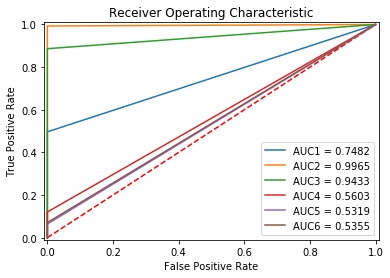

In [54]:
#Métrica
f = plt.figure()
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(List_fpr[0], List_tpr[0], 'tab:blue', label = 'AUC1 = %0.4f' % List_roc_auc[0])
plt.plot(List_fpr[1], List_tpr[1], 'tab:orange', label = 'AUC2 = %0.4f' % List_roc_auc[1])
plt.plot(List_fpr[2], List_tpr[2], 'tab:green', label = 'AUC3 = %0.4f' % List_roc_auc[2])
plt.plot(List_fpr[3], List_tpr[3], 'tab:red', label = 'AUC4 = %0.4f' % List_roc_auc[3])
plt.plot(List_fpr[4], List_tpr[4], 'tab:purple', label = 'AUC5 = %0.4f' % List_roc_auc[4])
plt.plot(List_fpr[5], List_tpr[5], 'tab:brown', label = 'AUC6 = %0.4f' % List_roc_auc[5])
plt.legend(loc = 'lower right')
plt.show()
f.savefig('mx_roc2.pdf', bbox_inches='tight')

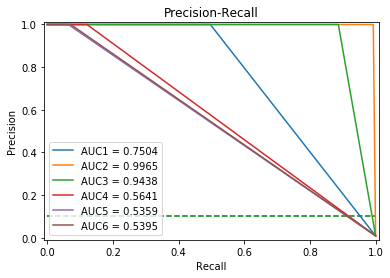

In [55]:
#Métrica
f = plt.figure()
plt.title('Precision-Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot([0, 1], [0.1, 0.1],'g--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(List_recall[0], List_precision[0], 'tab:blue', label = 'AUC1 = %0.4f' % List_pr_auc[0])
plt.plot(List_recall[1], List_precision[1], 'tab:orange', label = 'AUC2 = %0.4f' % List_pr_auc[1])
plt.plot(List_recall[2], List_precision[2], 'tab:green', label = 'AUC3 = %0.4f' % List_pr_auc[2])
plt.plot(List_recall[3], List_precision[3], 'tab:red', label = 'AUC4 = %0.4f' % List_pr_auc[3])
plt.plot(List_recall[4], List_precision[4], 'tab:purple', label = 'AUC5 = %0.4f' % List_pr_auc[4])
plt.plot(List_recall[5], List_precision[5], 'tab:brown', label = 'AUC6 = %0.4f' % List_pr_auc[5])
plt.legend(loc = 'lower left')
plt.show()
f.savefig('mx_pr2.pdf', bbox_inches='tight')

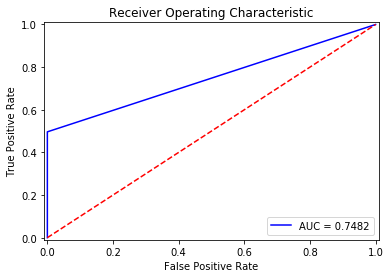

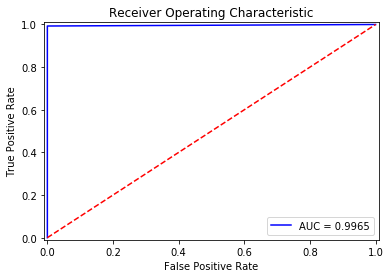

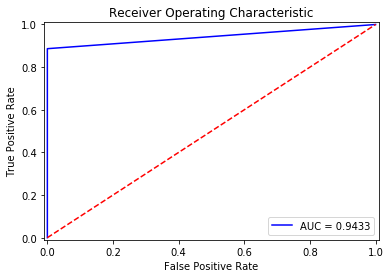

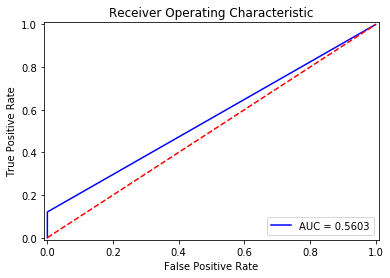

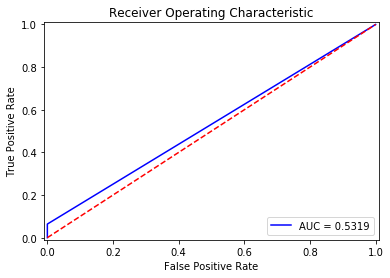

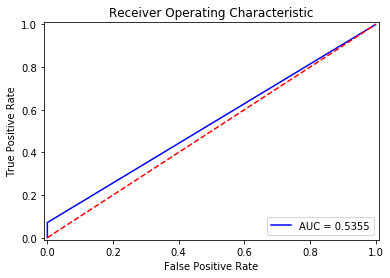

In [56]:
#Métrica
#1. ROC curve
for i in range(6):
    f=plt.figure
    plot_roc_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    plt.show()

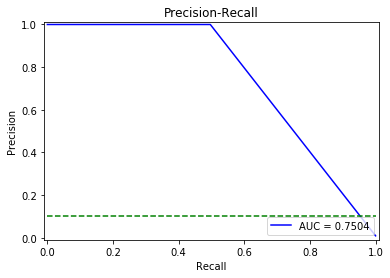

Tarea 1 auc=0.750 ap=0.501


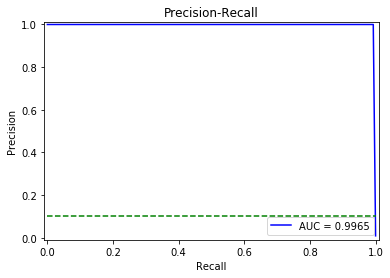

Tarea 2 auc=0.996 ap=0.993


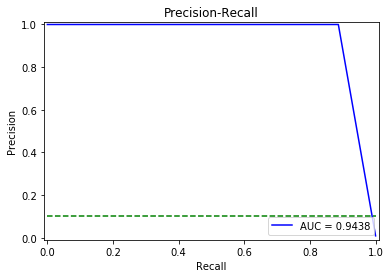

Tarea 3 auc=0.944 ap=0.888


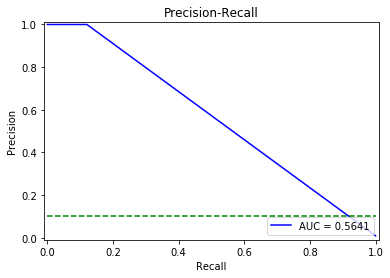

Tarea 4 auc=0.564 ap=0.128


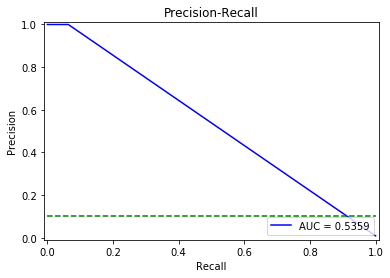

Tarea 5 auc=0.536 ap=0.072


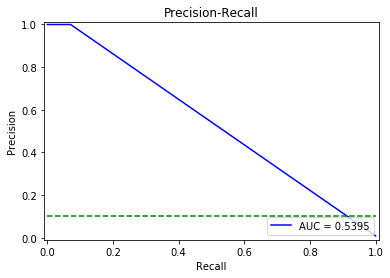

Tarea 6 auc=0.539 ap=0.079


In [57]:
#Métrica
#2. PR curve
for i in range(6):
    f=plt.figure
    precision, recall, thresholds = plot_pr_curve(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    plt.show()
    # calculate precision-recall AUC
    auc1 = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(vars()['Array_' + str(i+1) + "_test"],vars()['Array_' + str(i+1) + "_pred"])
    print('Tarea %d auc=%.3f ap=%.3f' % (i+1,auc1, ap))

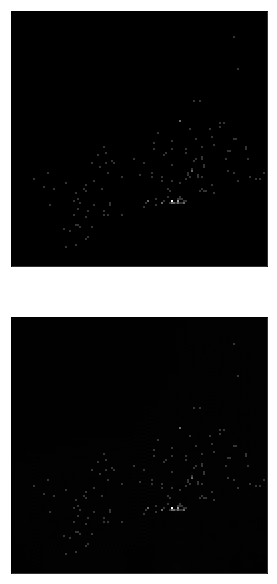

In [58]:
n = 1
plt.figure(figsize=(16, 16))
for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(Y1_test[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_grids_1[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

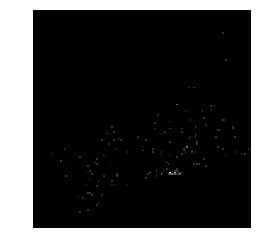

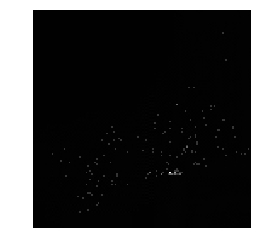

In [59]:
i = 50
f = plt.figure()
plt.imshow(Y1_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t1i12.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_1[i].reshape(128, 128))
plt.axis('off')
f.savefig("t1i22.pdf", bbox_inches='tight')

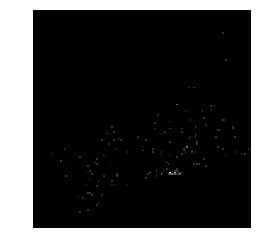

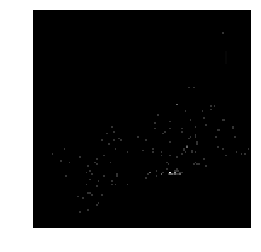

In [60]:
i = 50
f = plt.figure()
plt.imshow(Y2_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t2i12.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_2[i].reshape(128, 128))
plt.axis('off')
f.savefig("t2i22.pdf", bbox_inches='tight')

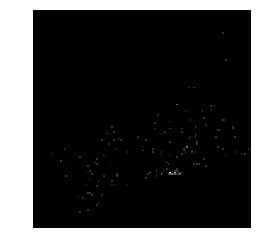

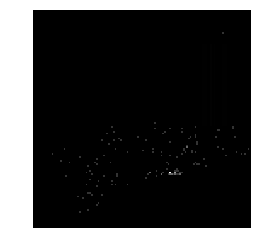

In [61]:
i = 50
f = plt.figure()
plt.imshow(Y3_test_h[i].reshape(128, 128))
plt.axis('off')
f.savefig("t3i12.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_3[i].reshape(128, 128))
plt.axis('off')
f.savefig("t3i22.pdf", bbox_inches='tight')

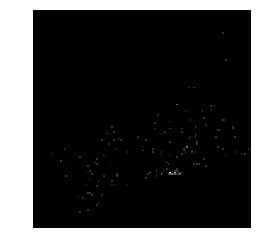

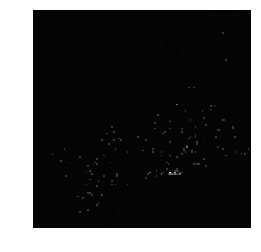

In [62]:
i = 50
f = plt.figure()
plt.imshow(Y4_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t4i12.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_4[i].reshape(128, 128))
plt.axis('off')
f.savefig("t4i22.pdf", bbox_inches='tight')

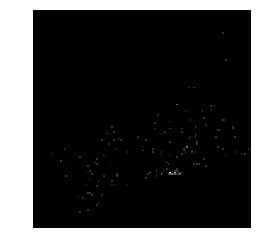

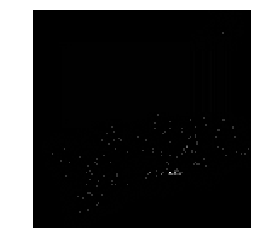

In [63]:
i = 50
f = plt.figure()
plt.imshow(Y5_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t5i12.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_5[i].reshape(128, 128))
plt.axis('off')
f.savefig("t5i22.pdf", bbox_inches='tight')

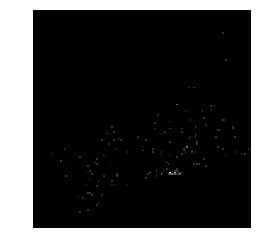

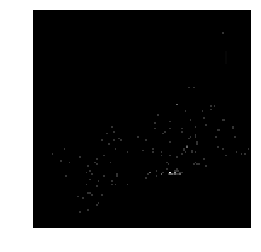

In [64]:
i = 50
f = plt.figure()
plt.imshow(Y6_test[i].reshape(128, 128))
plt.axis('off')
f.savefig("t6i12.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids_6[i].reshape(128, 128))
plt.axis('off')
f.savefig("t6i22.pdf", bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


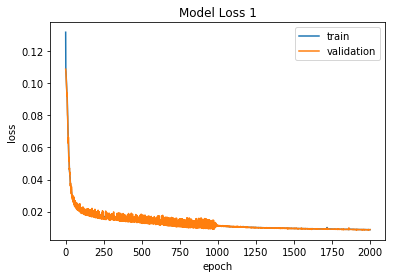

In [65]:
print(history_1.history.keys())
f = plt.figure()
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m1a22.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


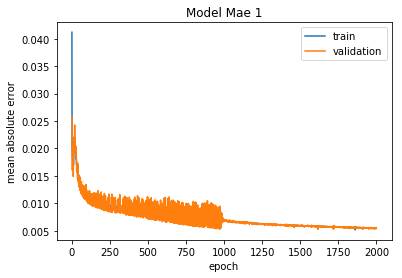

In [66]:
print(history_1.history.keys())
f = plt.figure()
plt.plot(history_1.history['mean_absolute_error'])
plt.plot(history_1.history['val_mean_absolute_error'])
plt.title('Model Mae 1')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m1b2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


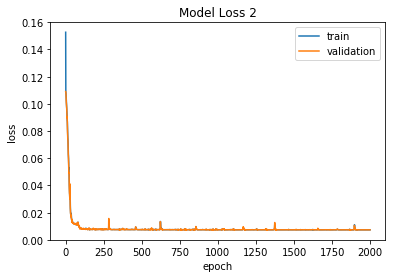

In [67]:
print(history_2.history.keys())
f = plt.figure()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m2a2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


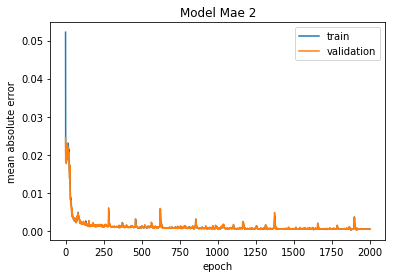

In [68]:
print(history_2.history.keys())
f = plt.figure()
plt.plot(history_2.history['mean_absolute_error'])
plt.plot(history_2.history['val_mean_absolute_error'])
plt.title('Model Mae 2')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m2b2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


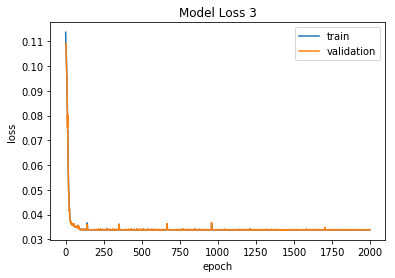

In [69]:
print(history_3_h_6x6.history.keys())
f = plt.figure()
plt.plot(history_3_h_6x6.history['loss'])
plt.plot(history_3_h_6x6.history['val_loss'])
plt.title('Model Loss 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m3a2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


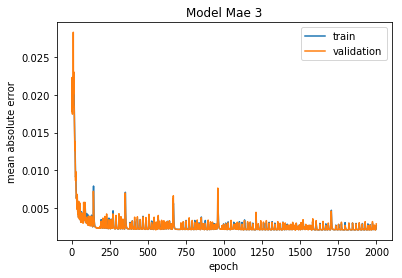

In [70]:
print(history_3_h_6x6.history.keys())
f = plt.figure()
plt.plot(history_3_h_6x6.history['mean_absolute_error'])
plt.plot(history_3_h_6x6.history['val_mean_absolute_error'])
plt.title('Model Mae 3')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m3b2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


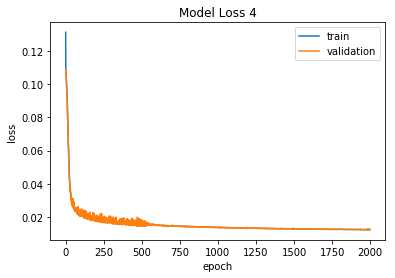

In [71]:
print(history_4.history.keys())
f = plt.figure()
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss 4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m4a2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


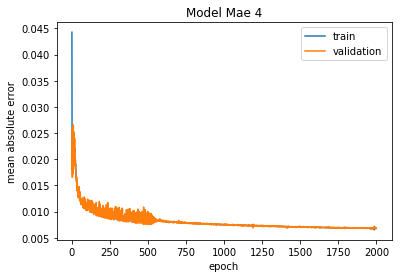

In [72]:
print(history_4.history.keys())
f = plt.figure()
plt.plot(history_4.history['mean_absolute_error'])
plt.plot(history_4.history['val_mean_absolute_error'])
plt.title('Model Mae 4')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m4b2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


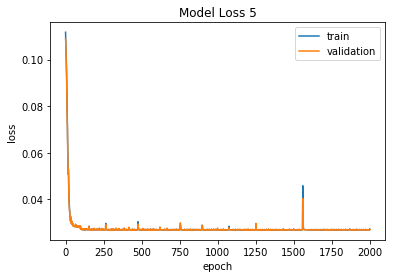

In [73]:
print(history_5.history.keys())
f = plt.figure()
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model Loss 5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m5a2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


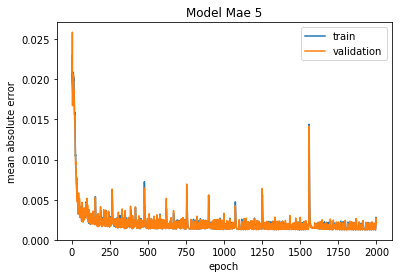

In [74]:
print(history_5.history.keys())
f = plt.figure()
plt.plot(history_5.history['mean_absolute_error'])
plt.plot(history_5.history['val_mean_absolute_error'])
plt.title('Model Mae 5')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m5b2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


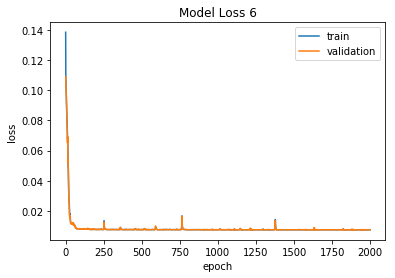

In [75]:
print(history_6.history.keys())
f = plt.figure()
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Model Loss 6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m6a2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


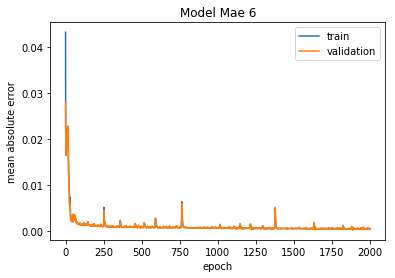

In [76]:
print(history_6.history.keys())
f = plt.figure()
plt.plot(history_6.history['mean_absolute_error'])
plt.plot(history_6.history['val_mean_absolute_error'])
plt.title('Model Mae 6')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m6b2.pdf', bbox_inches='tight')

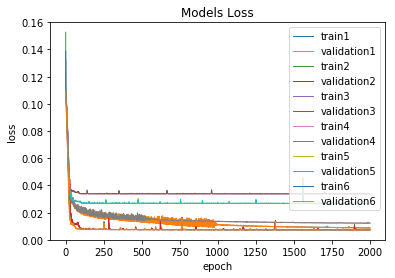

In [77]:
f = plt.figure()
plt.plot(history_1.history['loss'], linewidth=1)
plt.plot(history_1.history['val_loss'], linewidth=1)
plt.plot(history_2.history['loss'], linewidth=1)
plt.plot(history_2.history['val_loss'], linewidth=1)
plt.plot(history_3_h_6x6.history['loss'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_loss'], linewidth=1)
plt.plot(history_4.history['loss'], linewidth=1)
plt.plot(history_4.history['val_loss'], linewidth=1)
plt.plot(history_5.history['loss'], linewidth=1)
plt.plot(history_5.history['val_loss'], linewidth=1)
plt.plot(history_6.history['loss'], linewidth=1)
plt.plot(history_6.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_loss2.pdf', bbox_inches='tight')

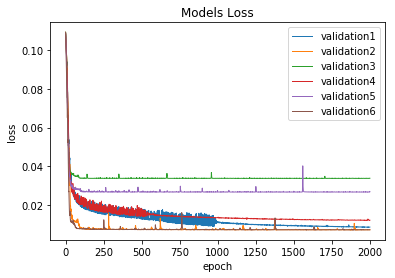

In [78]:
f = plt.figure()
plt.plot(history_1.history['val_loss'], linewidth=1)
plt.plot(history_2.history['val_loss'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_loss'], linewidth=1)
plt.plot(history_4.history['val_loss'], linewidth=1)
plt.plot(history_5.history['val_loss'], linewidth=1)
plt.plot(history_6.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_loss2.pdf', bbox_inches='tight')

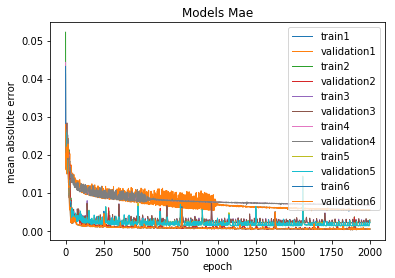

In [79]:
f = plt.figure()
plt.plot(history_1.history['mean_absolute_error'], linewidth=1)
plt.plot(history_1.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_2.history['mean_absolute_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['mean_absolute_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_4.history['mean_absolute_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_5.history['mean_absolute_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_6.history['mean_absolute_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_error'], linewidth=1)
plt.title('Models Mae')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_mae2.pdf', bbox_inches='tight')

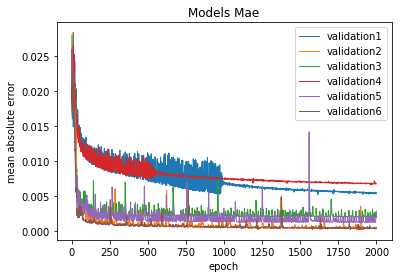

In [80]:
f = plt.figure()
plt.plot(history_1.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_error'], linewidth=1)
plt.title('Models Mae')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_mae2.pdf', bbox_inches='tight')

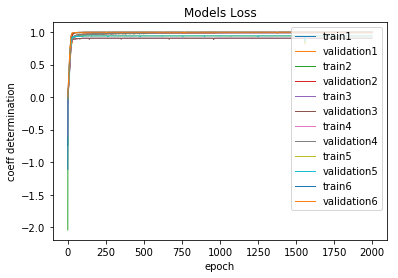

In [81]:
f = plt.figure()
plt.plot(history_1.history['coeff_determination'], linewidth=1)
plt.plot(history_1.history['val_coeff_determination'], linewidth=1)
plt.plot(history_2.history['coeff_determination'], linewidth=1)
plt.plot(history_2.history['val_coeff_determination'], linewidth=1)
plt.plot(history_3_h_6x6.history['coeff_determination'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_coeff_determination'], linewidth=1)
plt.plot(history_4.history['coeff_determination'], linewidth=1)
plt.plot(history_4.history['val_coeff_determination'], linewidth=1)
plt.plot(history_5.history['coeff_determination'], linewidth=1)
plt.plot(history_5.history['val_coeff_determination'], linewidth=1)
plt.plot(history_6.history['coeff_determination'], linewidth=1)
plt.plot(history_6.history['val_coeff_determination'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('coeff determination')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_r22.pdf', bbox_inches='tight')

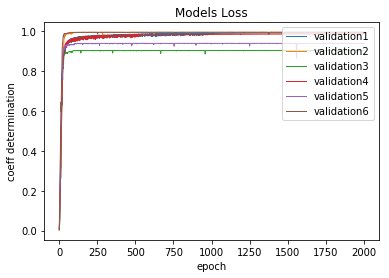

In [82]:
f = plt.figure()
plt.plot(history_1.history['val_coeff_determination'], linewidth=1)
plt.plot(history_2.history['val_coeff_determination'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_coeff_determination'], linewidth=1)
plt.plot(history_4.history['val_coeff_determination'], linewidth=1)
plt.plot(history_5.history['val_coeff_determination'], linewidth=1)
plt.plot(history_6.history['val_coeff_determination'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('coeff determination')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_r22.pdf', bbox_inches='tight')

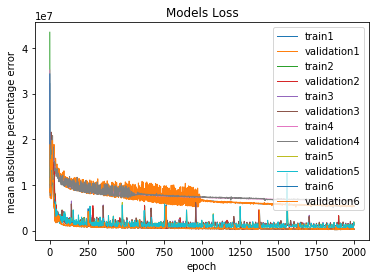

In [83]:
f = plt.figure()
plt.plot(history_1.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_1.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_2.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_4.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_5.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_6.history['mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('mean absolute percentage error')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4','train5', 'validation5','train6', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_contodo_MAPE2.pdf', bbox_inches='tight')

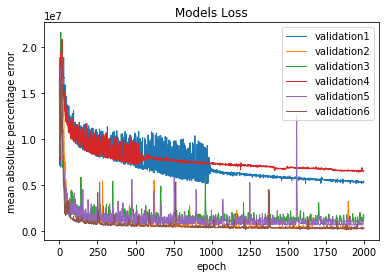

In [84]:
f = plt.figure()
plt.plot(history_1.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_2.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_3_h_6x6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_4.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_5.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.plot(history_6.history['val_mean_absolute_percentage_error'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('mean absolute percentage error')
plt.xlabel('epoch')
plt.legend(['validation1', 'validation2', 'validation3', 'validation4', 'validation5', 'validation6'], loc='upper right')
plt.show()
f.savefig('mx_val_MAPE2.pdf', bbox_inches='tight')

<h5><center>INICIO DE PRUEBAS</center></h5>

In [11]:
#Métrica
import pickle
pickle_in = open("decoded_grids_1.pickle","rb")
decoded_grids_1 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_2.pickle","rb")
decoded_grids_2 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_3.pickle","rb")
decoded_grids_3 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_4.pickle","rb")
decoded_grids_4 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_5.pickle","rb")
decoded_grids_5 = pickle.load(pickle_in)
pickle_in = open("decoded_grids_6.pickle","rb")
decoded_grids_6 = pickle.load(pickle_in)

In [85]:
#PROBANDO guardar variables con pickle
import pickle
pickle_out = open("history_12.pickle","wb")
pickle.dump(history_1,pickle_out)
pickle_out.close()
pickle_out = open("history_22.pickle","wb")
pickle.dump(history_2,pickle_out)
pickle_out.close()
pickle_out = open("history_3_h_6x62.pickle","wb")
pickle.dump(history_3_h_6x6,pickle_out)
pickle_out.close()
pickle_out = open("history_42.pickle","wb")
pickle.dump(history_4,pickle_out)
pickle_out.close()
pickle_out = open("history_52.pickle","wb")
pickle.dump(history_5,pickle_out)
pickle_out.close()
pickle_out = open("history_62.pickle","wb")
pickle.dump(history_6,pickle_out)
pickle_out.close()

In [86]:
#PROBANDO guardar los modelos
autoencoder1.save("autoencoder12.h5")
autoencoder2.save("autoencoder22.h5")
autoencoder3_h_6x6.save("autoencoder3_h_6x62.h5")
autoencoder4.save("autoencoder42.h5")
autoencoder5.save("autoencoder52.h5")
autoencoder6.save("autoencoder62.h5")

In [54]:
#PROBANDO código para guardar imagen del modelo con capas
from keras.utils.vis_utils import plot_model
plot_model(autoencoder1, to_file='autoencoder1.pdf',show_shapes=True, show_layer_names=True)

In [2]:
#PROBANDO código para cargar un modelo guardado en h5
from keras import backend as K
def coeff_determination(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
from keras.models import load_model
model = load_model('Modelos/3x6/AE3days3x6_3000epochs.h5',custom_objects={'root_mean_squared_error': root_mean_squared_error, 'coeff_determination':coeff_determination})

Instructions for updating:
Colocations handled automatically by placer.


<h5><center>FIN DE PRUEBAS</center></h5>